* **amount_tsh** - Total static head (amount water available to waterpoint)
* **date_recorded** - The date the row was entered
* **funder** - Who funded the well
* **gps_height** - Altitude of the well
* **installer** - Organization that installed the well
* **longitude** - GPS coordinate
* **latitude** - GPS coordinate
* **wpt_name** - Name of the waterpoint if there is one
* **num_private** -
* **basin** - Geographic water basin
* **subvillage** - Geographic location
* **region** - Geographic location
* **region_code** - Geographic location (coded)
* **district_code** - Geographic location (coded)
* **lga** - Geographic location
* **ward** - Geographic location
* **population** - Population around the well
* **public_meeting** - True/False
* **recorded_by** - Group entering this row of data
* **scheme_management** - Who operates the waterpoint
* **scheme_name** - Who operates the waterpoint
* **permit** - If the waterpoint is permitted
* **construction_year** - Year the waterpoint was constructed
* **extraction_type** - The kind of extraction the waterpoint uses
* **extraction_type_group** - The kind of extraction the waterpoint uses
* **extraction_type_class** - The kind of extraction the waterpoint uses
* **management** - How the waterpoint is managed
* **management_group** - How the waterpoint is managed
* **payment** - What the water costs
* **payment_type** - What the water costs
* **water_quality** - The quality of the water
* **quality_group** - The quality of the water
* **quantity** - The quantity of water
* **quantity_group** - The quantity of water
* **source** - The source of the water
* **source_type** - The source of the water
* **source_class** - The source of the water
* **waterpoint_type** - The kind of waterpoint
* **waterpoint_type_group** - The kind of waterpoint

In [3082]:
#import packages
import numpy as np     
import pandas as pd     

import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [3083]:
#load provided dataset
training_set_labels = pd.read_csv('./Data/Training_Set_Labels.csv')
training_set_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [3084]:
#check shape
training_set_labels.shape

(59400, 2)

In [3085]:
#get summary
training_set_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [3086]:
#get value count for each class
training_set_labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

**training_set_labels** dataset has no missing data. This is our target variable. There are three classes:
* ‘functioning’
* ‘non-functioning’ 
* ‘functioning needs repair’

In order for the classification model to correctly predict the target, we need to change the labels from strings to integers.

In [3087]:
#load provided dataset
training_set_values = pd.read_csv('./Data/Training_Set_Values.csv')
training_set_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3088]:
#check the shape
training_set_values.shape

(59400, 40)

The dataset includes 40 independent features X.

In [3089]:
#get summary
training_set_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [3090]:
#check for missing values
training_set_values.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [3091]:
#merge
df = pd.merge(training_set_labels, training_set_values, on = 'id')
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3092]:
#check shape
df.shape

(59400, 41)

The dataset has 59,400 entries and 40 columns/features (excluding 'id').
We will examine each column one by one.

# Cleaning and Initial EDA

# Target (y)

## **'status_group'**

In [3093]:
#get value count
df['status_group'].value_counts(normalize = True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

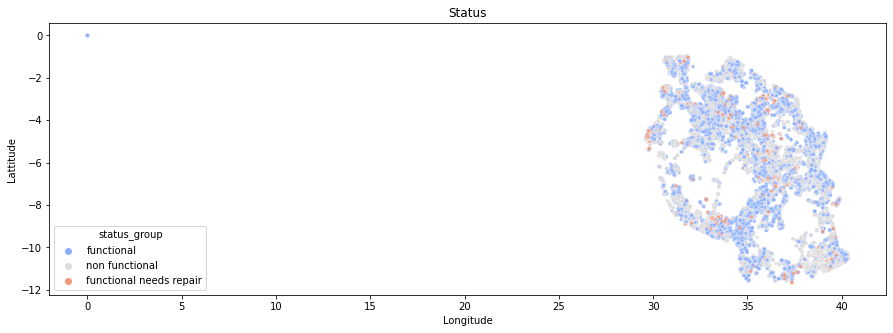

<Figure size 432x288 with 0 Axes>

In [3094]:
#plot 
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'status_group', data = df, alpha = 0.75, s = 15, palette = 'coolwarm')
plt.title('Status')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/status_group_scatterplot')

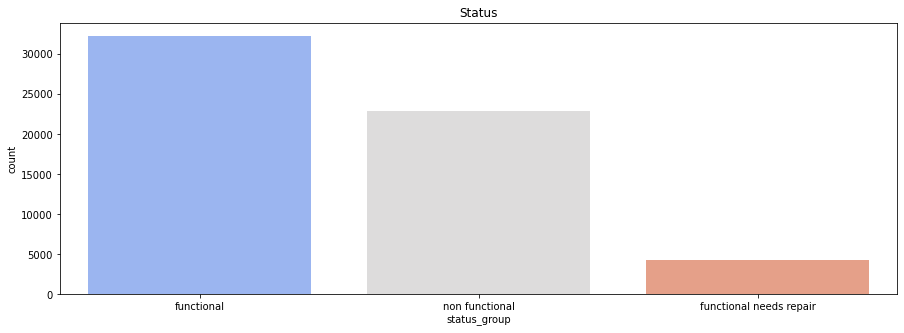

In [3095]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', data = df, palette = 'coolwarm')
plt.title('Status')
plt.savefig('./Data/status_group_countplot')

There is a class imbalance for the target classes:

* 54% are functional
* 38% non-functional
* 7.26% functional, needs repair

We will have to use SMOTE later on to fix this problem.

# Explore Each Feature (X)

In [3096]:
#get column names
df.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

## **'amount_tsh'**

The total static head. It means the amount of water available to a waterpoint.

In [3097]:
#get value count
df['amount_tsh'].value_counts(normalize = True)

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
8500.0      0.000017
6300.0      0.000017
220.0       0.000017
138000.0    0.000017
12.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

<AxesSubplot:>

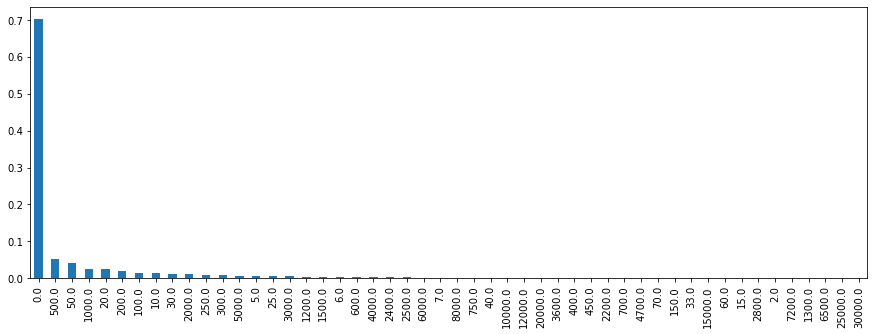

In [3098]:
#get top 50 
df['amount_tsh'].value_counts(normalize = True).head(50).plot.bar(figsize = (15, 5))

The majority of data is 0.

In [3099]:
#get how many entries are 0
len(df[df['amount_tsh'] == 0]) / len(df)

0.700993265993266

70% of 'amount_tsh' is 0

In [3100]:
#describe excluding missing data
df['amount_tsh'][df['amount_tsh'] != 0].describe()

count     17761.000000
mean       1062.351942
std        5409.344940
min           0.200000
25%          50.000000
50%         250.000000
75%        1000.000000
max      350000.000000
Name: amount_tsh, dtype: float64

<AxesSubplot:>

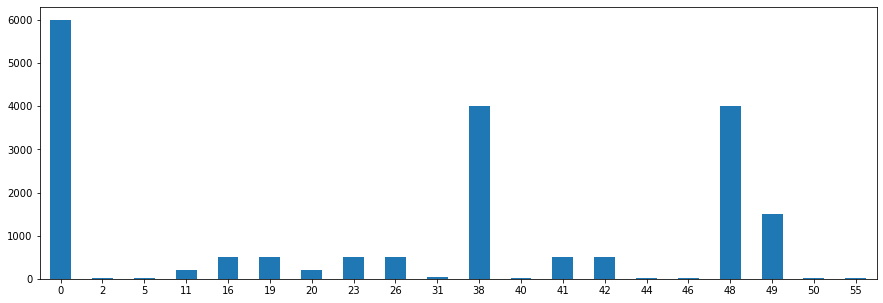

In [3101]:
#plot excluding missing data
df['amount_tsh'][df['amount_tsh'] != 0].head(20).plot.bar(figsize = (15, 5), rot = 0)

In [3102]:
#more exploration
pd.DataFrame(df.groupby('status_group')['amount_tsh'].value_counts(normalize = True))

amount_tsh
status_group   amount_tsh            
functional     0.0           0.610868
               500.0         0.069004
               50.0          0.050653
               1000.0        0.034750
               20.0          0.030069
...                               ...
non functional 13000.0       0.000044
               14000.0       0.000044
               15000.0       0.000044
               60000.0       0.000044
               117000.0      0.000044

[187 rows x 1 columns]

In [3103]:
#more exploration
pd.DataFrame(df.groupby('amount_tsh')['status_group'].value_counts(normalize = True))

status_group
amount_tsh status_group                         
0.00       functional                   0.473258
           non functional               0.453541
           functional needs repair      0.073201
0.20       non functional               1.000000
0.25       functional                   1.000000
...                                          ...
138000.00  functional                   1.000000
170000.00  functional                   1.000000
200000.00  functional                   1.000000
250000.00  functional                   1.000000
350000.00  functional                   1.000000

[187 rows x 1 columns]

## **'date_recorded'** 

The date the row was entered

In [3104]:
#get value count
df['date_recorded'].value_counts(normalize = True)

2011-03-15    0.009630
2011-03-17    0.009394
2013-02-03    0.009192
2011-03-14    0.008754
2011-03-16    0.008636
                ...   
2004-01-07    0.000017
2011-09-23    0.000017
2011-08-31    0.000017
2011-09-09    0.000017
2002-10-14    0.000017
Name: date_recorded, Length: 356, dtype: float64

In [3105]:
from datetime import datetime

#convert 'date_recorded'to a datetime object
df['date_recorded'] = pd.to_datetime(df['date_recorded'])

#add 'year_recorded' column
df['year_recorded'] = pd.DatetimeIndex(df['date_recorded']).year

#review
df.head(2)

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013


In [3106]:
#check summary statistics
df['year_recorded'].describe()

count    59400.000000
mean      2011.921667
std          0.958758
min       2002.000000
25%       2011.000000
50%       2012.000000
75%       2013.000000
max       2013.000000
Name: year_recorded, dtype: float64

<AxesSubplot:>

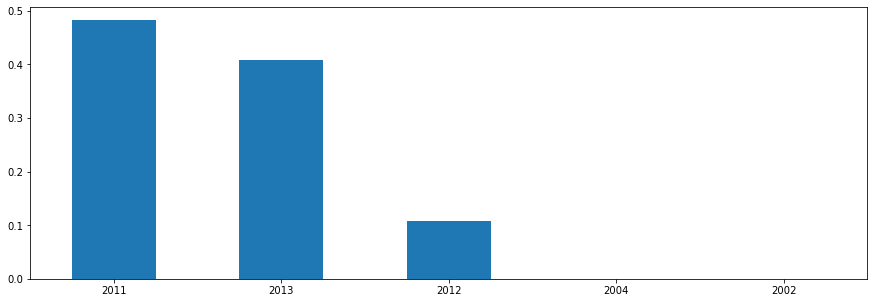

In [3107]:
#visualize
df['year_recorded'].value_counts(normalize = True).plot.bar(figsize = (15, 5), rot = 0)

In [3108]:
#more exploration
pd.DataFrame(df.groupby('status_group')['year_recorded'].value_counts(normalize = True))

year_recorded
status_group            year_recorded               
functional              2011                0.502805
                        2013                0.399950
                        2012                0.096903
                        2004                0.000310
                        2002                0.000031
functional needs repair 2013                0.496178
                        2011                0.419736
                        2012                0.083855
                        2004                0.000232
non functional          2011                0.466264
                        2013                0.404267
                        2012                0.128637
                        2004                0.000832

In [3109]:
#more exploration
pd.DataFrame(df.groupby('year_recorded')['status_group'].value_counts(normalize = True))

status_group
year_recorded status_group                         
2002          functional                   1.000000
2004          non functional               0.633333
              functional                   0.333333
              functional needs repair      0.033333
2011          functional                   0.565669
              non functional               0.371138
              functional needs repair      0.063193
2012          functional                   0.486613
              non functional               0.457036
              functional needs repair      0.056351
2013          functional                   0.531581
              non functional               0.380166
              functional needs repair      0.088253

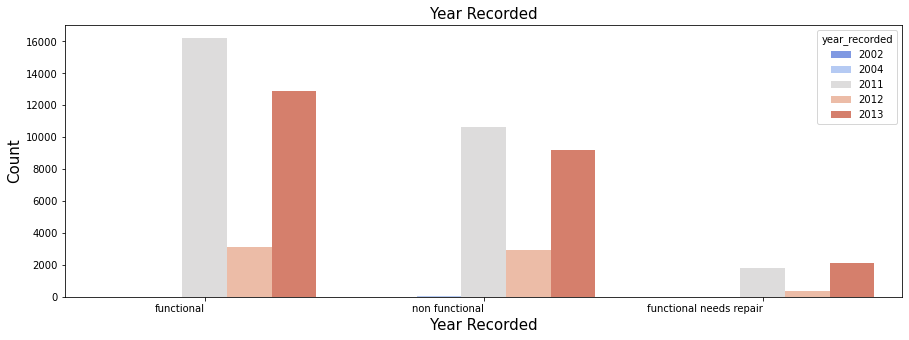

In [3110]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'year_recorded', data = df, palette = 'coolwarm')
plt.title('Year Recorded', fontsize = 15)
plt.xlabel('Year Recorded', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.savefig('./Data/year_recorded_countplot')

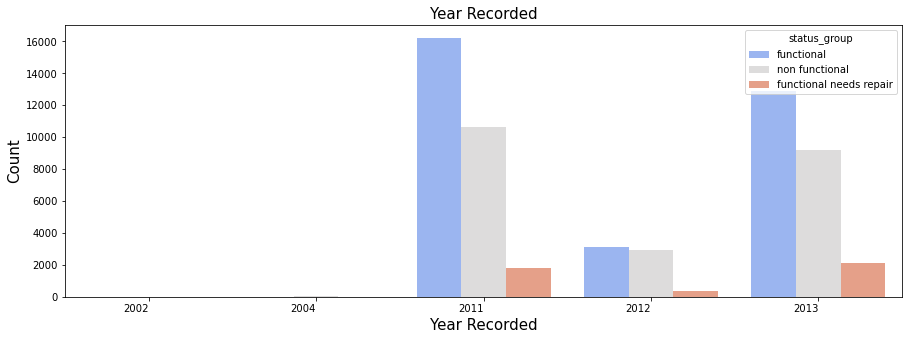

In [3111]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'year_recorded', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Year Recorded', fontsize = 15)
plt.xlabel('Year Recorded', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.savefig('./Data/year_recorded_countplot')

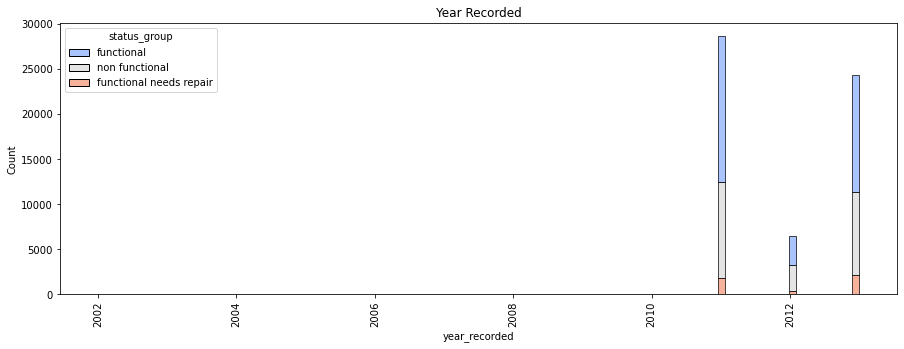

In [3112]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'year_recorded', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Year Recorded')
plt.savefig('./Data/year_recorded_histplot')

In [3113]:
#drop 'date_recoreded' because we don't need it anymore
df.drop(columns = 'date_recorded', axis = 1, inplace = True)

## **'funder'**
Who funded the well

In [3114]:
#get value count
print(df['funder'].value_counts(normalize = True))

Government Of Tanzania            0.162898
Danida                            0.055841
Hesawa                            0.039487
Rwssp                             0.024639
World Bank                        0.024191
                                    ...   
Saudia                            0.000018
Taasaf                            0.000018
Siter Fransis                     0.000018
Shelisheli Commission             0.000018
African Reflections Foundation    0.000018
Name: funder, Length: 1897, dtype: float64


In [3115]:
#'funder' has missing values
print('Missing values before:', df['funder'].isna().sum())

#fill missing values with 'unknown'
df['funder'].fillna('unknown', inplace = True)
print('Missing values after:', df['funder'].isna().sum())

Missing values before: 3635
Missing values after: 0


<AxesSubplot:>

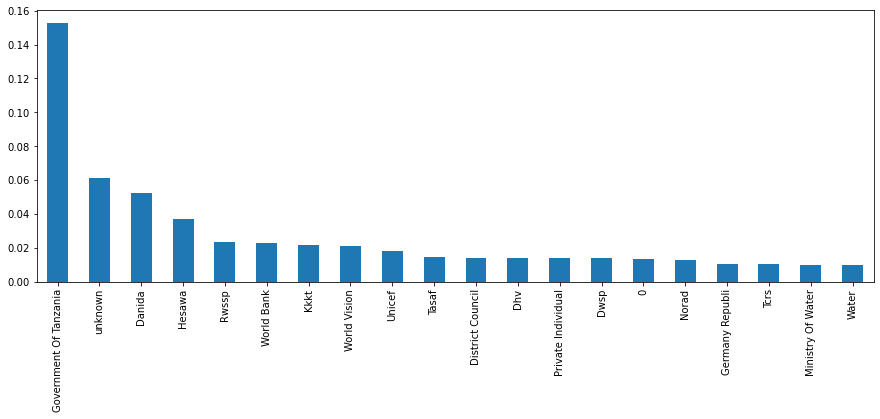

In [3116]:
#get 20 biggest funders
df['funder'].value_counts(normalize = True).head(20).plot.bar(figsize = (15, 5))

Majority of wells are funded by the Government of Tanzania. 

In [3117]:
#more exploration
pd.DataFrame(df.groupby('status_group')['funder'].value_counts(normalize = True))

funder
status_group   funder                          
functional     Government Of Tanzania  0.115317
               unknown                 0.061409
               Danida                  0.053101
               Hesawa                  0.029015
               Rwssp                   0.024954
...                                         ...
non functional Yaole                   0.000044
               Yasini                  0.000044
               Yasini Selemani         0.000044
               Zao                     0.000044
               Zao Water Spring X      0.000044

[2810 rows x 1 columns]

In [3118]:
#more exploration
pd.DataFrame(df.groupby('funder')['status_group'].value_counts(normalize = True))

status_group
funder              status_group                         
0                   functional                   0.572716
                    non functional               0.423423
                    functional needs repair      0.003861
A/co Germany        functional                   0.466667
                    non functional               0.466667
...                                                   ...
Zinduka             functional                   1.000000
Zingibali Secondary functional                   1.000000
unknown             functional                   0.544979
                    non functional               0.334801
                    functional needs repair      0.120220

[2810 rows x 1 columns]

In [3119]:
#too many unique values, we will only select for the 20 most common ones and categorize the rest as 'Other'
def funder_grouped(var):
    if var in df['funder'].value_counts(normalize = True).head(20).index:
        return var
    else:
        return 'Other'

In [3120]:
#apply function to column
df['funder_group'] = df['funder'].map(funder_grouped)

In [3121]:
#check how many unique values
df['funder_group'].nunique()

21

In [3122]:
df[['funder_group']].value_counts(normalize = True)

funder_group          
Other                     0.453519
Government Of Tanzania    0.152929
unknown                   0.061195
Danida                    0.052424
Hesawa                    0.037071
Rwssp                     0.023131
World Bank                0.022710
Kkkt                      0.021667
World Vision              0.020976
Unicef                    0.017795
Tasaf                     0.014764
District Council          0.014192
Dhv                       0.013956
Private Individual        0.013906
Dwsp                      0.013653
0                         0.013081
Norad                     0.012879
Germany Republi           0.010269
Tcrs                      0.010135
Ministry Of Water         0.009933
Water                     0.009815
dtype: float64

In [3123]:
#more exploration
pd.DataFrame(df.groupby('status_group')['funder_group'].value_counts(normalize = True))

funder_group
status_group   funder_group                        
functional     Other                       0.500914
               Government Of Tanzania      0.115317
               unknown                     0.061409
               Danida                      0.053101
               Hesawa                      0.029015
...                                             ...
non functional Dhv                         0.013188
               Water                       0.010822
               Dwsp                        0.009420
               Private Individual          0.005170
               Germany Republi             0.003111

[63 rows x 1 columns]

In [3124]:
#more exploration
pd.DataFrame(df.groupby('funder_group')['status_group'].value_counts(normalize = True))

status_group
funder_group status_group                         
0            functional                   0.572716
             non functional               0.423423
             functional needs repair      0.003861
Danida       functional                   0.550096
             non functional               0.398844
...                                            ...
World Vision non functional               0.298555
             functional needs repair      0.105136
unknown      functional                   0.544979
             non functional               0.334801
             functional needs repair      0.120220

[63 rows x 1 columns]

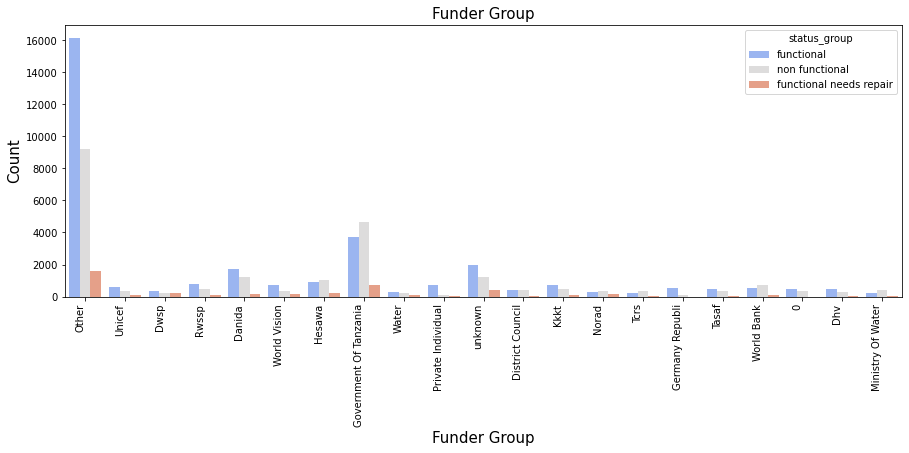

In [3125]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'funder_group', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Funder Group', fontsize = 15)
plt.xlabel('Funder Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.savefig('./Data/funder_group_countplot')

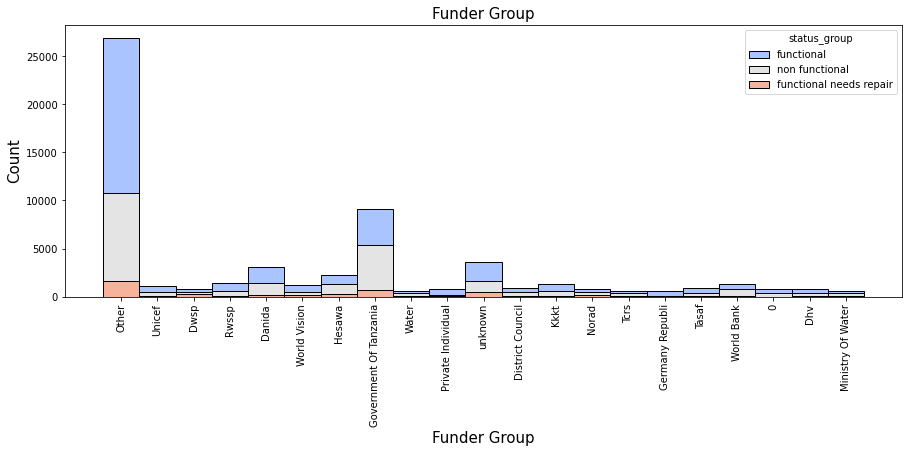

In [3126]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'funder_group', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Funder Group', fontsize = 15)
plt.xlabel('Funder Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/funder_group_histplot')

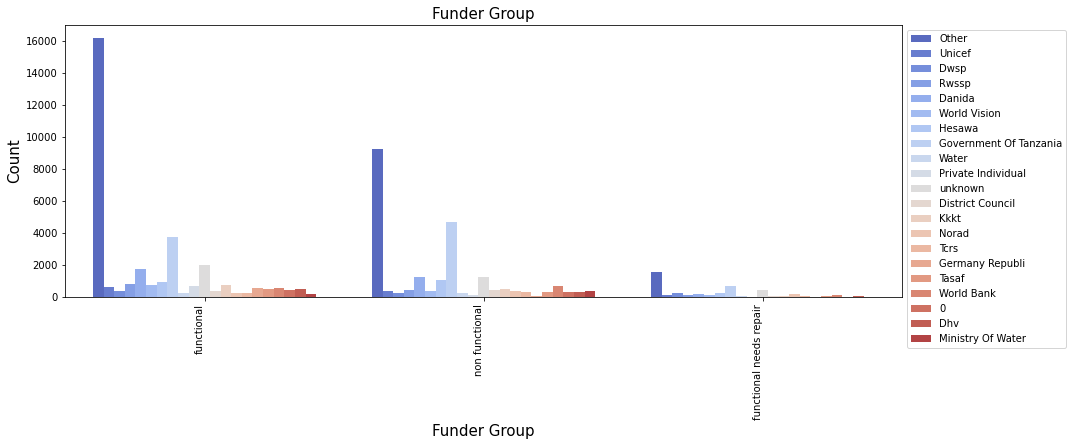

In [3127]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'funder_group', data = df, palette = 'coolwarm')
plt.title('Funder Group', fontsize = 15)
plt.xlabel('Funder Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/funder_group_countplot')

## **'gps_height'**
Altitude of the well

In [3128]:
#get value counts
df['gps_height'].value_counts(normalize = True)

 0       0.344074
-15      0.001010
-16      0.000926
-13      0.000926
-20      0.000875
           ...   
 2285    0.000017
 2424    0.000017
 2552    0.000017
 2413    0.000017
 2385    0.000017
Name: gps_height, Length: 2428, dtype: float64

<AxesSubplot:>

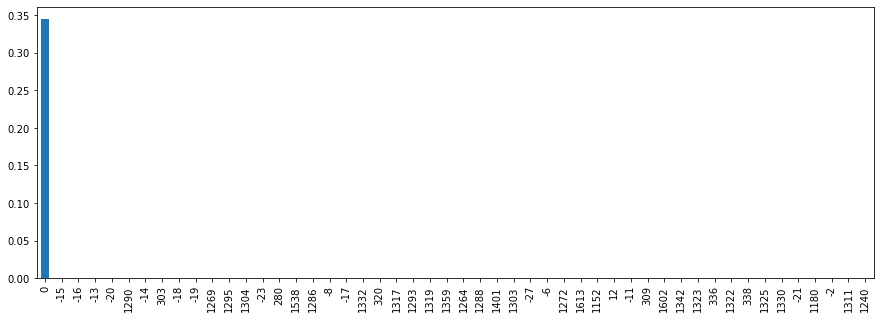

In [3129]:
#get 50 biggest funders
df['gps_height'].value_counts(normalize = True).head(50).plot.bar(figsize = (15, 5))

In [3130]:
#get how many entries are 0
len(df[df['gps_height'] == 0]) / len(df)

0.3440740740740741

In [3131]:
#more exploration
pd.DataFrame(df.groupby('status_group')['gps_height'].value_counts(normalize = True))

gps_height
status_group   gps_height            
functional      0            0.324530
               -20           0.001054
                1384         0.000992
               -15           0.000961
                1401         0.000961
...                               ...
non functional  2304         0.000044
                2305         0.000044
                2334         0.000044
                2408         0.000044
                2627         0.000044

[5815 rows x 1 columns]

In [3132]:
#more exploration
pd.DataFrame(df.groupby('gps_height')['status_group'].value_counts(normalize = True))

,,status_group
gps_height,status_group,
-90,functional,1.0
-63,functional,1.0
-59,non functional,1.0
-57,functional,1.0
-55,non functional,1.0
...,...,...
2623,functional,1.0
2626,functional,1.0
2627,non functional,1.0


## **'installer'**
Organization that installed the well

In [3133]:
#get value count
df['installer'].value_counts(normalize = True)

DWE                     0.312171
Government              0.032738
RWE                     0.021634
Commu                   0.019015
DANIDA                  0.018836
                          ...   
DWE & LWI               0.000018
Tanzania government     0.000018
Goldwill  foundation    0.000018
Afroz Ismail            0.000018
HESAWS                  0.000018
Name: installer, Length: 2145, dtype: float64

In [3134]:
#'installer' has missing values
print('Missing values before:', df['installer'].isna().sum())

#fill missing values with 'unknown'
df['installer'].fillna('unknown', inplace = True)
print('Missing values after:', df['installer'].isna().sum())

Missing values before: 3655
Missing values after: 0


<AxesSubplot:>

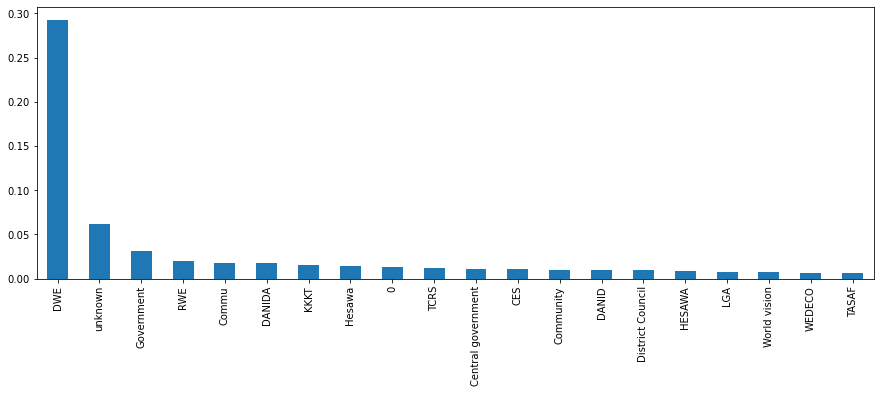

In [3135]:
#get top 20 
df['installer'].value_counts(normalize = True).head(20).plot.bar(figsize = (15, 5))

In [3136]:
#more exploration
pd.DataFrame(df.groupby('status_group')['installer'].value_counts(normalize = True))

installer
status_group   installer                            
functional     DWE                          0.292415
               unknown                      0.061998
               Commu                        0.022443
               DANIDA                       0.016802
               CES                          0.016678
...                                              ...
non functional sengerema Water Department   0.000044
               sengerema water Department   0.000044
               ter                          0.000044
               upper Ruvu                   0.000044
               world banks                  0.000044

[3089 rows x 1 columns]

In [3137]:
#more exploration
pd.DataFrame(df.groupby('installer')['status_group'].value_counts(normalize = True))

status_group
installer      status_group                         
-              functional                   0.666667
               non functional               0.333333
0              functional                   0.572716
               non functional               0.423423
               functional needs repair      0.003861
...                                              ...
wizara ya maji functional                   1.000000
world          non functional               0.750000
               functional needs repair      0.250000
world banks    non functional               1.000000
world vision   functional                   1.000000

[3089 rows x 1 columns]

In [3138]:
#too many unique values, we will only select for the 20 most common ones and categorize the rest as 'Other'
def installer_grouped(var):
    if var in df['installer'].value_counts(normalize = True).head(20).index:
        return var
    else:
        return 'Other'
    
#apply function to column
df['installer_group'] = df['installer'].map(installer_grouped)

In [3139]:
#check how many unique values
df['installer_group'].nunique()

21

In [3140]:
df[['installer_group']].value_counts(normalize = True)

installer_group   
Other                 0.419916
DWE                   0.292963
unknown               0.061549
Government            0.030724
RWE                   0.020303
Commu                 0.017845
DANIDA                0.017677
KKKT                  0.015118
Hesawa                0.014141
0                     0.013081
TCRS                  0.011902
Central government    0.010471
CES                   0.010269
Community             0.009310
DANID                 0.009293
District Council      0.009276
HESAWA                0.009074
World vision          0.006869
LGA                   0.006869
WEDECO                0.006684
TASAF                 0.006667
dtype: float64

In [3141]:
#more exploration
pd.DataFrame(df.groupby('status_group')['installer_group'].value_counts(normalize = True))

installer_group
status_group   installer_group                 
functional     Other                   0.437614
               DWE                     0.292415
               unknown                 0.061998
               Commu                   0.022443
               DANIDA                  0.016802
...                                         ...
non functional Community               0.005564
               DANID                   0.004907
               WEDECO                  0.004819
               World vision            0.003812
               CES                     0.003111

[63 rows x 1 columns]

In [3142]:
#more exploration
pd.DataFrame(df.groupby('installer_group')['status_group'].value_counts(normalize = True))

status_group
installer_group status_group                         
0               functional                   0.572716
                non functional               0.423423
                functional needs repair      0.003861
CES             functional                   0.881967
                non functional               0.116393
...                                               ...
World vision    non functional               0.213235
                functional needs repair      0.132353
unknown         functional                   0.547046
                non functional               0.332604
                functional needs repair      0.120350

[63 rows x 1 columns]

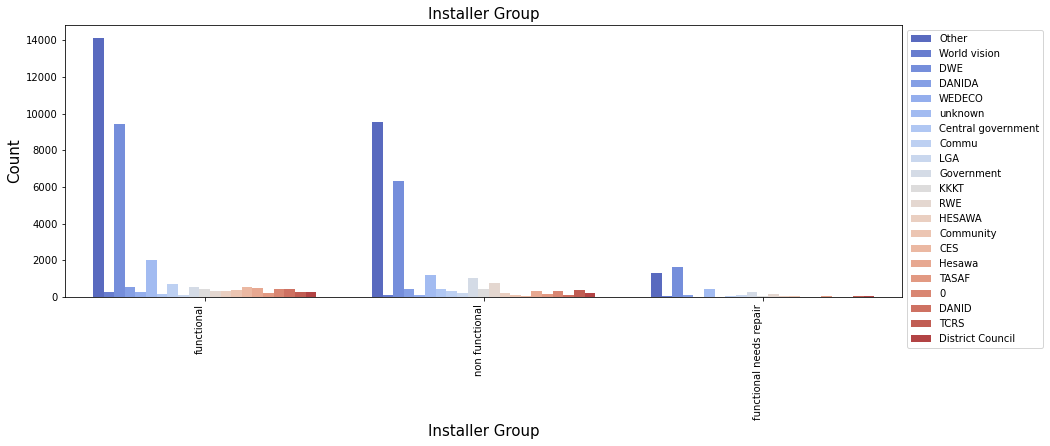

In [3143]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'installer_group', data = df, palette = 'coolwarm')
plt.title('Installer Group', fontsize = 15)
plt.xlabel('Installer Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/installer_group_countplot')

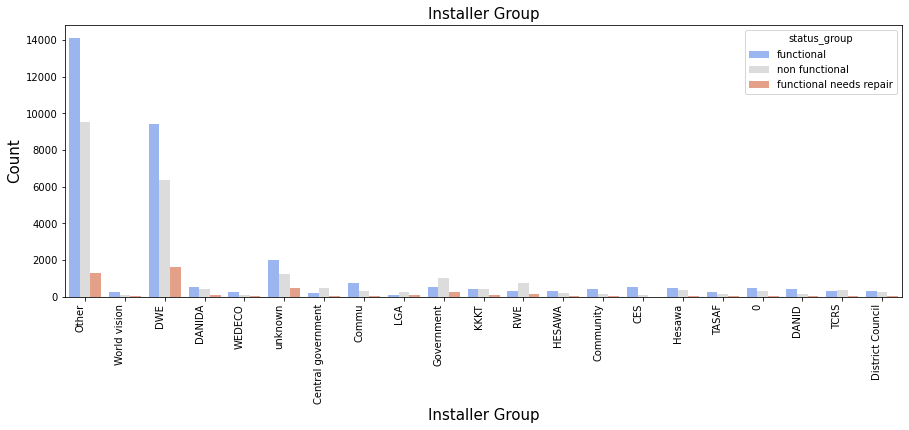

In [3144]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'installer_group', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Installer Group', fontsize = 15)
plt.xlabel('Installer Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.savefig('./Data/installer_group_countplot')

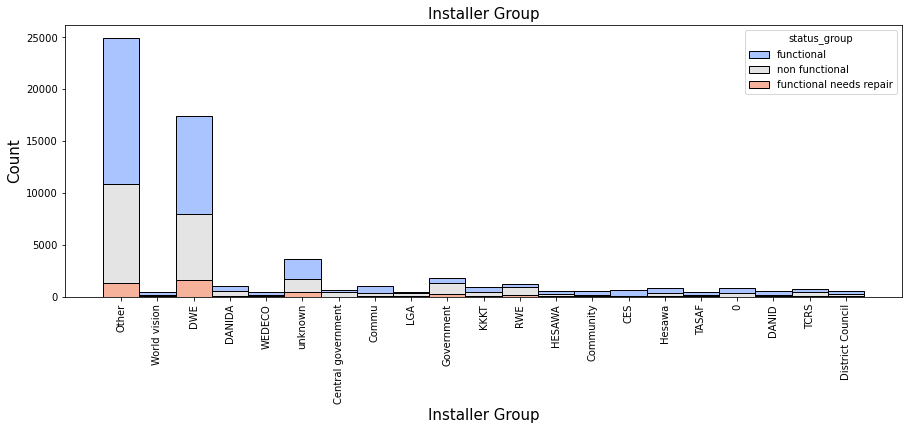

In [3145]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'installer_group', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Installer Group', fontsize = 15)
plt.xlabel('Installer Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/installer_group_histplot')

## **'wpt_name'**
Name of the waterpoint if there is one

In [3146]:
#get value count
df['wpt_name'].value_counts(normalize = True)

none                  0.059983
Shuleni               0.029428
Zahanati              0.013973
Msikitini             0.009007
Kanisani              0.005438
                        ...   
Ccm Office Kifumbe    0.000017
Modui 2               0.000017
Kwa Maela             0.000017
Kwaihano              0.000017
Kumguruka B           0.000017
Name: wpt_name, Length: 37400, dtype: float64

<AxesSubplot:>

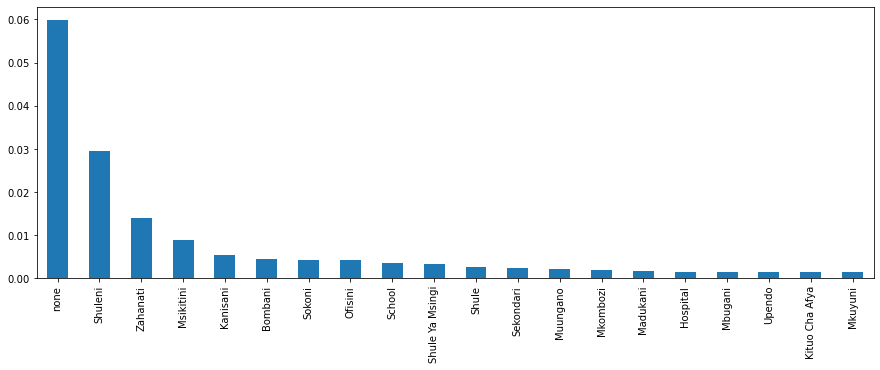

In [3147]:
#get top 20 
df['wpt_name'].value_counts(normalize = True).head(20).plot.bar(figsize = (15, 5))

In [3148]:
#get how many entries are 'none'
len(df[df['wpt_name'] == 'none']) / len(df)

0.059983164983164985

In [3149]:
#more exploration
pd.DataFrame(df.groupby('status_group')['wpt_name'].value_counts(normalize = True))

wpt_name
status_group   wpt_name                   
functional     none               0.081528
               Shuleni            0.026628
               Zahanati           0.013330
               Msikitini          0.008153
               Bombani            0.004898
...                                    ...
non functional Zugumlole          0.000044
               Zuleha             0.000044
               Zunguni            0.000044
               Zunzuli A Shuleni  0.000044
               Zuwena Kindo       0.000044

[40552 rows x 1 columns]

In [3150]:
#more exploration
pd.DataFrame(df.groupby('wpt_name')['status_group'].value_counts(normalize = True))

,,status_group
wpt_name,status_group,
24,non functional,1.000000
A Kulwa,non functional,1.000000
A Saidi,functional,1.000000
Abass,functional,1.000000
Abbas,functional,1.000000
...,...,...
Zunzuli A Shuleni,non functional,1.000000
Zuwena Kindo,non functional,1.000000
none,functional,0.738142


In [3151]:
#too many unique values, we will only select for the 20 most common ones and categorize the rest as 'Other'
def wpt_name_grouped(var):
    if var in df['wpt_name'].value_counts(normalize = True).head(20).index:
        return var
    else:
        return 'Other'
    
#apply function to column
df['wpt_name_group'] = df['wpt_name'].map(wpt_name_grouped)

In [3152]:
#check how many unique values
df['wpt_name_group'].nunique()

21

In [3153]:
df[['wpt_name_group']].value_counts(normalize = True)

wpt_name_group 
Other              0.843502
none               0.059983
Shuleni            0.029428
Zahanati           0.013973
Msikitini          0.009007
Kanisani           0.005438
Bombani            0.004562
Sokoni             0.004377
Ofisini            0.004276
School             0.003502
Shule Ya Msingi    0.003350
Shule              0.002559
Sekondari          0.002458
Muungano           0.002239
Mkombozi           0.001869
Madukani           0.001751
Mbugani            0.001582
Hospital           0.001582
Upendo             0.001566
Kituo Cha Afya     0.001515
Mkuyuni            0.001481
dtype: float64

In [3154]:
#more exploration
pd.DataFrame(df.groupby('status_group')['wpt_name_group'].value_counts(normalize = True))

wpt_name_group
status_group   wpt_name_group                
functional     Other                 0.827490
               none                  0.081528
               Shuleni               0.026628
               Zahanati              0.013330
               Msikitini             0.008153
...                                       ...
non functional Kituo Cha Afya        0.001358
               Mkuyuni               0.001358
               Mkombozi              0.000964
               Muungano              0.000613
               Upendo                0.000570

[63 rows x 1 columns]

In [3155]:
#more exploration
pd.DataFrame(df.groupby('wpt_name_group')['status_group'].value_counts(normalize = True))

status_group
wpt_name_group status_group                         
Bombani        functional                   0.583026
               non functional               0.339483
               functional needs repair      0.077491
Hospital       functional                   0.595745
               non functional               0.382979
...                                              ...
Zahanati       non functional               0.387952
               functional needs repair      0.093976
none           functional                   0.738142
               non functional               0.240528
               functional needs repair      0.021330

[63 rows x 1 columns]

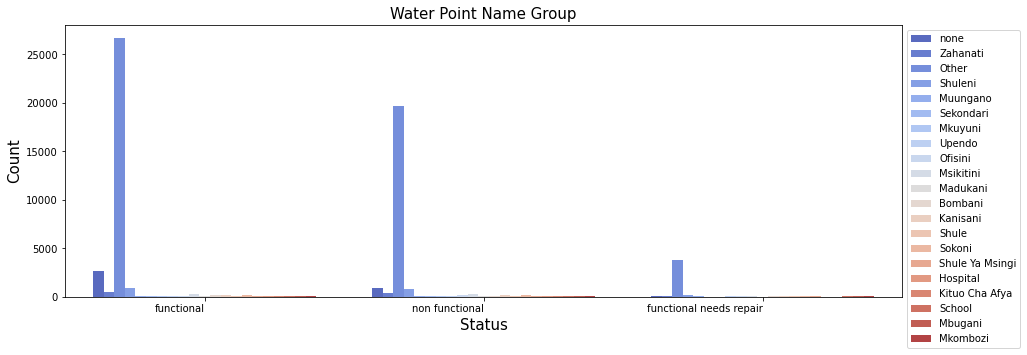

In [3156]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'wpt_name_group', data = df, palette = 'coolwarm')
plt.title('Water Point Name Group', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/wpt_name_group_countplot')

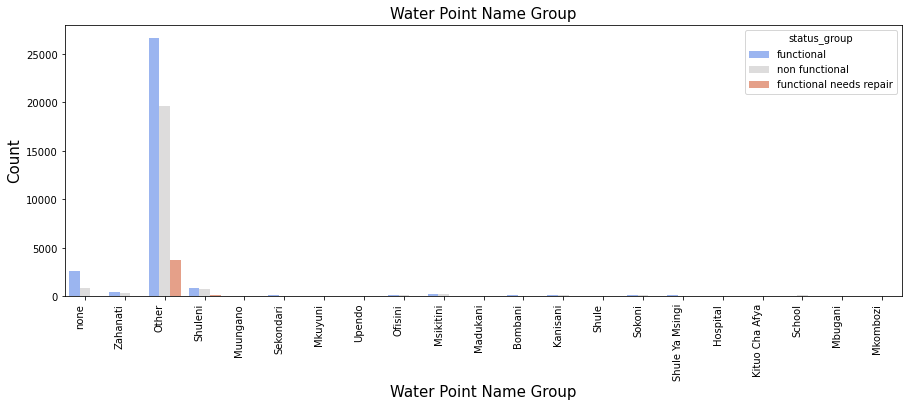

In [3157]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'wpt_name_group', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Water Point Name Group', fontsize = 15)
plt.xlabel('Water Point Name Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.savefig('./Data/wpt_name_group_countplot')

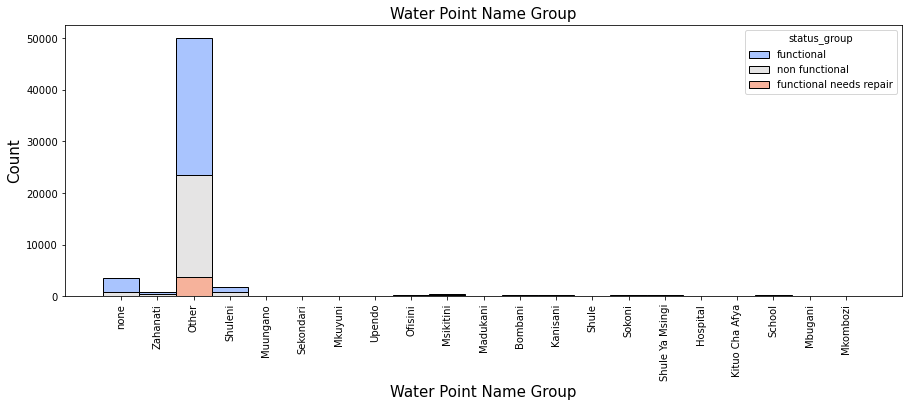

In [3158]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'wpt_name_group', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Water Point Name Group', fontsize = 15)
plt.xlabel('Water Point Name Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/wpt_name_group_histplot')

## **'num_private'**

In [3159]:
#get value count
df['num_private'].value_counts(normalize = True)

0      0.987256
6      0.001364
1      0.001229
5      0.000774
8      0.000774
         ...   
180    0.000017
213    0.000017
23     0.000017
55     0.000017
94     0.000017
Name: num_private, Length: 65, dtype: float64

In [3160]:
#percentage of 0 value
len(df[df['num_private'] == 0]) / len(df) * 100

98.72558922558923

In [3161]:
#'num_private' has too many 0 values, drop it
df.drop(columns = 'num_private', axis = 1, inplace = True)

## **'basin'**
A topographic region in which all water drains to a common area.

Lake Victoria              0.172525
Pangani                    0.150505
Rufiji                     0.134276
Internal                   0.131061
Lake Tanganyika            0.108283
Wami / Ruvu                0.100791
Lake Nyasa                 0.085606
Ruvuma / Southern Coast    0.075640
Lake Rukwa                 0.041313
Name: basin, dtype: float64


<AxesSubplot:>

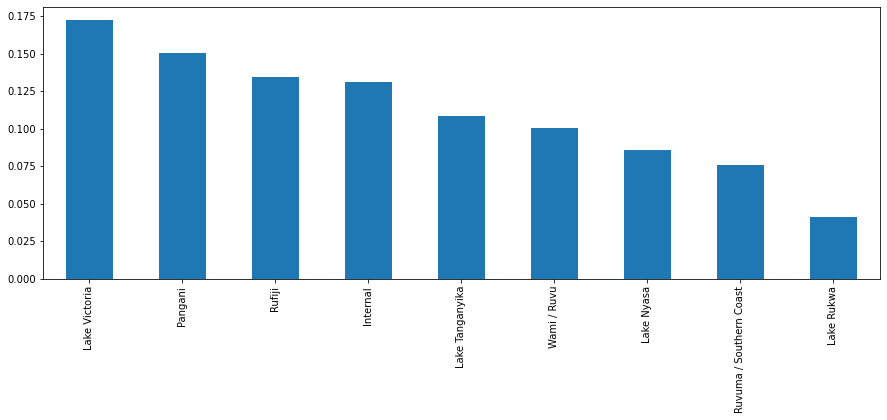

In [3162]:
#get value count
print(df['basin'].value_counts(normalize = True))

#visualize
df['basin'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [3163]:
#more exploration
pd.DataFrame(df.groupby('status_group')['basin'].value_counts(normalize = True))

basin
status_group            basin                            
functional              Pangani                  0.166527
                        Lake Victoria            0.158095
                        Rufiji                   0.157103
                        Internal                 0.138938
                        Lake Nyasa               0.103041
                        Wami / Ruvu              0.097213
                        Lake Tanganyika          0.096314
                        Ruvuma / Southern Coast  0.051768
                        Lake Rukwa               0.030999
functional needs repair Lake Victoria            0.229094
                        Lake Tanganyika          0.171879
                        Internal                 0.129025
                        Pangani                  0.110493
                        Rufiji                   0.101228
                        Ruvuma / Southern Coast  0.075515
                        Lake Rukwa               0.062543
                        Wami / Ruvu              0.062312
                        Lake Nyasa               0.057911
non functional          Lake Victoria            0.182220
                        Pangani                  0.135428
                        Internal                 0.120312
                        Lake Tanganyika          0.113170
                        Wami / Ruvu              0.113127
                        Ruvuma / Southern Coast  0.109402
                        Rufiji                   0.108263
                        Lake Nyasa               0.066202
                        Lake Rukwa               0.051875

In [3164]:
#more exploration
pd.DataFrame(df.groupby('basin')['status_group'].value_counts(normalize = True))

status_group
basin                   status_group                         
Internal                functional                   0.575723
                        non functional               0.352730
                        functional needs repair      0.071548
Lake Nyasa              functional                   0.653687
                        non functional               0.297148
                        functional needs repair      0.049164
Lake Rukwa              non functional               0.482478
                        functional                   0.407498
                        functional needs repair      0.110024
Lake Tanganyika         functional                   0.483053
                        non functional               0.401586
                        functional needs repair      0.115361
Lake Victoria           functional                   0.497658
                        non functional               0.405835
                        functional needs repair      0.096507
Pangani                 functional                   0.600895
                        non functional               0.345749
                        functional needs repair      0.053356
Rufiji                  functional                   0.635406
                        non functional               0.309804
                        functional needs repair      0.054789
Ruvuma / Southern Coast non functional               0.555753
                        functional                   0.371689
                        functional needs repair      0.072557
Wami / Ruvu             functional                   0.523802
                        non functional               0.431268
                        functional needs repair      0.044931

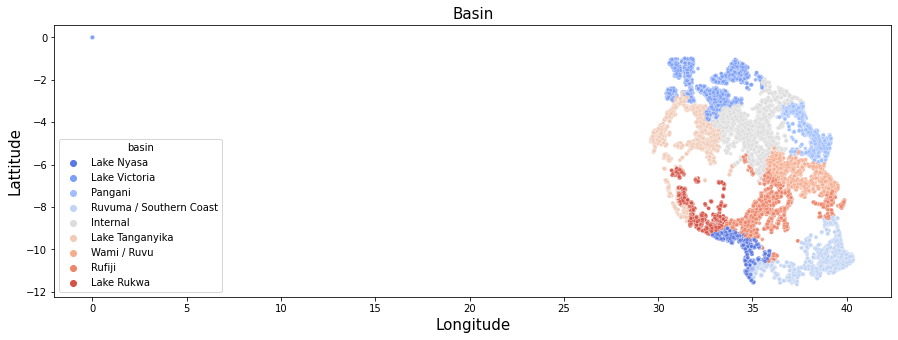

<Figure size 432x288 with 0 Axes>

In [3165]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'basin', data = df, alpha = 0.75, s = 15, palette = 'coolwarm')
plt.title('Basin', fontsize = 15)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Lattitude', fontsize = 15)
plt.show()
plt.savefig('./Data/basin_scatterplot')

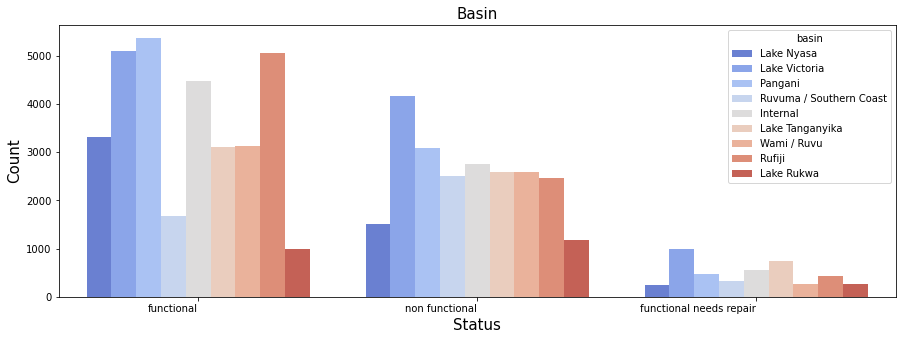

In [3166]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'basin', data = df, palette = 'coolwarm')
plt.title('Basin', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.savefig('./Data/basin_countplot')

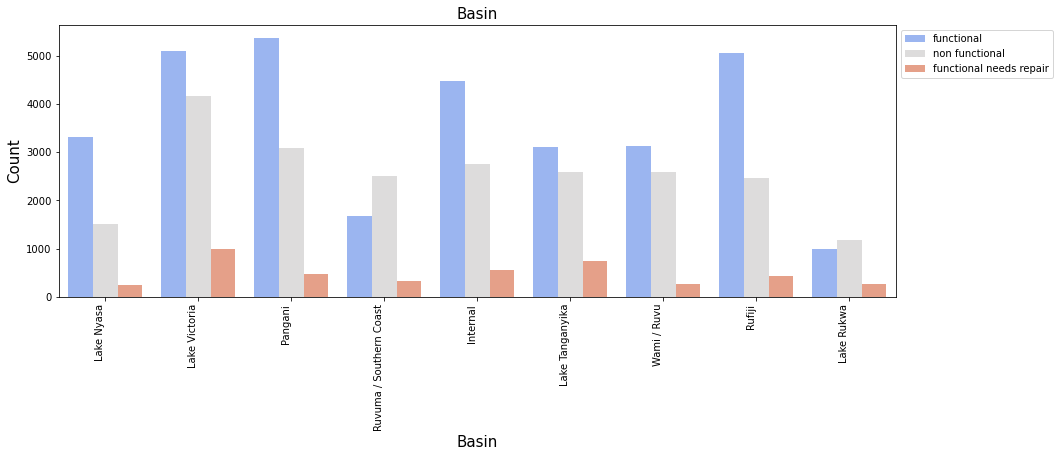

In [3167]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'basin', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Basin', fontsize = 15)
plt.xlabel('Basin', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/basin_countplot')

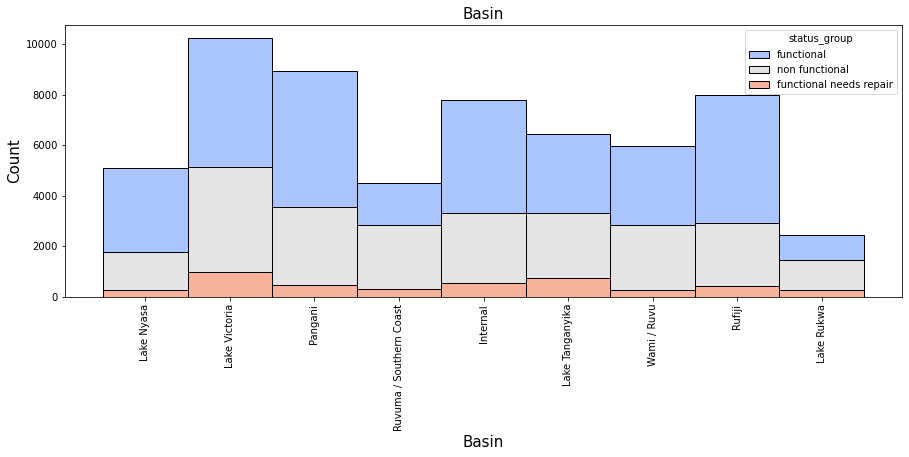

In [3168]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'basin', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Basin', fontsize = 15)
plt.xlabel('Basin', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/basin_histplot')

## **'subvillage'**
Geographic location

In [3169]:
#get value counts
df['subvillage'].value_counts(normalize = True)

Madukani        0.008606
Shuleni         0.008572
Majengo         0.008504
Kati            0.006319
Mtakuja         0.004438
                  ...   
Sangu Jineli    0.000017
Mwaduguru       0.000017
Zugimlole       0.000017
Kinankoli       0.000017
Tugi            0.000017
Name: subvillage, Length: 19287, dtype: float64

In [3170]:
#'subvillage' has missing values
print('Missing values before:', df['subvillage'].isna().sum())

#fill missing values with 'unknown'
df['subvillage'].fillna('unknown', inplace = True)
print('Missing values after:', df['subvillage'].isna().sum())

Missing values before: 371
Missing values after: 0


<AxesSubplot:>

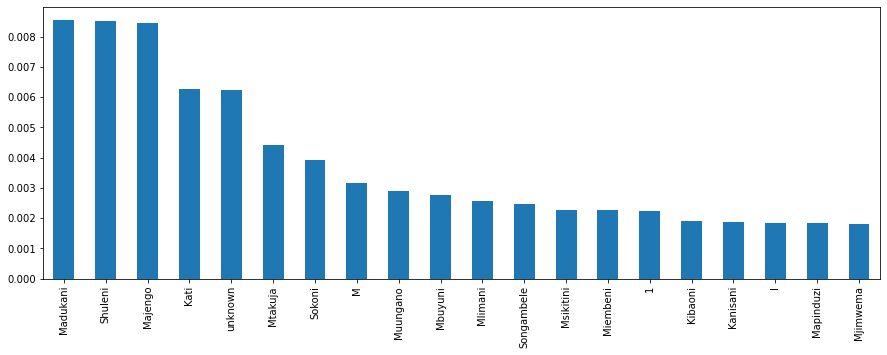

In [3171]:
#get top 20 
df['subvillage'].value_counts(normalize = True).head(20).plot.bar(figsize = (15, 5))

In [3172]:
#more exploration
pd.DataFrame(df.groupby('status_group')['subvillage'].value_counts(normalize = True))

subvillage
status_group   subvillage              
functional     Madukani        0.007688
               Majengo         0.007254
               Shuleni         0.007161
               Kati            0.006665
               unknown         0.006355
...                                 ...
non functional Zombengalawa    0.000044
               Zonwe           0.000044
               Zugimlole       0.000044
               Zunguni         0.000044
               Zuri            0.000044

[25685 rows x 1 columns]

In [3173]:
#more exploration
pd.DataFrame(df.groupby('subvillage')['status_group'].value_counts(normalize = True))

status_group
subvillage status_group                         
##         functional                   1.000000
'A' Kati   non functional               1.000000
1          non functional               0.545455
           functional                   0.393939
           functional needs repair      0.060606
...                                          ...
Zunzuli    functional                   0.250000
Zuri       non functional               1.000000
unknown    functional                   0.552561
           non functional               0.444744
           functional needs repair      0.002695

[25685 rows x 1 columns]

In [3174]:
#too many unique values, we will only select for the 20 most common ones and categorize the rest as 'Other'
def subvillage_grouped(var):
    if var in df['subvillage'].value_counts(normalize = True).head(20).index:
        return var
    else:
        return 'Other'
    
#apply function to column
df['subvillage_group'] = df['subvillage'].map(subvillage_grouped)

In [3175]:
#check how many unique values
df['subvillage_group'].nunique()

21

In [3176]:
df[['subvillage_group']].value_counts(normalize = True)

subvillage_group
Other               0.923788
Madukani            0.008552
Shuleni             0.008519
Majengo             0.008451
Kati                0.006279
unknown             0.006246
Mtakuja             0.004411
Sokoni              0.003906
M                   0.003148
Muungano            0.002896
Mbuyuni             0.002761
Mlimani             0.002559
Songambele          0.002475
Miembeni            0.002256
Msikitini           0.002256
1                   0.002222
Kibaoni             0.001919
Kanisani            0.001869
Mapinduzi           0.001835
I                   0.001835
Mjimwema            0.001818
dtype: float64

In [3177]:
#more exploration
pd.DataFrame(df.groupby('status_group')['subvillage_group'].value_counts(normalize = True))

subvillage_group
status_group   subvillage_group                  
functional     Other                     0.928113
               Madukani                  0.007688
               Majengo                   0.007254
               Shuleni                   0.007161
               Kati                      0.006665
...                                           ...
non functional Mlimani                   0.002410
               Kanisani                  0.002103
               Kibaoni                   0.001972
               I                         0.001095
               Mjimwema                  0.000964

[63 rows x 1 columns]

In [3178]:
#more exploration
pd.DataFrame(df.groupby('subvillage_group')['status_group'].value_counts(normalize = True))

status_group
subvillage_group status_group                         
1                non functional               0.545455
                 functional                   0.393939
                 functional needs repair      0.060606
I                functional                   0.752294
                 non functional               0.229358
...                                                ...
Songambele       non functional               0.401361
                 functional needs repair      0.040816
unknown          functional                   0.552561
                 non functional               0.444744
                 functional needs repair      0.002695

[63 rows x 1 columns]

## 'region'
Geographic location

Iringa           0.089125
Shinyanga        0.083872
Mbeya            0.078098
Kilimanjaro      0.073721
Morogoro         0.067441
Arusha           0.056397
Kagera           0.055825
Mwanza           0.052222
Kigoma           0.047407
Ruvuma           0.044444
Pwani            0.044360
Tanga            0.042879
Dodoma           0.037054
Singida          0.035236
Mara             0.033148
Tabora           0.032980
Rukwa            0.030438
Mtwara           0.029125
Manyara          0.026650
Lindi            0.026027
Dar es Salaam    0.013552
Name: region, dtype: float64


<AxesSubplot:>

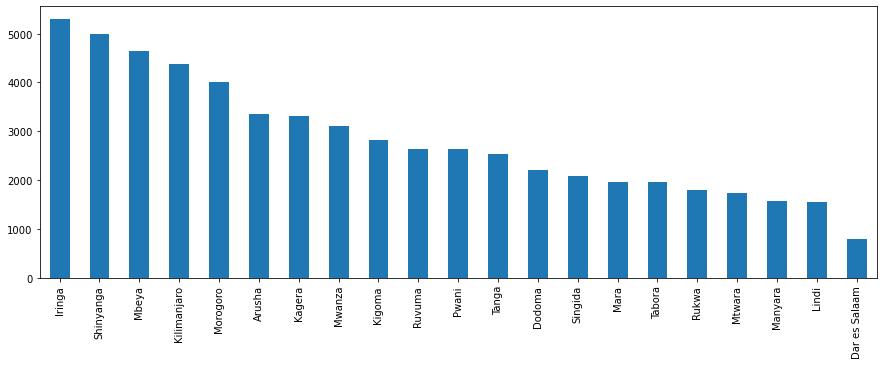

In [3179]:
#get value count
print(df['region'].value_counts(normalize = True))

#visualize
df['region'].value_counts().plot.bar(figsize = (15, 5))

In [3180]:
#more exploration
pd.DataFrame(df.groupby('status_group')['region'].value_counts(normalize = True))

region
status_group   region                 
functional     Iringa         0.128367
               Shinyanga      0.086456
               Kilimanjaro    0.081838
               Mbeya          0.071887
               Arusha         0.071112
...                                ...
non functional Singida        0.041798
               Arusha         0.038600
               Kigoma         0.037242
               Manyara        0.021907
               Dar es Salaam  0.014940

[63 rows x 1 columns]

In [3181]:
#more exploration
pd.DataFrame(df.groupby('region')['status_group'].value_counts(normalize = True))

status_group
region        status_group                         
Arusha        functional                   0.684776
              non functional               0.262985
              functional needs repair      0.052239
Dar es Salaam functional                   0.572671
              non functional               0.423602
...                                             ...
Tabora        functional                   0.432874
              functional needs repair      0.022971
Tanga         functional                   0.563801
              non functional               0.407538
              functional needs repair      0.028661

[63 rows x 1 columns]

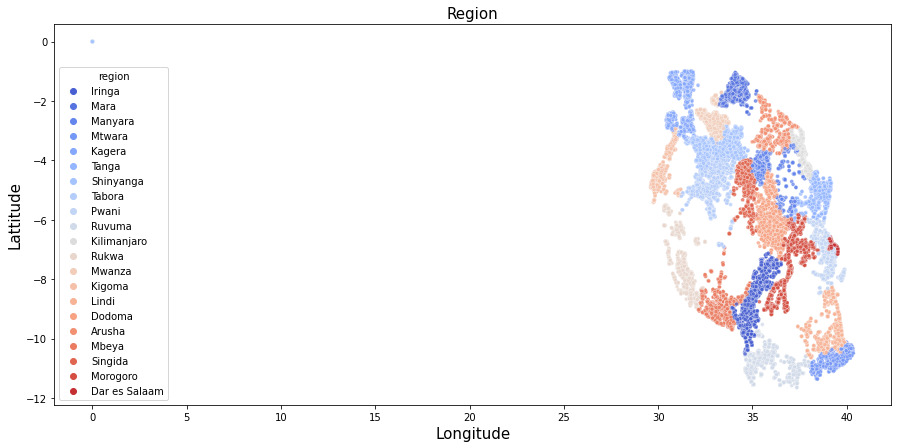

<Figure size 432x288 with 0 Axes>

In [3182]:
#plot
plt.figure(figsize = (15, 7))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'region', data = df, alpha = 0.75, s = 15, palette = 'coolwarm')
plt.title('Region', fontsize = 15)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Lattitude', fontsize = 15)
plt.show()
plt.savefig('./Data/region_scatterplot')

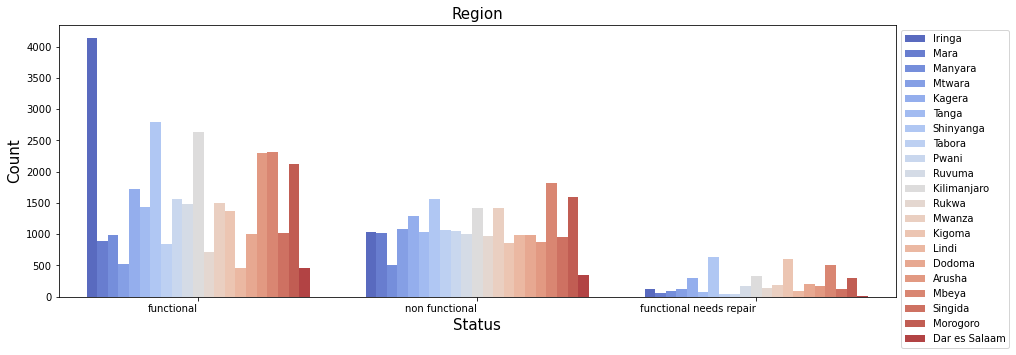

In [3183]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'region', data = df, palette = 'coolwarm')
plt.title('Region', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/region_countplot')

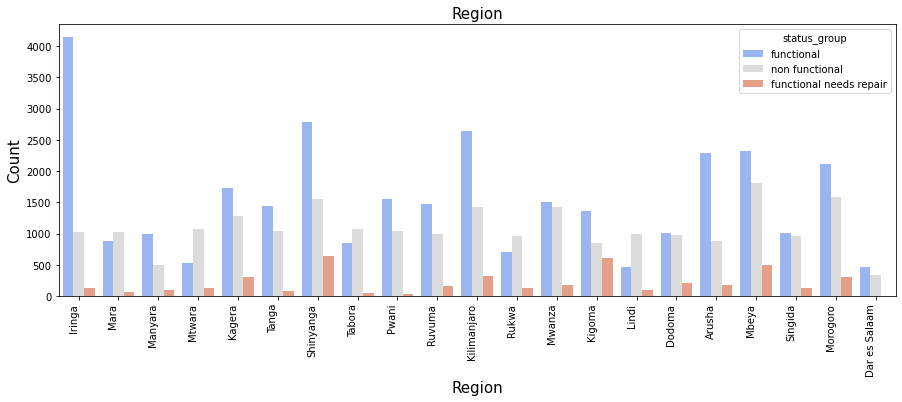

In [3184]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'region', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Region', fontsize = 15)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.savefig('./Data/region_countplot')

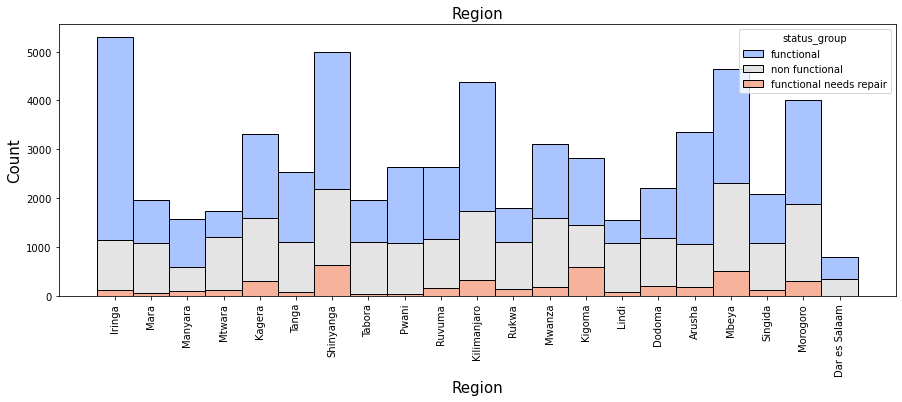

In [3185]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'region', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Region', fontsize = 15)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/region_histplot')

## 'region_code'
Geographic location (coded)

11    0.089226
17    0.084360
12    0.078098
3     0.073721
5     0.068013
18    0.055960
19    0.051296
2     0.050909
16    0.047407
10    0.044444
4     0.042306
1     0.037054
13    0.035236
14    0.033316
20    0.033148
15    0.030438
6     0.027088
21    0.026650
80    0.020842
60    0.017256
90    0.015438
7     0.013552
99    0.007121
9     0.006566
24    0.005488
8     0.005051
40    0.000017
Name: region_code, dtype: float64


<AxesSubplot:>

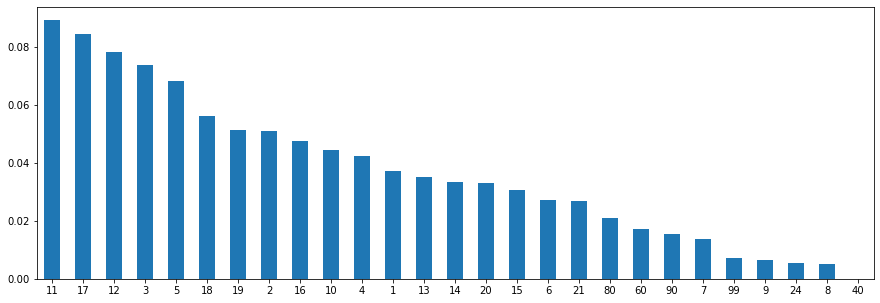

In [3186]:
#get value count
print(df['region_code'].value_counts(normalize = True))

#visualize
df['region_code'].value_counts(normalize = True).plot.bar(figsize = (15, 5), rot = 0)

In [3187]:
#more exploration
pd.DataFrame(df.groupby('status_group')['region_code'].value_counts(normalize = True))

region_code
status_group   region_code             
functional     11              0.128429
               17              0.087014
               3               0.081838
               12              0.071887
               5               0.066555
...                                 ...
non functional 8               0.011348
               9               0.010077
               99              0.009858
               24              0.000394
               40              0.000044

[79 rows x 1 columns]

In [3188]:
#more exploration
pd.DataFrame(df.groupby('region_code')['status_group'].value_counts(normalize = True))

status_group
region_code status_group                         
1           functional                   0.458428
            non functional               0.446615
            functional needs repair      0.094957
2           functional                   0.654101
            non functional               0.288360
...                                           ...
90          functional                   0.211559
            functional needs repair      0.106870
99          non functional               0.531915
            functional                   0.451537
            functional needs repair      0.016548

[79 rows x 1 columns]

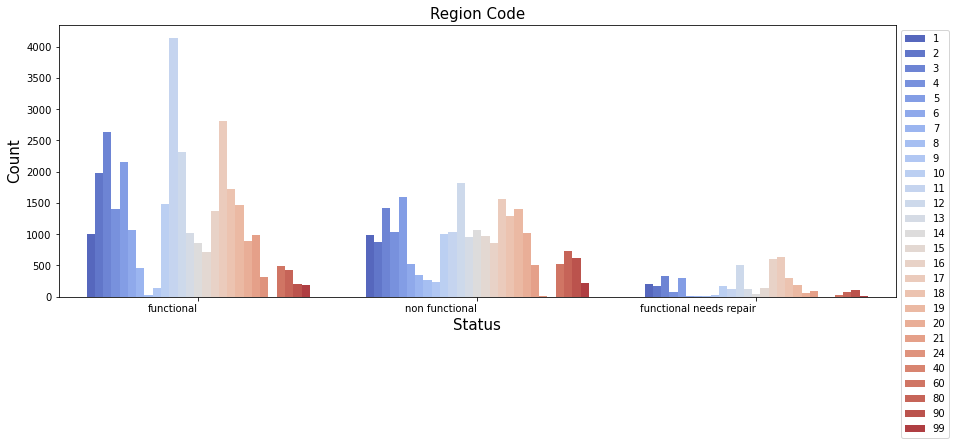

In [3189]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'region_code', data = df, palette = 'coolwarm')
plt.title('Region Code', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/region_code_countplot')

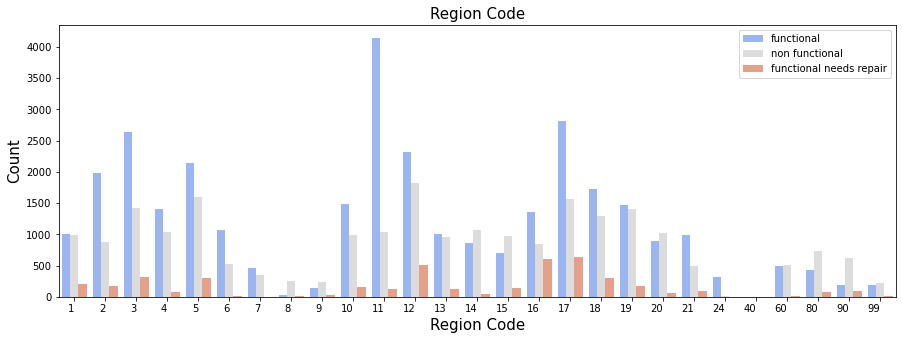

In [3190]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'region_code', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Region Code', fontsize = 15)
plt.xlabel('Region Code', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(loc = 'upper right')
plt.savefig('./Data/region_code_countplot')

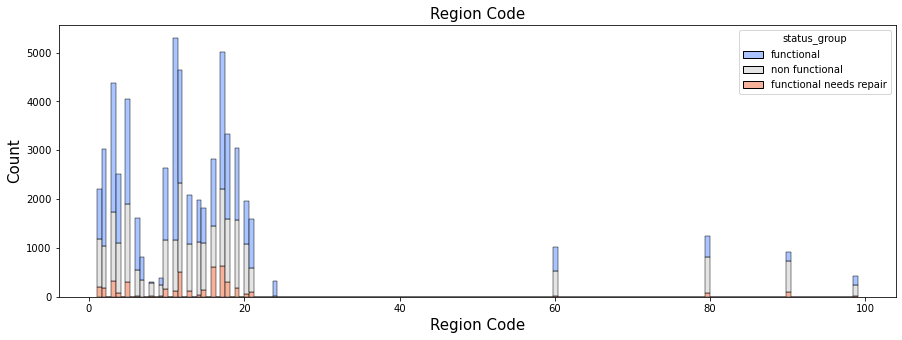

In [3191]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'region_code', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Region Code', fontsize = 15)
plt.xlabel('Region Code', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.savefig('./Data/region_code_histplot')

## 'district_code'
Geographic location (coded)

1     0.205438
2     0.188098
3     0.168316
4     0.151498
5     0.073333
6     0.068586
7     0.056279
8     0.017559
30    0.016751
33    0.014714
53    0.012542
43    0.008502
13    0.006582
23    0.004933
63    0.003283
62    0.001835
60    0.001061
0     0.000387
80    0.000202
67    0.000101
Name: district_code, dtype: float64


<AxesSubplot:>

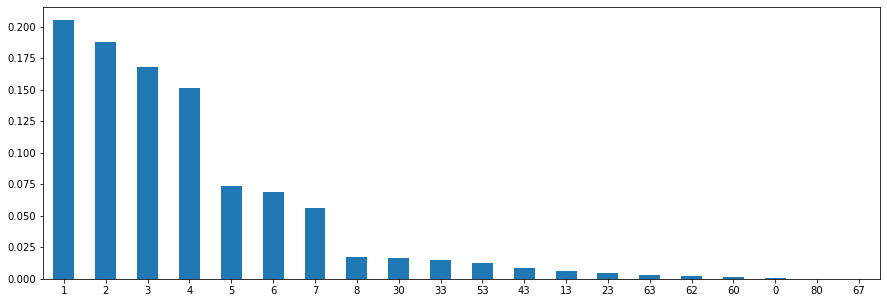

In [3192]:
#get value count
print(df['district_code'].value_counts(normalize = True))

#visualize
df['district_code'].value_counts(normalize = True).plot.bar(figsize = (15, 5), rot = 0)

In [3193]:
#more exploration
pd.DataFrame(df.groupby('status_group')['district_code'].value_counts(normalize = True))

district_code
status_group            district_code               
functional              1                   0.203292
                        2                   0.192287
                        4                   0.173440
                        3                   0.153570
                        5                   0.076847
                        6                   0.063703
                        7                   0.062432
                        30                  0.021358
                        8                   0.018258
                        53                  0.007750
                        43                  0.006603
                        33                  0.006014
                        23                  0.005115
                        13                  0.003689
                        63                  0.001922
                        62                  0.001767
                        60                  0.001581
                        67                  0.000155
                        0                   0.000124
                        80                  0.000093
functional needs repair 1                   0.298124
                        2                   0.195506
                        3                   0.161918
                        4                   0.117906
                        6                   0.053741
                        7                   0.049571
                        5                   0.044939
                        33                  0.022701
                        30                  0.019921
                        8                   0.012277
                        13                  0.006718
                        23                  0.006023
                        53                  0.006023
                        43                  0.001853
                        63                  0.001158
                        60                  0.000695
                        0                   0.000463
                        67                  0.000232
                        80                  0.000232
non functional          1                   0.190939
                        3                   0.190370
                        2                   0.180775
                        4                   0.126840
                        6                   0.078295
                        5                   0.073738
                        7                   0.048852
                        33                  0.025499
                        53                  0.020549
                        8                   0.017569
                        43                  0.012443
                        13                  0.010647
                        30                  0.009639
                        63                  0.005608
                        23                  0.004469
                        62                  0.002278
                        0                   0.000745
                        60                  0.000394
                        80                  0.000351

In [3194]:
#more exploration
pd.DataFrame(df.groupby('district_code')['status_group'].value_counts(normalize = True))

status_group
district_code status_group                         
0             non functional               0.739130
              functional                   0.173913
              functional needs repair      0.086957
1             functional                   0.537409
              non functional               0.357125
              functional needs repair      0.105466
2             functional                   0.555178
              non functional               0.369283
              functional needs repair      0.075539
3             functional                   0.495499
              non functional               0.434587
              functional needs repair      0.069914
4             functional                   0.621736
              non functional               0.321702
              functional needs repair      0.056562
5             functional                   0.569100
              non functional               0.386364
              functional needs repair      0.044536
6             functional                   0.504418
              non functional               0.438635
              functional needs repair      0.056946
7             functional                   0.602453
              non functional               0.333533
              functional needs repair      0.064014
8             functional                   0.564717
              non functional               0.384468
              functional needs repair      0.050815
13            non functional               0.621483
              functional                   0.304348
              functional needs repair      0.074169
23            functional                   0.563140
              non functional               0.348123
              functional needs repair      0.088737
30            functional                   0.692462
              non functional               0.221106
              functional needs repair      0.086432
33            non functional               0.665904
              functional                   0.221968
              functional needs repair      0.112128
43            non functional               0.562376
              functional                   0.421782
              functional needs repair      0.015842
53            non functional               0.629530
              functional                   0.335570
              functional needs repair      0.034899
60            functional                   0.809524
              non functional               0.142857
              functional needs repair      0.047619
62            functional                   0.522936
              non functional               0.477064
63            non functional               0.656410
              functional                   0.317949
              functional needs repair      0.025641
67            functional                   0.833333
              functional needs repair      0.166667
80            non functional               0.666667
              functional                   0.250000
              functional needs repair      0.083333

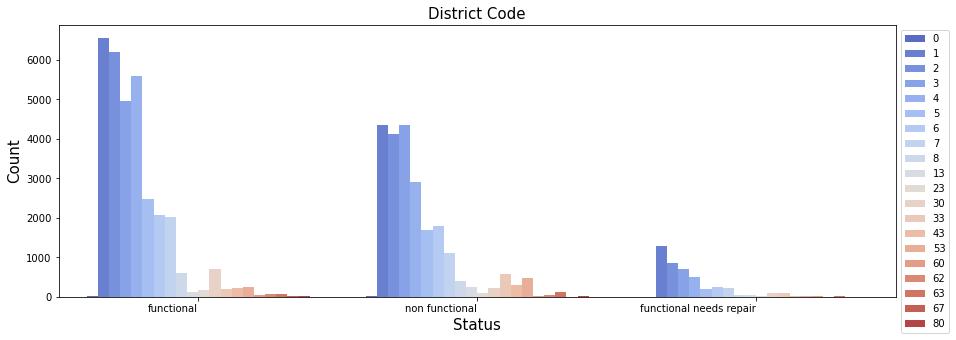

In [3195]:
# plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'district_code', data = df, palette = 'coolwarm')
plt.title('District Code', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/district_code_countplot')

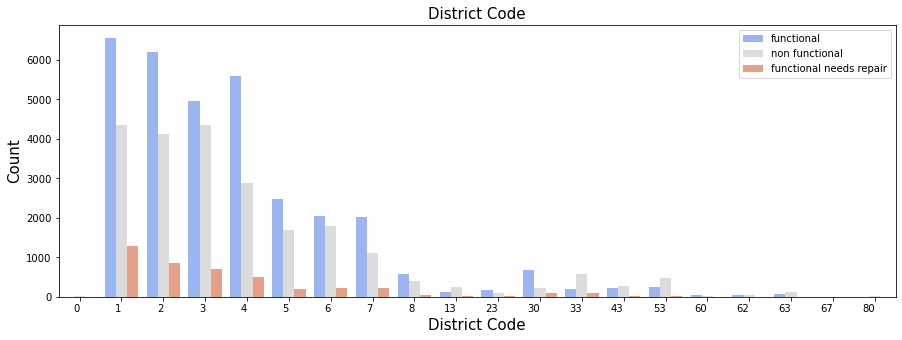

In [3196]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'district_code', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('District Code', fontsize = 15)
plt.xlabel('District Code', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(loc = 'upper right')
plt.savefig('./Data/district_code_countplot')

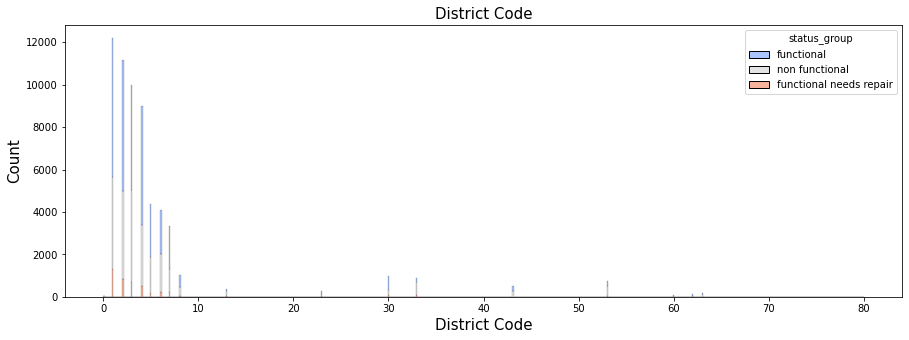

In [3197]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'district_code', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('District Code', fontsize = 15)
plt.xlabel('District Code', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.savefig('./Data/district_code_histplot')

## **'lga'**
Geographic location

Njombe          0.042138
Arusha Rural    0.021077
Moshi Rural     0.021061
Bariadi         0.019815
Rungwe          0.018620
                  ...   
Moshi Urban     0.001330
Kigoma Urban    0.001195
Arusha Urban    0.001061
Lindi Urban     0.000354
Nyamagana       0.000017
Name: lga, Length: 125, dtype: float64


<AxesSubplot:>

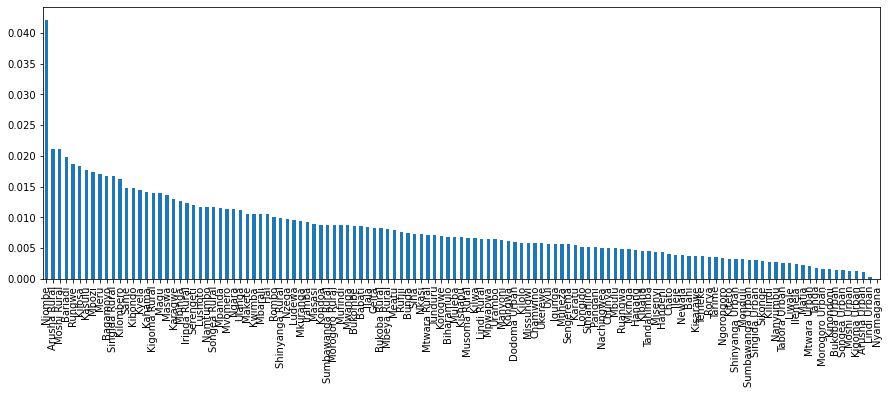

In [3198]:
#get value count
print(df['lga'].value_counts(normalize = True))

#visualize
df['lga'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [3199]:
#more exploration
pd.DataFrame(df.groupby('status_group')['lga'].value_counts(normalize = True))

lga
status_group   lga                   
functional     Njombe        0.062215
               Arusha Rural  0.027124
               Moshi Rural   0.022722
               Bagamoyo      0.022629
               Rungwe        0.020955
...                               ...
non functional Moshi Urban   0.000701
               Arusha Urban  0.000613
               Lindi Urban   0.000613
               Karatu        0.000394
               Nyamagana     0.000044

[356 rows x 1 columns]

In [3200]:
#more exploration
pd.DataFrame(df.groupby('lga')['status_group'].value_counts(normalize = True))

status_group
lga          status_group                         
Arusha Rural functional                   0.698882
             non functional               0.262780
             functional needs repair      0.038339
Arusha Urban functional                   0.666667
             non functional               0.222222
...                                            ...
Urambo       functional                   0.405759
             functional needs repair      0.036649
Uyui         non functional               0.545723
             functional                   0.433628
             functional needs repair      0.020649

[356 rows x 1 columns]

In [3201]:
#too many unique values, we will only select for the 20 most common ones and categorize the rest as 'Other'
def lga_grouped(var):
    if var in df['lga'].value_counts(normalize = True).head(20).index:
        return var
    else:
        return 'Other'
    
#apply function to column
df['lga_group'] = df['lga'].map(lga_grouped)

In [3202]:
#check how many unique values
df['lga_group'].nunique()

21

In [3203]:
df[['lga_group']].value_counts(normalize = True)

lga_group    
Other            0.644815
Njombe           0.042138
Arusha Rural     0.021077
Moshi Rural      0.021061
Bariadi          0.019815
Rungwe           0.018620
Kilosa           0.018418
Kasulu           0.017626
Mbozi            0.017407
Meru             0.016987
Bagamoyo         0.016785
Singida Rural    0.016751
Kilombero        0.016145
Same             0.014764
Kibondo          0.014714
Kyela            0.014461
Kahama           0.014074
Kigoma Rural     0.013872
Magu             0.013872
Maswa            0.013620
Karagwe          0.012980
dtype: float64

In [3204]:
#more exploration
pd.DataFrame(df.groupby('status_group')['lga_group'].value_counts(normalize = True))

lga_group
status_group   lga_group              
functional     Other          0.626616
               Njombe         0.062215
               Arusha Rural   0.027124
               Moshi Rural    0.022722
               Bagamoyo       0.022629
...                                ...
non functional Bagamoyo       0.011611
               Maswa          0.010997
               Kasulu         0.010296
               Kigoma Rural   0.009288
               Bariadi        0.008237

[63 rows x 1 columns]

In [3205]:
#more exploration
pd.DataFrame(df.groupby('lga_group')['status_group'].value_counts(normalize = True))

status_group
lga_group     status_group                         
Arusha Rural  functional                   0.698882
              non functional               0.262780
              functional needs repair      0.038339
Bagamoyo      functional                   0.732197
              non functional               0.265797
...                                             ...
Same          non functional               0.338655
              functional needs repair      0.149373
Singida Rural non functional               0.497487
              functional                   0.440201
              functional needs repair      0.062312

[63 rows x 1 columns]

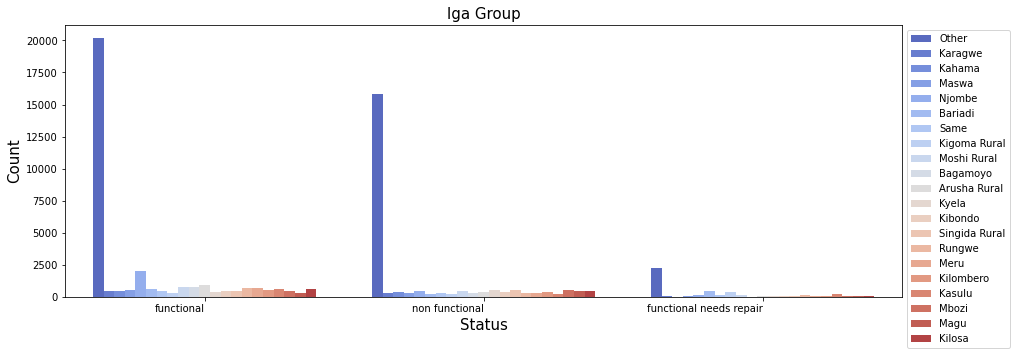

In [3206]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'lga_group', data = df, palette = 'coolwarm')
plt.title('lga Group', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/lga_group_countplot')

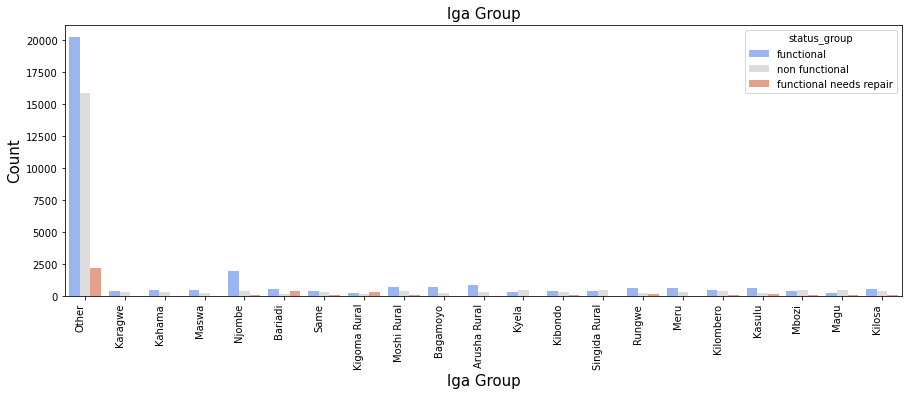

In [3207]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'lga_group', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('lga Group', fontsize = 15)
plt.xlabel('lga Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.savefig('./Data/lga_group_countplot')

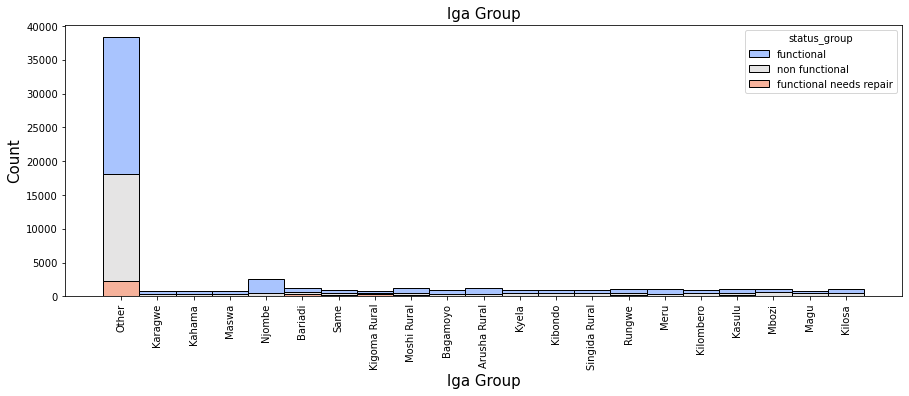

In [3208]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'lga_group', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('lga Group', fontsize = 15)
plt.xlabel('lga Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/lga_group_histplot')

## **'ward'**
Geographic location

In [3209]:
#get value count
df['ward'].value_counts(normalize = True)

Igosi            0.005168
Imalinyi         0.004242
Siha Kati        0.003906
Mdandu           0.003889
Nduruma          0.003653
                   ...   
Kihangimahuka    0.000017
Kitete           0.000017
Mawenzi          0.000017
Mkumbi           0.000017
Kirongo          0.000017
Name: ward, Length: 2092, dtype: float64

<AxesSubplot:>

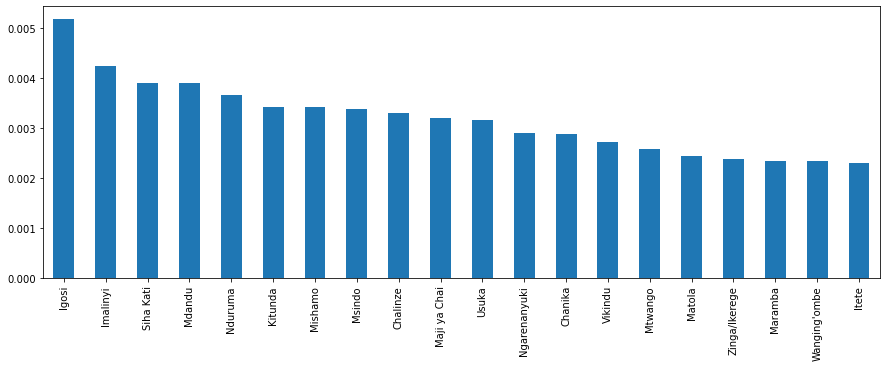

In [3210]:
#get top 20 
df['ward'].value_counts(normalize = True).head(20).plot.bar(figsize = (15, 5))

In [3211]:
#more exploration
pd.DataFrame(df.groupby('status_group')['ward'].value_counts(normalize = True))

ward
status_group   ward               
functional     Igosi      0.008959
               Imalinyi   0.007440
               Siha Kati  0.007068
               Mdandu     0.006262
               Kitunda    0.004991
...                            ...
non functional Themi      0.000044
               Ugala      0.000044
               Ukata      0.000044
               Vigaeni    0.000044
               Zirai      0.000044

[4884 rows x 1 columns]

In [3212]:
#more exploration
pd.DataFrame(df.groupby('ward')['status_group'].value_counts(normalize = True))

status_group
ward      status_group                         
Aghondi   non functional               1.000000
Akheri    functional                   0.600000
          non functional               0.244444
          functional needs repair      0.155556
Arash     functional                   0.583333
...                                         ...
Zongomera functional                   0.515152
          non functional               0.484848
Zuzu      functional                   0.562500
          non functional               0.375000
          functional needs repair      0.062500

[4884 rows x 1 columns]

In [3213]:
#too many unique values, we will only select for the 20 most common ones and categorize the rest as 'Other'
def ward_grouped(var):
    if var in df['ward'].value_counts(normalize = True).head(20).index:
        return var
    else:
        return 'Other'
    
#apply function to column
df['ward_group'] = df['ward'].map(ward_grouped)

In [3214]:
#check how many unique values
df['ward_group'].nunique()

21

In [3215]:
df[['ward_group']].value_counts(normalize = True)

ward_group   
Other            0.936397
Igosi            0.005168
Imalinyi         0.004242
Siha Kati        0.003906
Mdandu           0.003889
Nduruma          0.003653
Mishamo          0.003418
Kitunda          0.003418
Msindo           0.003384
Chalinze         0.003300
Maji ya Chai     0.003199
Usuka            0.003148
Ngarenanyuki     0.002896
Chanika          0.002879
Vikindu          0.002727
Mtwango          0.002576
Matola           0.002441
Zinga/Ikerege    0.002374
Wanging'ombe     0.002340
Maramba          0.002340
Itete            0.002306
dtype: float64

In [3216]:
#more exploration
pd.DataFrame(df.groupby('status_group')['ward_group'].value_counts(normalize = True))

ward_group
status_group            ward_group               
functional              Other            0.911188
                        Igosi            0.008959
                        Imalinyi         0.007440
                        Siha Kati        0.007068
                        Mdandu           0.006262
                        Kitunda          0.004991
                        Chalinze         0.004743
                        Ngarenanyuki     0.004743
                        Msindo           0.004309
                        Nduruma          0.004247
                        Maji ya Chai     0.003968
                        Matola           0.003968
                        Mtwango          0.003813
                        Maramba          0.003627
                        Vikindu          0.003565
                        Itete            0.003503
                        Usuka            0.003472
                        Chanika          0.003410
                        Zinga/Ikerege    0.003069
                        Wanging'ombe     0.002325
                        Mishamo          0.001333
functional needs repair Other            0.969655
                        Usuka            0.008107
                        Nduruma          0.003706
                        Mishamo          0.003475
                        Msindo           0.003243
                        Wanging'ombe     0.003243
                        Mdandu           0.003011
                        Maji ya Chai     0.001853
                        Matola           0.001158
                        Itete            0.000927
                        Imalinyi         0.000695
                        Ngarenanyuki     0.000463
                        Siha Kati        0.000463
non functional          Other            0.965738
                        Mishamo          0.006353
                        Nduruma          0.002804
                        Chanika          0.002673
                        Maji ya Chai     0.002366
                        Wanging'ombe     0.002191
                        Msindo           0.002103
                        Vikindu          0.002059
                        Chalinze         0.001884
                        Kitunda          0.001840
                        Zinga/Ikerege    0.001840
                        Usuka            0.001753
                        Mtwango          0.001314
                        Maramba          0.000964
                        Itete            0.000876
                        Igosi            0.000789
                        Ngarenanyuki     0.000745
                        Mdandu           0.000701
                        Matola           0.000526
                        Imalinyi         0.000394
                        Siha Kati        0.000088

In [3217]:
#more exploration
pd.DataFrame(df.groupby('ward_group')['status_group'].value_counts(normalize = True))

status_group
ward_group    status_group                         
Chalinze      functional                   0.780612
              non functional               0.219388
Chanika       functional                   0.643275
              non functional               0.356725
Igosi         functional                   0.941368
              non functional               0.058632
Imalinyi      functional                   0.952381
              non functional               0.035714
              functional needs repair      0.011905
Itete         functional                   0.824818
              non functional               0.145985
              functional needs repair      0.029197
Kitunda       functional                   0.793103
              non functional               0.206897
Maji ya Chai  functional                   0.673684
              non functional               0.284211
              functional needs repair      0.042105
Maramba       functional                   0.841727
              non functional               0.158273
Matola        functional                   0.882759
              non functional               0.082759
              functional needs repair      0.034483
Mdandu        functional                   0.874459
              non functional               0.069264
              functional needs repair      0.056277
Mishamo       non functional               0.714286
              functional                   0.211823
              functional needs repair      0.073892
Msindo        functional                   0.691542
              non functional               0.238806
              functional needs repair      0.069652
Mtwango       functional                   0.803922
              non functional               0.196078
Nduruma       functional                   0.631336
              non functional               0.294931
              functional needs repair      0.073733
Ngarenanyuki  functional                   0.889535
              non functional               0.098837
              functional needs repair      0.011628
Other         functional                   0.528460
              non functional               0.396282
              functional needs repair      0.075258
Siha Kati     functional                   0.982759
              functional needs repair      0.008621
              non functional               0.008621
Usuka         functional                   0.598930
              non functional               0.213904
              functional needs repair      0.187166
Vikindu       functional                   0.709877
              non functional               0.290123
Wanging'ombe  functional                   0.539568
              non functional               0.359712
              functional needs repair      0.100719
Zinga/Ikerege functional                   0.702128
              non functional               0.297872

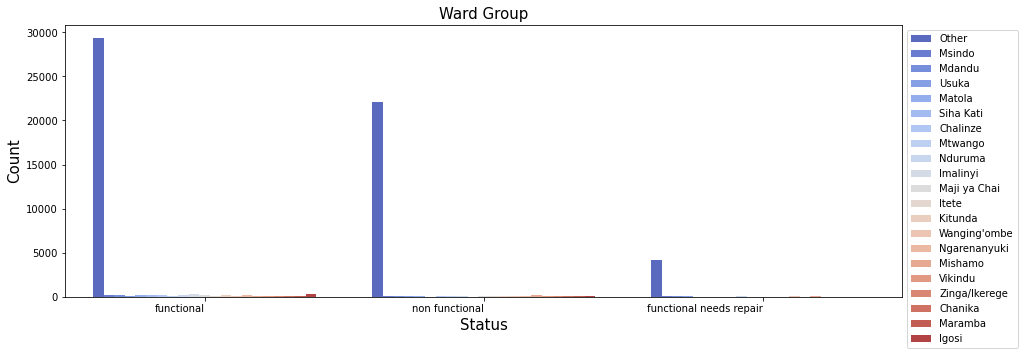

In [3218]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'ward_group', data = df, palette = 'coolwarm')
plt.title('Ward Group', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/ward_group_countplot')

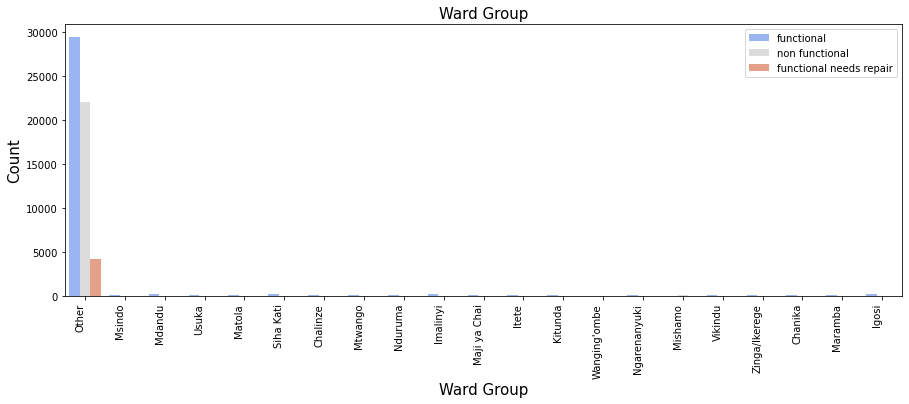

In [3219]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'ward_group', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Ward Group', fontsize = 15)
plt.xlabel('Ward Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.legend(loc = 'upper right')
plt.savefig('./Data/ward_group_countplot')

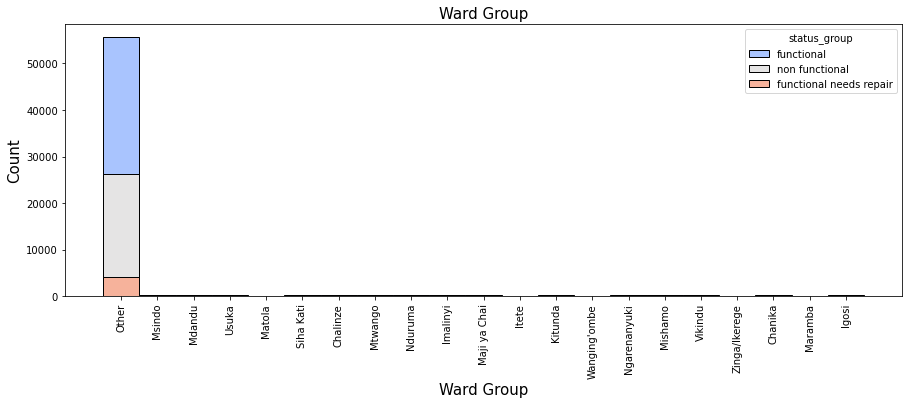

In [3220]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'ward_group', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Ward Group', fontsize = 15)
plt.xlabel('Ward Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/ward_group_histplot')

## **'population'**
Population around the well

In [3221]:
#get value count
print(df['population'].value_counts(normalize = True))

#too many 0 value, this column is not useful, drop it
#df.drop(columns = 'population', axis = 1, inplace = True)

0       0.359949
1       0.118266
200     0.032660
150     0.031852
250     0.028300
          ...   
3241    0.000017
1960    0.000017
1685    0.000017
2248    0.000017
1439    0.000017
Name: population, Length: 1049, dtype: float64


<AxesSubplot:>

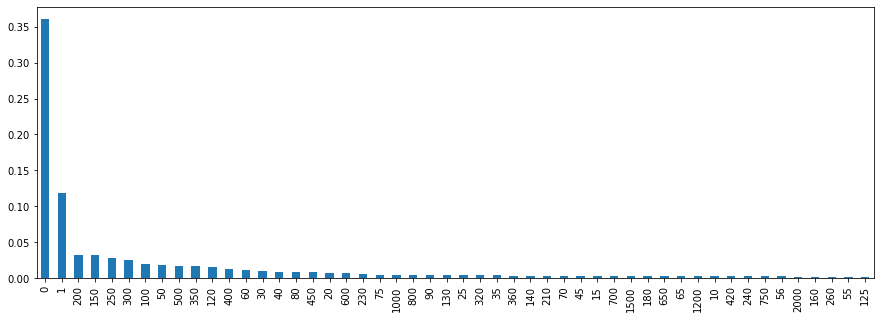

In [3222]:
#get top 50 
df['population'].value_counts(normalize = True).head(50).plot.bar(figsize = (15, 5))

In [3223]:
#more exploration
pd.DataFrame(df.groupby('status_group')['population'].value_counts(normalize = True))

population
status_group   population            
functional     0             0.349484
               1             0.090238
               150           0.036672
               200           0.035308
               300           0.024024
...                               ...
non functional 6302          0.000044
               6800          0.000044
               6922          0.000044
               8848          0.000044
               9865          0.000044

[1939 rows x 1 columns]

In [3224]:
#more exploration
pd.DataFrame(df.groupby('population')['status_group'].value_counts(normalize = True))

status_group
population status_group                         
0          functional                   0.527291
           non functional               0.389692
           functional needs repair      0.083018
1          non functional               0.535231
           functional                   0.414377
...                                          ...
9865       non functional               1.000000
10000      functional                   1.000000
11463      functional                   1.000000
15300      functional needs repair      1.000000
30500      functional                   1.000000

[1939 rows x 1 columns]

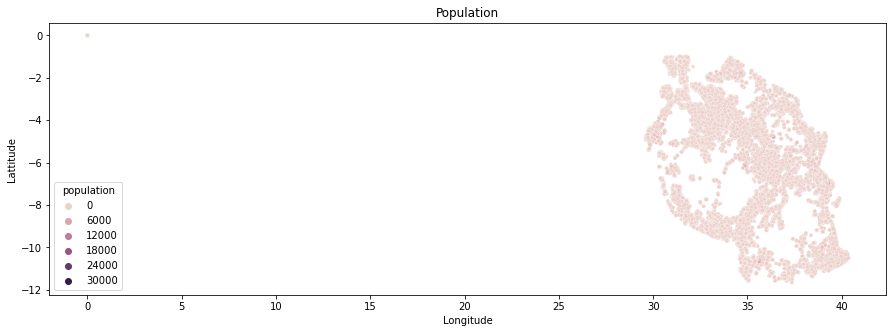

<Figure size 432x288 with 0 Axes>

In [3225]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'population', data = df, alpha = 0.75, s = 15)
plt.title('Population')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/population_scatterplot')

## **'public_meeting'**
True/False

In [3226]:
#get value count
df['public_meeting'].value_counts(normalize = True)

True     0.909838
False    0.090162
Name: public_meeting, dtype: float64

In [3227]:
#'public_meeting' has missing values
print('Missing values before:', df['public_meeting'].isna().sum())

#fill missing values with 'unknown' 
df['public_meeting'].fillna('unknown', inplace = True)
print('Missing values after:', df['public_meeting'].isna().sum())

Missing values before: 3334
Missing values after: 0


In [3228]:
#more exploration
pd.DataFrame(df.groupby('public_meeting')['status_group'].value_counts(normalize = True))

status_group
public_meeting status_group                         
False          non functional               0.482690
               functional                   0.429871
               functional needs repair      0.087438
True           functional                   0.556899
               non functional               0.370195
               functional needs repair      0.072906
unknown        functional                   0.503299
               non functional               0.449910
               functional needs repair      0.046791

## **'recorded_by'**
Group entering this row of data

In [3229]:
#get value counts
print(df['recorded_by'].value_counts(normalize = True))

#this column is not useful, drop it
df.drop(columns = 'recorded_by', axis = 1, inplace = True)

GeoData Consultants Ltd    1.0
Name: recorded_by, dtype: float64


## **'scheme_management'**
Who operates the waterpoint

VWC                 0.662662
WUG                 0.093763
Water authority     0.056787
WUA                 0.051924
Water Board         0.049493
Parastatal          0.030258
Private operator    0.019145
Company             0.019109
Other               0.013796
SWC                 0.001747
Trust               0.001297
None                0.000018
Name: scheme_management, dtype: float64


<AxesSubplot:>

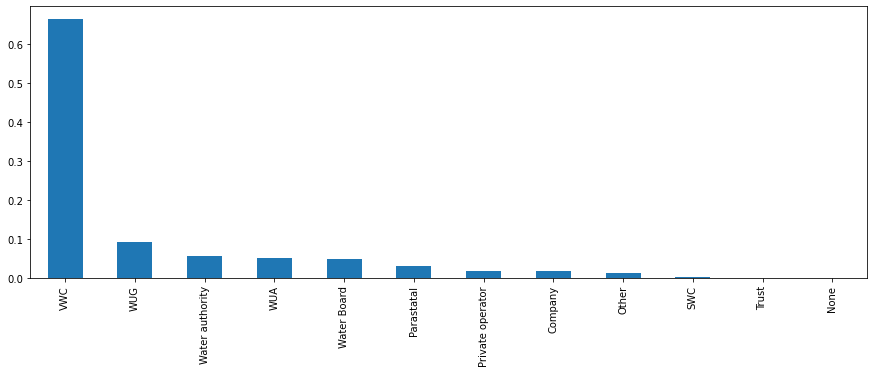

In [3230]:
#get value count
print(df['scheme_management'].value_counts(normalize = True))

#visualize
df['scheme_management'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [3231]:
#'scheme_management' has missing values
print('Missing values before:', df['scheme_management'].isna().sum())

#fill missing values with 'unknown' 
df['scheme_management'].fillna('unknown', inplace = True)
print('Missing values after:', df['scheme_management'].isna().sum())

Missing values before: 3877
Missing values after: 0


In [3232]:
#more exploration
pd.DataFrame(df.groupby('status_group')['scheme_management'].value_counts(normalize = True))

scheme_management
status_group            scheme_management                   
functional              VWC                         0.587743
                        WUG                         0.093183
                        Water Board                 0.063641
                        WUA                         0.061843
                        other                       0.058061
                        Water authority             0.050157
                        Parastatal                  0.029945
                        Private operator            0.022598
                        Company                     0.016554
                        Other                       0.014198
                        Trust                       0.001426
                        SWC                         0.000620
                        None                        0.000031
functional needs repair VWC                         0.540653
                        WUG                         0.155664
                        Water authority             0.103776
                        WUA                         0.055363
                        other                       0.051656
                        Parastatal                  0.046792
                        Water Board                 0.025712
                        Company                     0.008571
                        Private operator            0.005328
                        Other                       0.005096
                        Trust                       0.001158
                        SWC                         0.000232
non functional          VWC                         0.679066
                        other                       0.078032
                        WUG                         0.066947
                        Water authority             0.047625
                        WUA                         0.028435
                        Water Board                 0.025587
                        Parastatal                  0.022433
                        Company                     0.021469
                        Private operator            0.013626
                        Other                       0.012531
                        SWC                         0.003330
                        Trust                       0.000920

In [3233]:
#more exploration
pd.DataFrame(df.groupby('scheme_management')['status_group'].value_counts(normalize = True))

status_group
scheme_management status_group                         
Company           functional                   0.503299
                  non functional               0.461828
                  functional needs repair      0.034873
None              functional                   1.000000
Other             functional                   0.597911
                  non functional               0.373368
                  functional needs repair      0.028721
Parastatal        functional                   0.575000
                  non functional               0.304762
                  functional needs repair      0.120238
Private operator  functional                   0.685795
                  non functional               0.292568
                  functional needs repair      0.021637
SWC               non functional               0.783505
                  functional                   0.206186
                  functional needs repair      0.010309
Trust             functional                   0.638889
                  non functional               0.291667
                  functional needs repair      0.069444
VWC               functional                   0.515315
                  non functional               0.421249
                  functional needs repair      0.063436
WUA               functional                   0.691988
                  non functional               0.225113
                  functional needs repair      0.082900
WUG               functional                   0.577411
                  non functional               0.293507
                  functional needs repair      0.129082
Water Board       functional                   0.747089
                  non functional               0.212518
                  functional needs repair      0.040393
Water authority   functional                   0.513162
                  non functional               0.344751
                  functional needs repair      0.142087
other             functional                   0.483105
                  non functional               0.459376
                  functional needs repair      0.057519

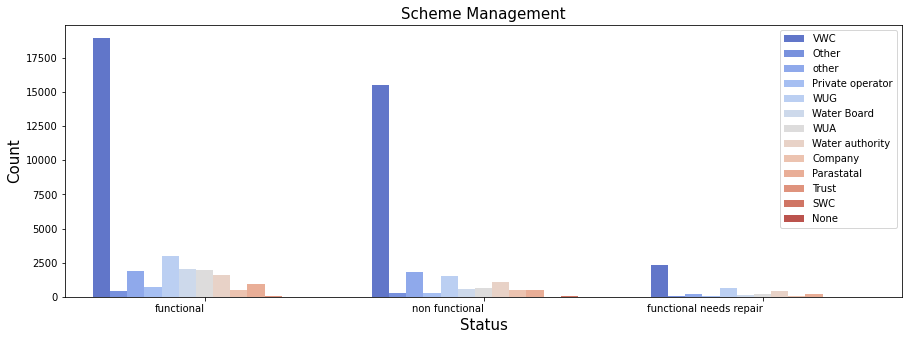

In [3234]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'scheme_management', data = df, palette = 'coolwarm')
plt.title('Scheme Management', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(loc = 'upper right')
plt.savefig('./Data/scheme_management_countplot')

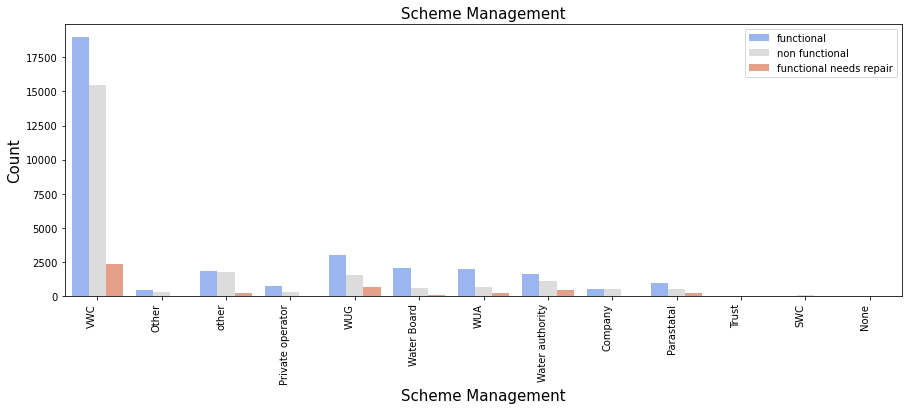

In [3235]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'scheme_management', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Scheme Management', fontsize = 15)
plt.xlabel('Scheme Management', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.legend(loc = 'upper right')
plt.savefig('./Data/scheme_management_countplot')

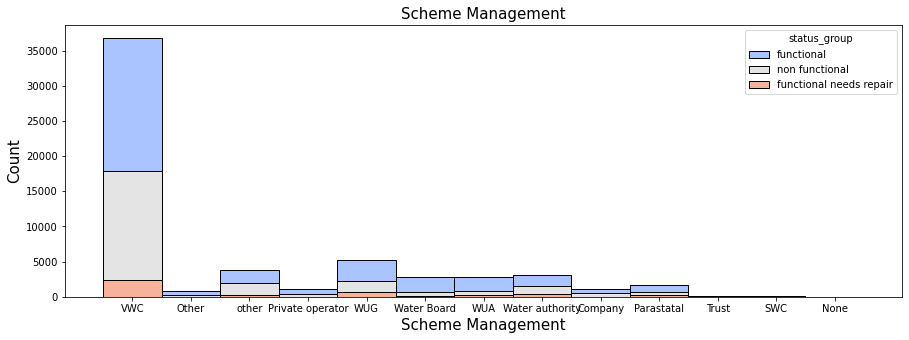

In [3236]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'scheme_management', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Scheme Management', fontsize = 15)
plt.xlabel('Scheme Management', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.savefig('./Data/scheme_management_histplot')

## **'scheme_name'**
Who operates the waterpoint

In [3237]:
#get value count
df['scheme_name'].value_counts(normalize = True)

K                           0.021835
None                        0.020619
Borehole                    0.017481
Chalinze wate               0.012967
M                           0.012807
                              ...   
Rain water harest           0.000032
Mumikindo  spring source    0.000032
BL Orkugu                   0.000032
Mnazi moja                  0.000032
Damowaso                    0.000032
Name: scheme_name, Length: 2696, dtype: float64

In [3238]:
#'scheme_name' has missing values
print('Missing values before:', df['scheme_name'].isna().sum())

#fill missing values with 'unknown' 
df['scheme_name'].fillna('unknown', inplace = True)
print('Missing values after:', df['scheme_name'].isna().sum())

Missing values before: 28166
Missing values after: 0


<AxesSubplot:>

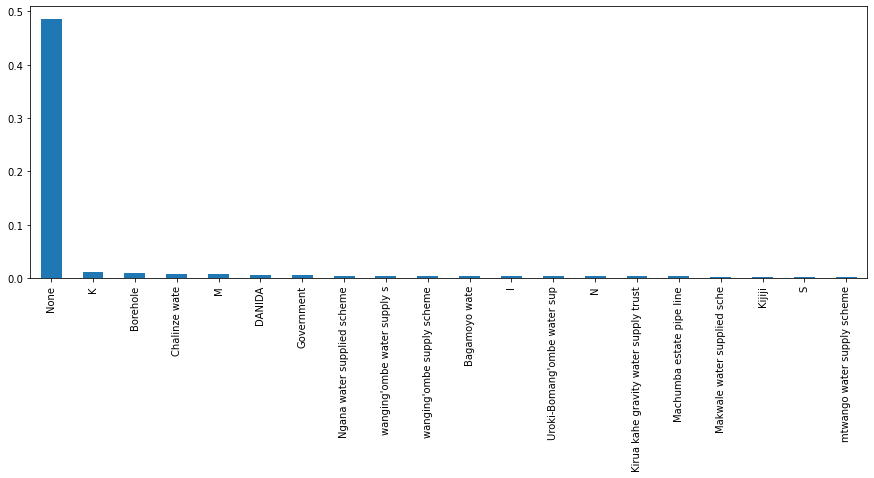

In [3239]:
#get top 20 
df['scheme_name'].value_counts(normalize = True).head(20).plot.bar(figsize = (15, 5))

In [3240]:
#more exploration
pd.DataFrame(df.groupby('status_group')['scheme_name'].value_counts(normalize = True))

scheme_name
status_group   scheme_name                          
functional     None                         0.461887
               K                            0.011656
               Chalinze wate                0.010788
               Borehole                     0.006324
               DANIDA                       0.006169
...                                              ...
non functional lugalo                       0.000044
               mtikanga supply scheme       0.000044
               nyaluhande                   0.000044
               water supply Katungulu       0.000044
               water supply at Kalebejo     0.000044

[4197 rows x 1 columns]

In [3241]:
#more exploration
pd.DataFrame(df.groupby('scheme_name')['status_group'].value_counts(normalize = True))

status_group
scheme_name                 status_group                         
14 Kambarage                functional                   1.000000
A                           functional                   0.547619
                            non functional               0.404762
                            functional needs repair      0.047619
ADP                         functional                   0.666667
...                                                           ...
water supply at Nyakasungwa non functional               0.600000
                            functional                   0.400000
water supply in Mwanza      functional                   1.000000
water supply in katungulu   non functional               0.777778
                            functional                   0.222222

[4197 rows x 1 columns]

In [3242]:
#too many unique values, we will only select for the 20 most common ones and categorize the rest as 'Other'
def scheme_name_grouped(var):
    if var in df['scheme_name'].value_counts(normalize = True).head(20).index:
        return var
    else:
        return 'Other'
    
#apply function to column
df['scheme_name_group'] = df['scheme_name'].map(scheme_name_grouped)


In [3243]:
#check how many unique values
df['scheme_name_group'].nunique()

21

In [3244]:
df[['scheme_name_group']].value_counts(normalize = True)

scheme_name_group                    
None                                     0.485017
Other                                    0.424428
K                                        0.011481
Borehole                                 0.009192
Chalinze wate                            0.006818
M                                        0.006734
DANIDA                                   0.006380
Government                               0.005387
Ngana water supplied scheme              0.004545
wanging'ombe water supply s              0.004394
wanging'ombe supply scheme               0.003939
I                                        0.003855
Bagamoyo wate                            0.003855
Uroki-Bomang'ombe water sup              0.003519
N                                        0.003434
Kirua kahe gravity water supply trust    0.003249
Machumba estate pipe line                0.003114
Makwale water supplied sche              0.002795
Kijiji                                   0.002710
S           

In [3245]:
#more exploration
pd.DataFrame(df.groupby('status_group')['scheme_name_group'].value_counts(normalize = True))

scheme_name_group
status_group            scheme_name_group                                       
functional              None                                            0.461887
                        Other                                           0.439722
                        K                                               0.011656
                        Chalinze wate                                   0.010788
                        Borehole                                        0.006324
                        DANIDA                                          0.006169
                        M                                               0.006107
                        Kirua kahe gravity water supply trust           0.005425
                        Uroki-Bomang'ombe water sup                     0.005394
                        wanging'ombe water supply s                     0.005115
                        Bagamoyo wate                                   0.004898
                        Government                                      0.004650
                        mtwango water supply scheme                     0.004526
                        wanging'ombe supply scheme                      0.004526
                        I                                               0.004433
                        Machumba estate pipe line                       0.004154
                        N                                               0.003906
                        Kijiji                                          0.003100
                        Makwale water supplied sche                     0.003038
                        Ngana water supplied scheme                     0.002170
                        S                                               0.002015
functional needs repair None                                            0.471161
                        Other                                           0.441279
                        K                                               0.026639
                        M                                               0.012972
                        wanging'ombe water supply s                     0.010887
                        Government                                      0.007413
                        Borehole                                        0.006023
                        wanging'ombe supply scheme                      0.005559
                        I                                               0.004401
                        DANIDA                                          0.003938
                        Machumba estate pipe line                       0.003011
                        S                                               0.002780
                        N                                               0.002085
                        Ngana water supplied scheme                     0.000927
                        Kirua kahe gravity water supply trust           0.000695
                        Uroki-Bomang'ombe water sup                     0.000232
non functional          None                                            0.520329
                        Other                                           0.399623
                        Borehole                                        0.013845
                        Ngana water supplied scheme                     0.008587
                        K                                               0.008368
                        DANIDA                                          0.007142
                        M                                               0.006441
                        Government                                      0.006046
                        S                                               0.003374
                        Bagamoyo wate                                   0.003111
                        N                                               0.003023
             

In [3246]:
#more exploration
pd.DataFrame(df.groupby('scheme_name_group')['status_group'].value_counts(normalize = True))

status_group
scheme_name_group                     status_group                         
Bagamoyo wate                         functional                   0.689956
                                      non functional               0.310044
Borehole                              non functional               0.578755
                                      functional                   0.373626
                                      functional needs repair      0.047619
Chalinze wate                         functional                   0.859259
                                      non functional               0.140741
DANIDA                                functional                   0.525066
                                      non functional               0.430079
                                      functional needs repair      0.044855
Government                            functional                   0.468750
                                      non functional               0.431250
                                      functional needs repair      0.100000
I                                     functional                   0.624454
                                      non functional               0.292576
                                      functional needs repair      0.082969
K                                     functional                   0.551320
                                      non functional               0.280059
                                      functional needs repair      0.168622
Kijiji                                functional                   0.621118
                                      non functional               0.378882
Kirua kahe gravity water supply trust functional                   0.906736
                                      non functional               0.077720
                                      functional needs repair      0.015544
M                                     functional                   0.492500
                                      non functional               0.367500
                                      functional needs repair      0.140000
Machumba estate pipe line             functional                   0.724324
                                      non functional               0.205405
                                      functional needs repair      0.070270
Makwale water supplied sche           functional                   0.590361
                                      non functional               0.409639
N                                     functional                   0.617647
                                      non functional               0.338235
                                      functional needs repair      0.044118
Ngana water supplied scheme           non functional               0.725926
                                      functional                   0.259259
                                      functional needs repair      0.014815
None                                  functional                   0.517182
                                      non functional               0.412218
                                      functional needs repair      0.070600
Other                                 functional                   0.562651
                                      non functional               0.361787
                                      functional needs repair      0.075562
S                                     non functional               0.500000
                                      functional                   0.422078
                                      functional needs repair      0.077922
Uroki-Bomang'ombe water sup           functional                   0.832536
                                      non functional               0.162679
                                      functional needs repair      0.004785
mtwango water supply scheme           functional                   0.960526
                                   

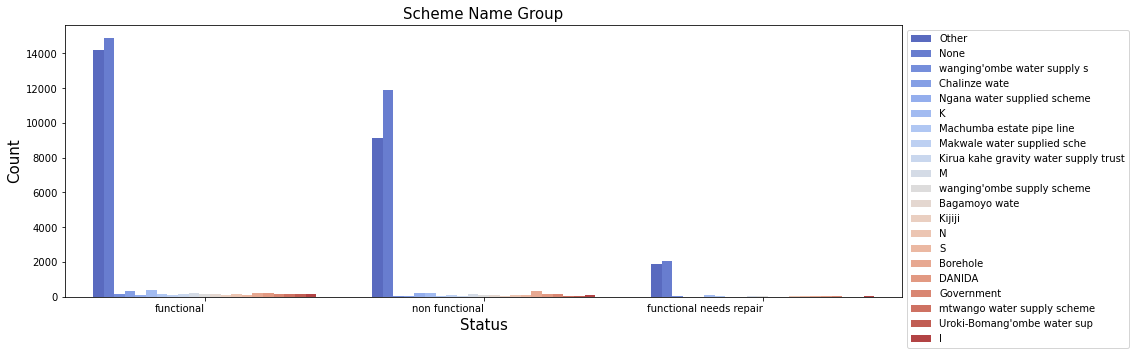

In [3247]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'scheme_name_group', data = df, palette = 'coolwarm')
plt.title('Scheme Name Group', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/scheme_name_group_countplot')

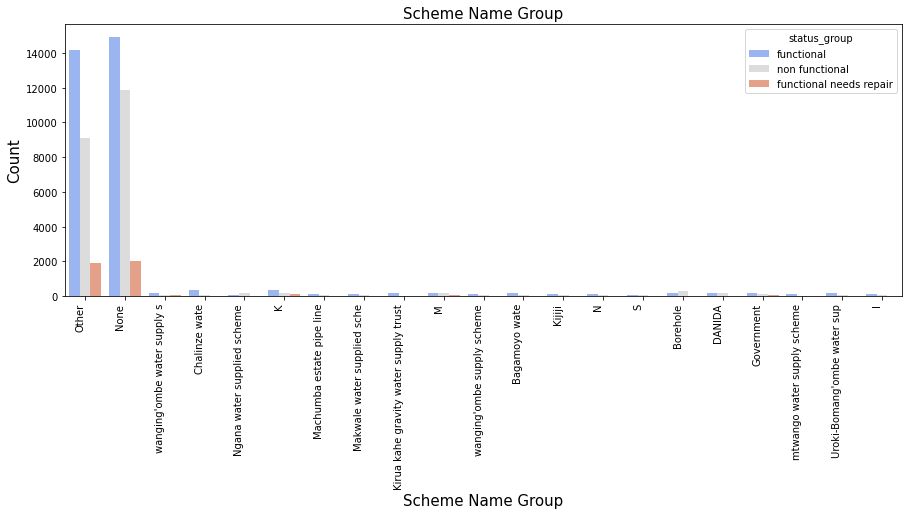

In [3248]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'scheme_name_group', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Scheme Name Group', fontsize = 15)
plt.xlabel('Scheme Name Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.savefig('./Data/scheme_name_group_countplot')

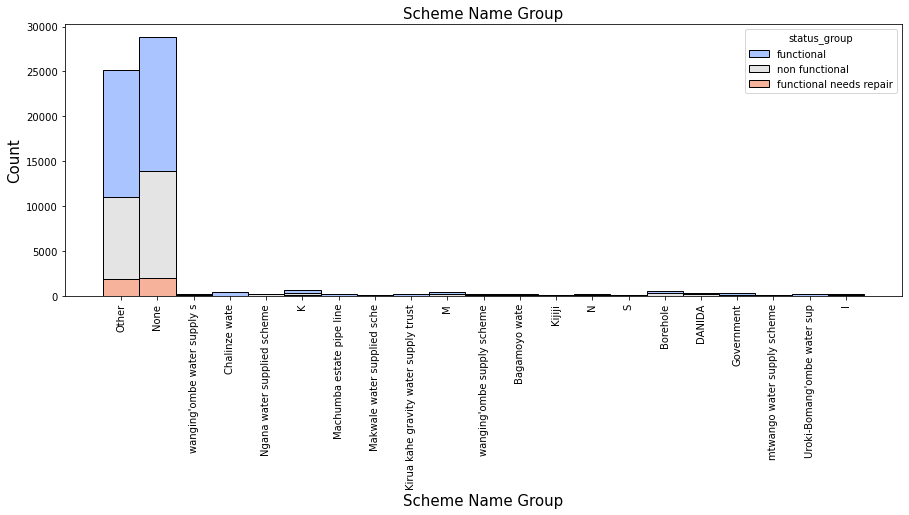

In [3249]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'scheme_name_group', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Scheme Name Group', fontsize = 15)
plt.xlabel('Scheme Name Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/scheme_name_group_histplot')

## **'permit'**
If the waterpoint is permitted

True     0.68955
False    0.31045
Name: permit, dtype: float64


<AxesSubplot:>

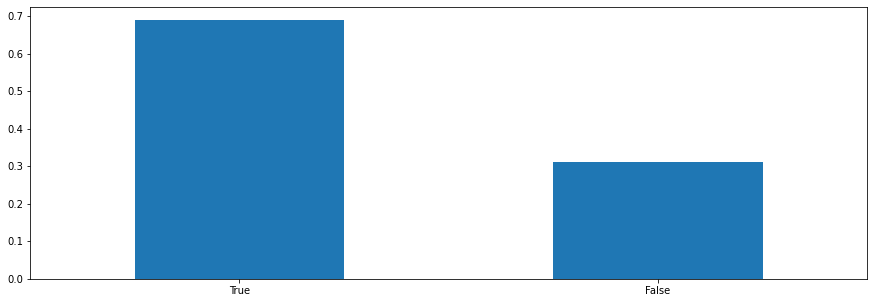

In [3250]:
#get value count
print(df['permit'].value_counts(normalize = True))

#visualize
df['permit'].value_counts(normalize = True).plot.bar(figsize = (15, 5), rot = 0)

In [3251]:
#'permit' has missing values
print('Missing values before:', df['permit'].isna().sum())

#fill missing values with 'unknown' 
df['permit'].fillna('unknown', inplace = True)
print('Missing values after:', df['permit'].isna().sum())

Missing values before: 3056
Missing values after: 0


In [3252]:
#get value count
df['permit'].value_counts(normalize = True)

True       0.654074
False      0.294478
unknown    0.051448
Name: permit, dtype: float64

In [3253]:
#more exploration
pd.DataFrame(df.groupby('status_group')['permit'].value_counts(normalize = True))

permit
status_group            permit           
functional              True     0.667752
                        False    0.280387
                        unknown  0.051861
functional needs repair True     0.624739
                        False    0.305768
                        unknown  0.069493
non functional          True     0.640291
                        False    0.312259
                        unknown  0.047450

In [3254]:
#more exploration
pd.DataFrame(df.groupby('permit')['status_group'].value_counts(normalize = True))

status_group
permit  status_group                         
False   functional                   0.517094
        non functional               0.407443
        functional needs repair      0.075463
True    functional                   0.554437
        non functional               0.376145
        functional needs repair      0.069417
unknown functional                   0.547448
        non functional               0.354385
        functional needs repair      0.098168

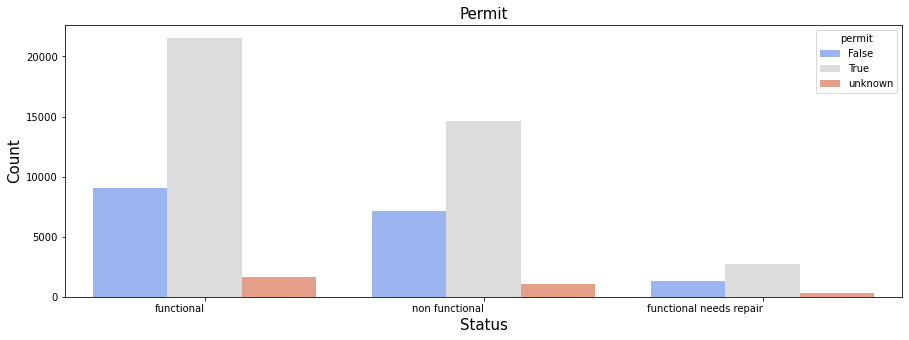

In [3255]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'permit', data = df, palette = 'coolwarm')
plt.title('Permit', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.savefig('./Data/permit_countplot')

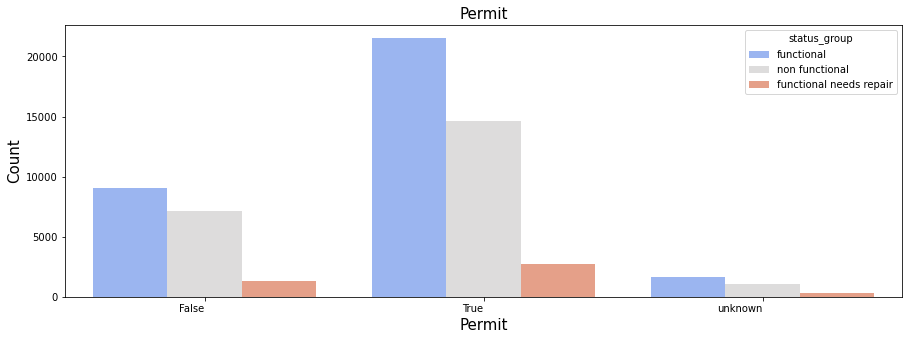

In [3256]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'permit', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Permit', fontsize = 15)
plt.xlabel('Permit', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.savefig('./Data/permit_countplot')

## **'construction_year'**
Year the waterpoint was constructed

0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
2012    0.018249
2002    0.018098
1978    0.017458
1995    0.017071
2005    0.017020
1999    0.016481
1998    0.016263
1990    0.016061
1985    0.015909
1980    0.013653
1996    0.013653
1984    0.013114
1982    0.012525
1994    0.012424
1972    0.011919
1974    0.011380
1997    0.010842
1992    0.010774
1993    0.010236
2001    0.009091
1988    0.008771
1983    0.008215
1975    0.007357
1986    0.007306
1976    0.006970
1970    0.006919
1991    0.005455
1989    0.005320
1987    0.005084
1981    0.004007
1977    0.003401
1979    0.003232
1973    0.003098
2013    0.002963
1971    0.002441
1960    0.001717
1967    0.001481
1963    0.001431
1968    0.001296
1969    0.000993
1964    0.000673
1962    0.000505
1961    0.000354
1965    0.000320
1966    0.000286
Name: construction_year, dtype: float64


<AxesSubplot:>

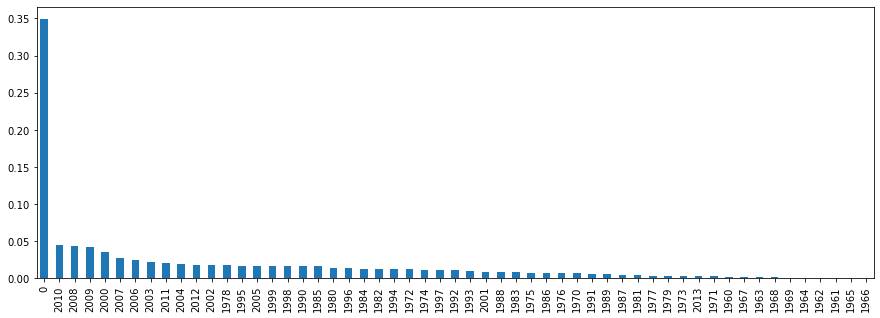

In [3257]:
#get value count
print(df['construction_year'].value_counts(normalize = True))

#visualize
df['construction_year'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [3258]:
#replace '0' with median value
#df['construction_year'].replace(0, df['construction_year'].median(), inplace = True)

#check
#(df['construction_year'] == 0).sum()

In [3259]:
#more exploration
pd.DataFrame(df.groupby('status_group')['construction_year'].value_counts(normalize = True))

construction_year
status_group   construction_year                   
functional     0                           0.327196
               2010                        0.062711
               2008                        0.057007
               2009                        0.054992
               2000                        0.039648
...                                             ...
non functional 1964                        0.001402
               1962                        0.000964
               1961                        0.000701
               1966                        0.000482
               1965                        0.000307

[164 rows x 1 columns]

In [3260]:
#more exploration
pd.DataFrame(df.groupby('construction_year')['status_group'].value_counts(normalize = True))

status_group
construction_year status_group                         
0                 functional                   0.509682
                  non functional               0.403931
                  functional needs repair      0.086388
1960              non functional               0.705882
                  functional                   0.235294
...                                                 ...
2012              non functional               0.283210
                  functional needs repair      0.047048
2013              functional                   0.579545
                  non functional               0.414773
                  functional needs repair      0.005682

[164 rows x 1 columns]

2021    0.348636
11      0.044529
13      0.043990
12      0.042643
21      0.035202
14      0.026717
15      0.024764
18      0.021650
10      0.021145
17      0.018906
9       0.018249
19      0.018098
43      0.017458
26      0.017071
16      0.017020
22      0.016481
23      0.016263
31      0.016061
36      0.015909
25      0.013653
41      0.013653
37      0.013114
39      0.012525
27      0.012424
49      0.011919
47      0.011380
24      0.010842
29      0.010774
28      0.010236
20      0.009091
33      0.008771
38      0.008215
46      0.007357
35      0.007306
45      0.006970
51      0.006919
30      0.005455
32      0.005320
34      0.005084
40      0.004007
44      0.003401
42      0.003232
48      0.003098
8       0.002963
50      0.002441
61      0.001717
54      0.001481
58      0.001431
53      0.001296
52      0.000993
57      0.000673
59      0.000505
60      0.000354
56      0.000320
55      0.000286
Name: age, dtype: float64


<AxesSubplot:>

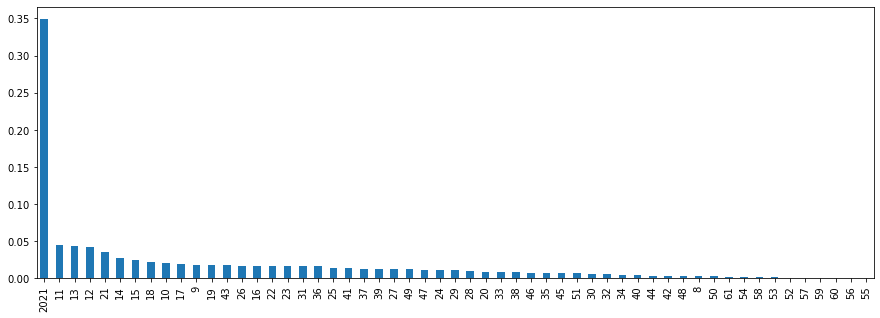

In [3261]:
#get 'age'
df['age'] = 2021 - df['construction_year'].map(int)

#get value count
print(df['age'].value_counts(normalize = True))

#visualize
df['age'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [3262]:
#more exploration
pd.DataFrame(df.groupby('status_group')['age'].value_counts(normalize = True))

age
status_group   age           
functional     2021  0.327196
               11    0.062711
               13    0.057007
               12    0.054992
               21    0.039648
...                       ...
non functional 57    0.001402
               59    0.000964
               60    0.000701
               55    0.000482
               56    0.000307

[164 rows x 1 columns]

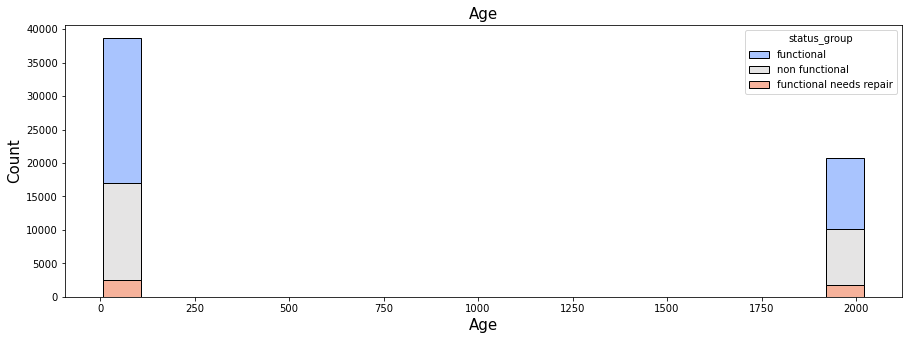

In [3263]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'age', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Age', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.savefig('./Data/age_histplot')

In [3264]:
#drop 'construction_year' because we don't need it anymore
df.drop(columns = 'construction_year', axis = 1, inplace = True)

## **'extraction_type'**
The kind of extraction the waterpoint uses

gravity                      0.450842
nira/tanira                  0.137273
other                        0.108249
submersible                  0.080202
swn 80                       0.061785
mono                         0.048232
india mark ii                0.040404
afridev                      0.029798
ksb                          0.023822
other - rope pump            0.007593
other - swn 81               0.003855
windmill                     0.001970
india mark iii               0.001650
cemo                         0.001515
other - play pump            0.001431
walimi                       0.000808
climax                       0.000539
other - mkulima/shinyanga    0.000034
Name: extraction_type, dtype: float64


<AxesSubplot:>

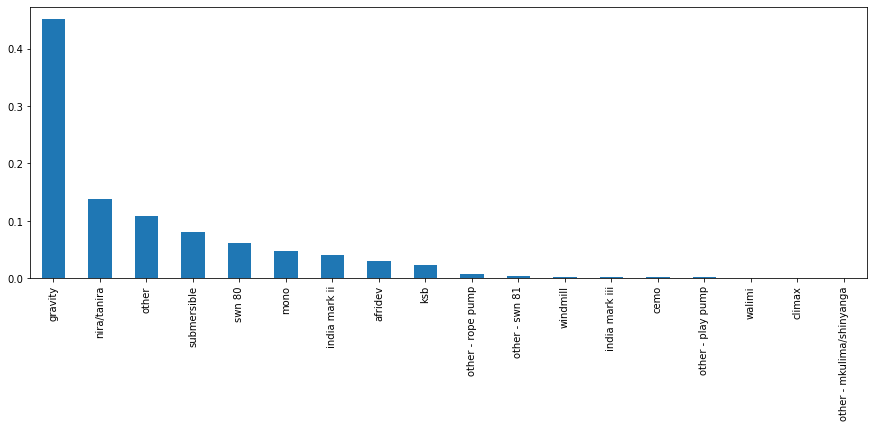

In [3265]:
#get value count
print(df['extraction_type'].value_counts(normalize = True))

#visualize
df['extraction_type'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [3266]:
#more exploration
pd.DataFrame(df.groupby('status_group')['extraction_type'].value_counts(normalize = True))

extraction_type
status_group            extraction_type                           
functional              gravity                           0.497474
                        nira/tanira                       0.168046
                        submersible                       0.081404
                        swn 80                            0.064788
                        india mark ii                     0.044887
                        afridev                           0.037199
                        mono                              0.033541
                        other                             0.031898
                        ksb                               0.021792
                        other - rope pump                 0.009083
                        other - swn 81                    0.003720
                        windmill                          0.001550
                        cemo                              0.001395
                        india mark iii                    0.001364
                        other - play pump                 0.000899
                        walimi                            0.000713
                        climax                            0.000248
functional needs repair gravity                           0.625666
                        nira/tanira                       0.148483
                        submersible                       0.052583
                        swn 80                            0.049108
                        other                             0.047718
                        mono                              0.029882
                        india mark ii                     0.018300
                        afridev                           0.009729
                        ksb                               0.006023
                        other - rope pump                 0.003938
                        walimi                            0.002780
                        cemo                              0.002085
                        other - swn 81                    0.001621
                        windmill                          0.001621
                        india mark iii                    0.000232
                        other - play pump                 0.000232
non functional          gravity                           0.351866
                        other                             0.227611
                        nira/tanira                       0.091658
                        submersible                       0.083728
                        mono                              0.072468
                        swn 80                            0.059937
                        india mark ii                     0.038249
                        ksb                               0.030056
                        afridev                           0.023134
                        other - rope pump                 0.006178
                        other - swn 81                    0.004469
                        windmill                          0.002629
                        other - play pump                 0.002410
                        india mark iii                    0.002322
                        cemo                              0.001577
                        climax                            0.001052
                        walimi                            0.000570
                        other - mkulima/shinyanga         0.000088

In [3267]:
#more exploration
pd.DataFrame(df.groupby('extraction_type')['status_group'].value_counts(normalize = True))

status_group
extraction_type           status_group                         
afridev                   functional                   0.677966
                          non functional               0.298305
                          functional needs repair      0.023729
cemo                      functional                   0.500000
                          non functional               0.400000
                          functional needs repair      0.100000
climax                    non functional               0.750000
                          functional                   0.250000
gravity                   functional                   0.599253
                          non functional               0.299888
                          functional needs repair      0.100859
india mark ii             functional                   0.603333
                          non functional               0.363750
                          functional needs repair      0.032917
india mark iii            non functional               0.540816
                          functional                   0.448980
                          functional needs repair      0.010204
ksb                       functional                   0.496820
                          non functional               0.484806
                          functional needs repair      0.018375
mono                      non functional               0.577312
                          functional                   0.377661
                          functional needs repair      0.045026
nira/tanira               functional                   0.664827
                          non functional               0.256561
                          functional needs repair      0.078612
other                     non functional               0.807932
                          functional                   0.160031
                          functional needs repair      0.032037
other - mkulima/shinyanga non functional               1.000000
other - play pump         non functional               0.647059
                          functional                   0.341176
                          functional needs repair      0.011765
other - rope pump         functional                   0.649667
                          non functional               0.312639
                          functional needs repair      0.037694
other - swn 81            functional                   0.524017
                          non functional               0.445415
                          functional needs repair      0.030568
submersible               functional                   0.551217
                          non functional               0.401134
                          functional needs repair      0.047649
swn 80                    functional                   0.569482
                          non functional               0.372752
                          functional needs repair      0.057766
walimi                    functional                   0.479167
                          non functional               0.270833
                          functional needs repair      0.250000
windmill                  non functional               0.512821
                          functional                   0.427350
                          functional needs repair      0.059829

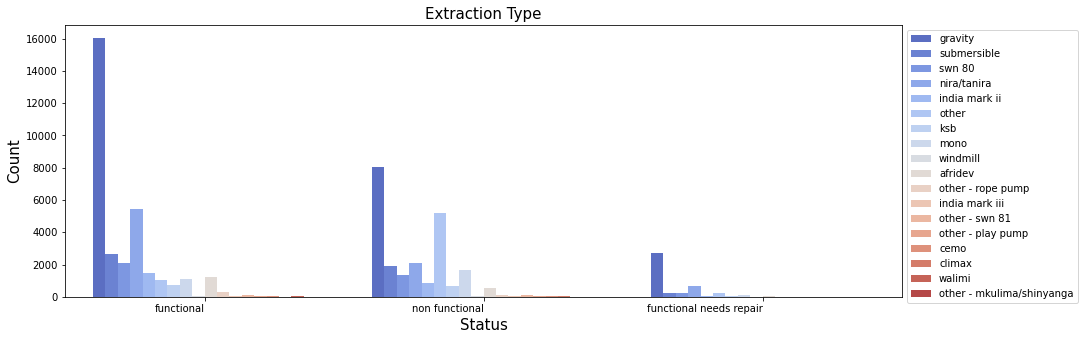

In [3268]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'extraction_type', data = df, palette = 'coolwarm')
plt.title('Extraction Type', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(bbox_to_anchor = (1, 1))
plt.savefig('./Data/extraction_type_countplot')

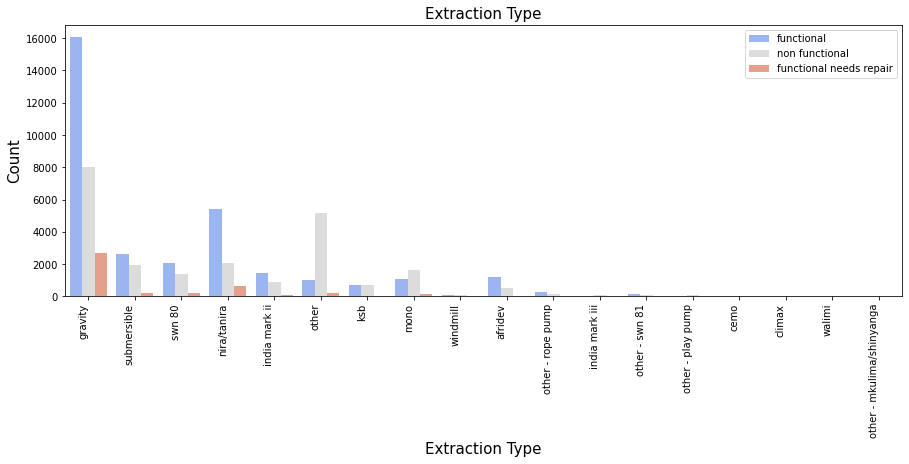

In [3269]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'extraction_type', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Extraction Type', fontsize = 15)
plt.xlabel('Extraction Type', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.legend(loc = 'upper right')
plt.savefig('./Data/extraction_type_countplot')

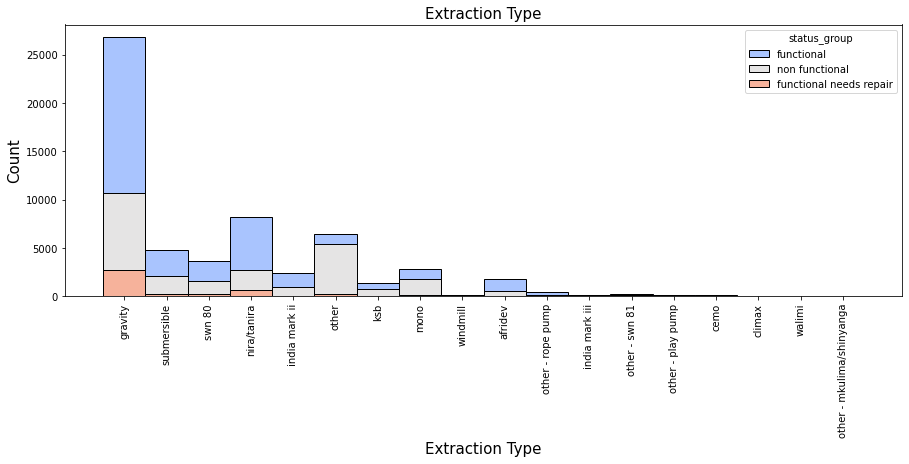

In [3270]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'extraction_type', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Extraction Type', fontsize = 15)
plt.xlabel('Extraction Type', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/extraction_type_histplot')

## **'extraction_type_group'**
The kind of extraction the waterpoint uses

gravity            0.450842
nira/tanira        0.137273
other              0.108249
submersible        0.104024
swn 80             0.061785
mono               0.048232
india mark ii      0.040404
afridev            0.029798
rope pump          0.007593
other handpump     0.006128
other motorpump    0.002054
wind-powered       0.001970
india mark iii     0.001650
Name: extraction_type_group, dtype: float64


<AxesSubplot:>

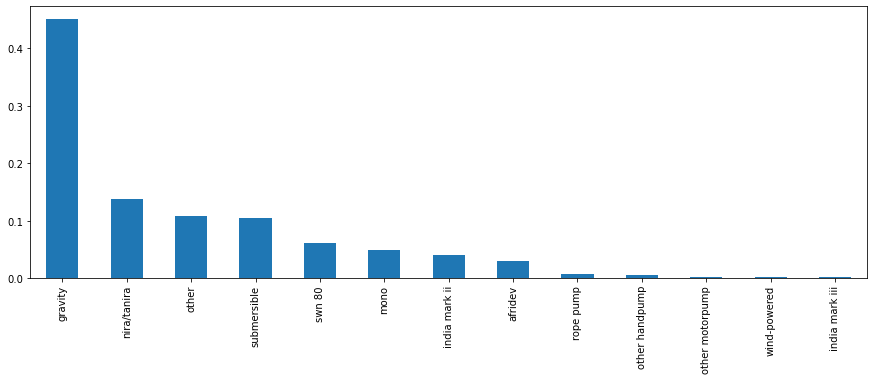

In [3271]:
#get value count
print(df['extraction_type_group'].value_counts(normalize = True))

#visualize
df['extraction_type_group'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [3272]:
#this column is redundant since it is similar to 'extraction_type', drop it
df.drop(columns = 'extraction_type_group', axis = 1, inplace = True)

## **'extraction_type_class'**
The kind of extraction the waterpoint uses

In [3273]:
#get value count
df['extraction_type_class'].value_counts(normalize = True)

gravity         0.450842
handpump        0.277037
other           0.108249
submersible     0.104024
motorpump       0.050286
rope pump       0.007593
wind-powered    0.001970
Name: extraction_type_class, dtype: float64

In [3274]:
#this column is redundant since it is similar to 'extraction_type', drop it
df.drop(columns = 'extraction_type_class', axis = 1, inplace = True)

## **'management_group'**
How the waterpoint is managed

user-group    0.883670
commercial    0.061246
parastatal    0.029764
other         0.015875
unknown       0.009444
Name: management_group, dtype: float64


<AxesSubplot:>

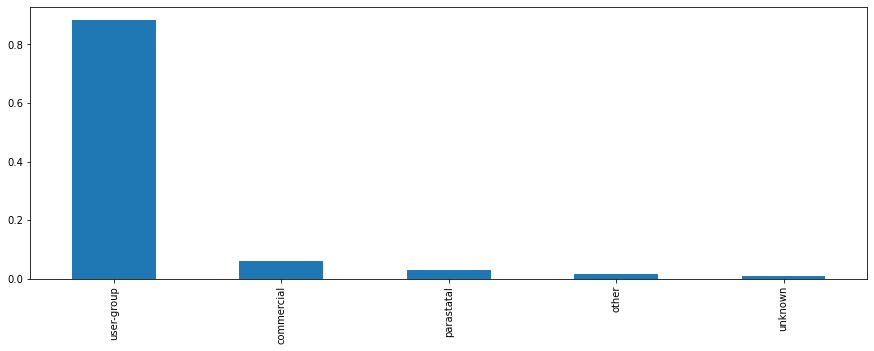

In [3275]:
#get value count
print(df['management_group'].value_counts(normalize = True))

#visualize
df['management_group'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [3276]:
#more exploration
pd.DataFrame(df.groupby('status_group')['management_group'].value_counts(normalize = True))

management_group
status_group            management_group                  
functional              user-group                0.875787
                        commercial                0.069283
                        parastatal                0.031619
                        other                     0.016368
                        unknown                   0.006944
functional needs repair user-group                0.904795
                        parastatal                0.048877
                        commercial                0.027102
                        other                     0.012972
                        unknown                   0.006254
non functional          user-group                0.890817
                        commercial                0.056344
                        parastatal                0.023528
                        other                     0.015729
                        unknown                   0.013582

In [3277]:
#more exploration
pd.DataFrame(df.groupby('management_group')['status_group'].value_counts(normalize = True))

status_group
management_group status_group                         
commercial       functional                   0.614349
                 non functional               0.353491
                 functional needs repair      0.032161
other            functional                   0.559915
                 non functional               0.380700
                 functional needs repair      0.059385
parastatal       functional                   0.576923
                 non functional               0.303733
                 functional needs repair      0.119344
unknown          non functional               0.552585
                 functional                   0.399287
                 functional needs repair      0.048128
user-group       functional                   0.538236
                 non functional               0.387350
                 functional needs repair      0.074414

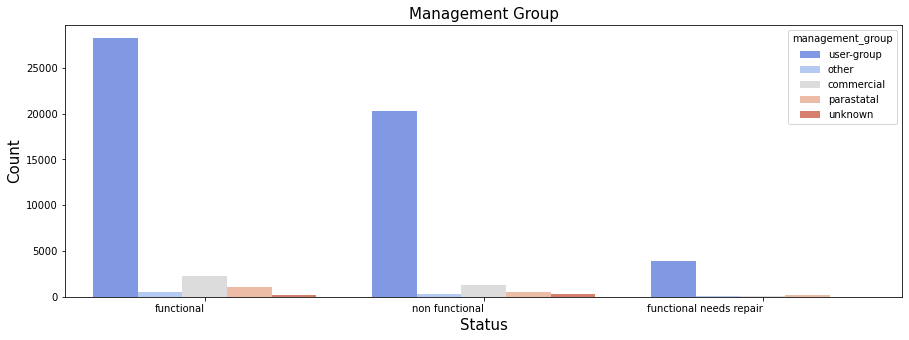

In [3278]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'management_group', data = df, palette = 'coolwarm')
plt.title('Management Group', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.savefig('./Data/management_group_countplot')

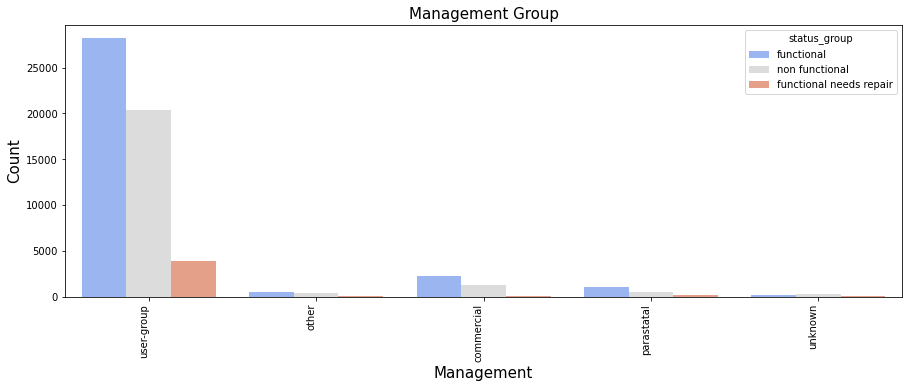

In [3281]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'management_group', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Management Group', fontsize = 15)
plt.xlabel('Management', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.savefig('./Data/management_group_countplot')

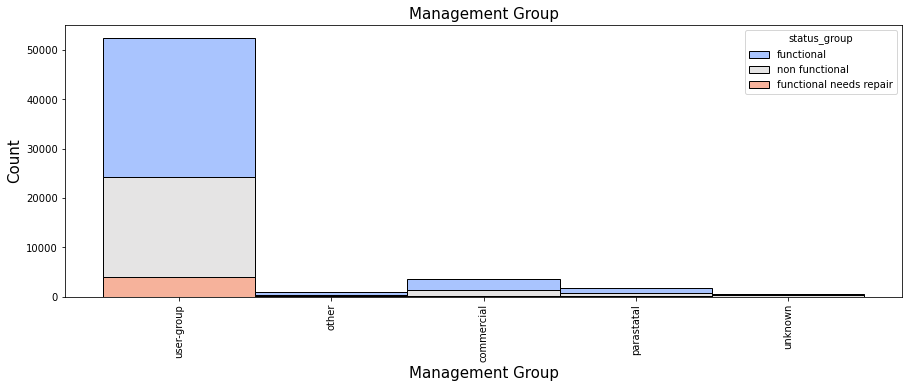

In [3282]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'management_group', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Management Group', fontsize = 15)
plt.xlabel('Management Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/management_group_histplot')

## **'management'**
How the waterpoint is managed

In [3283]:
#get value count
df['management'].value_counts(normalize = True)

vwc                 0.681936
wug                 0.109680
water board         0.049377
wua                 0.042677
private operator    0.033182
parastatal          0.029764
water authority     0.015219
other               0.014209
company             0.011532
unknown             0.009444
other - school      0.001667
trust               0.001313
Name: management, dtype: float64

In [3284]:
#'management' and 'management_group' have the same name, they might be sub-group of each other, let's group them together
df.groupby(['management_group', 'management']).count()

id  status_group  amount_tsh  funder  \
management_group management                                                  
commercial       company             685           685         685     685   
                 private operator   1971          1971        1971    1971   
                 trust                78            78          78      78   
                 water authority     904           904         904     904   
other            other               844           844         844     844   
                 other - school       99            99          99      99   
parastatal       parastatal         1768          1768        1768    1768   
unknown          unknown             561           561         561     561   
user-group       vwc               40507         40507       40507   40507   
                 water board        2933          2933        2933    2933   
                 wua                2535          2535        2535    2535   
                 wug                6515          6515        6515    6515   

                                   gps_height  installer  longitude  latitude  \
management_group management                                                     
commercial       company                  685        685        685       685   
                 private operator        1971       1971       1971      1971   
                 trust                     78         78         78        78   
                 water authority          904        904        904       904   
other            other                    844        844        844       844   
                 other - school            99         99         99        99   
parastatal       parastatal              1768       1768       1768      1768   
unknown          unknown                  561        561        561       561   
user-group       vwc                    40507      40507      40507     40507   
                 water board             2933       2933       2933      2933   
                 wua                     2535       2535       2535      2535   
                 wug                     6515       6515       6515      6515   

                                   wpt_name  basin  ...  \
management_group management                         ...   
commercial       company                685    685  ...   
                 private operator      1971   1971  ...   
                 trust                   78     78  ...   
                 water authority        904    904  ...   
other            other                  844    844  ...   
                 other - school          99     99  ...   
parastatal       parastatal            1768   1768  ...   
unknown          unknown                561    561  ...   
user-group       vwc                  40507  40507  ...   
                 water board           2933   2933  ...   
                 wua                   2535   2535  ...   
                 wug                   6515   6515  ...   

                                   waterpoint_type_group  year_recorded  \
management_group management                                               
commercial       company                             685            685   
                 private operator                   1971           1971   
                 trust                                78             78   
                 water authority                     904            904   
other            other                               844            844   
                 other - school                       99             99   
parastatal       parastatal                         1768           1768   
unknown          unknown                             561            561   
user-group       vwc                               40507          40507   
                 water board                        2933           2933   
                 wua                                2535           2535   
        

In [3285]:
#'management_group' is just a bigger container of 'management' , drop 'management'
df.drop(columns = 'management', axis = 1, inplace = True)

## **'payment'**
What the water costs

never pay                0.426734
pay per bucket           0.151263
pay monthly              0.139731
unknown                  0.137323
pay when scheme fails    0.065892
pay annually             0.061313
other                    0.017744
Name: payment, dtype: float64


<AxesSubplot:>

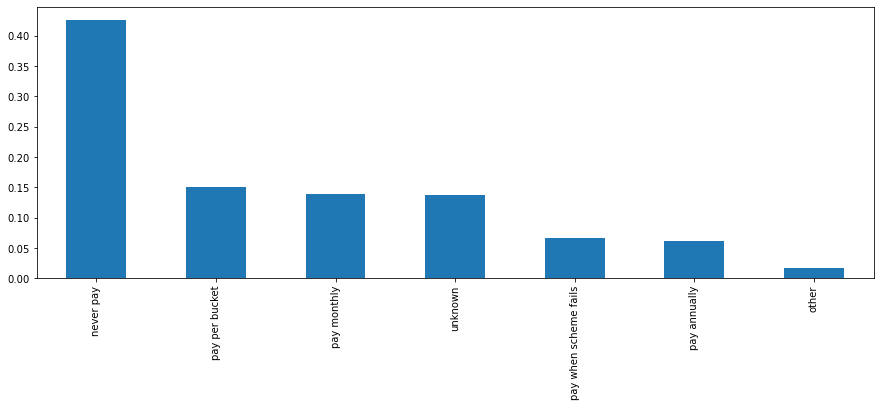

In [3286]:
#get value count
print(df['payment'].value_counts(normalize = True))

#visualize
df['payment'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [3287]:
#more exploration
pd.DataFrame(df.groupby('status_group')['payment'].value_counts(normalize = True))

payment
status_group            payment                        
functional              never pay              0.352739
                        pay per bucket         0.188785
                        pay monthly            0.169937
                        unknown                0.109365
                        pay annually           0.084938
                        pay when scheme fails  0.075297
                        other                  0.018940
functional needs repair never pay              0.441742
                        pay monthly            0.214732
                        unknown                0.100069
                        pay per bucket         0.094742
                        pay when scheme fails  0.064165
                        pay annually           0.057216
                        other                  0.027334
non functional          never pay              0.528479
                        unknown                0.183885
                        pay per bucket         0.108920
                        pay monthly            0.082851
                        pay when scheme fails  0.052927
                        pay annually           0.028698
                        other                  0.014239

In [3288]:
#more exploration
pd.DataFrame(df.groupby('payment')['status_group'].value_counts(normalize = True))

status_group
payment               status_group                         
never pay             non functional               0.475856
                      functional                   0.448911
                      functional needs repair      0.075233
other                 functional                   0.579696
                      non functional               0.308349
                      functional needs repair      0.111954
pay annually          functional                   0.752334
                      non functional               0.179846
                      functional needs repair      0.067820
pay monthly           functional                   0.660482
                      non functional               0.227831
                      functional needs repair      0.111687
pay per bucket        functional                   0.677796
                      non functional               0.276683
                      functional needs repair      0.045520
pay when scheme fails functional                   0.620593
                      non functional               0.308636
                      functional needs repair      0.070772
unknown               non functional               0.514527
                      functional                   0.432512
                      functional needs repair      0.052961

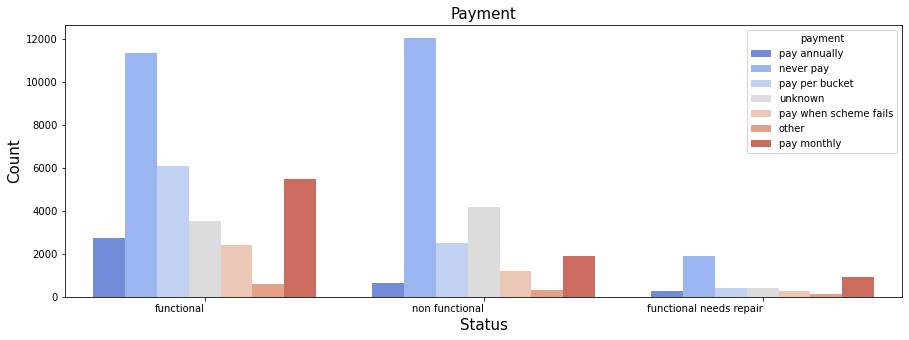

In [3289]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'payment', data = df, palette = 'coolwarm')
plt.title('Payment', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.savefig('./Data/payment_countplot')

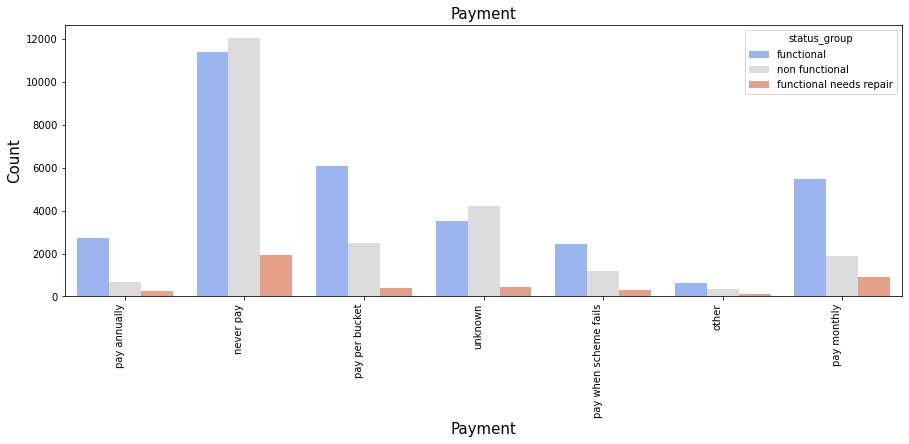

In [3290]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'payment', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Payment', fontsize = 15)
plt.xlabel('Payment', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.savefig('./Data/payment_countplot')

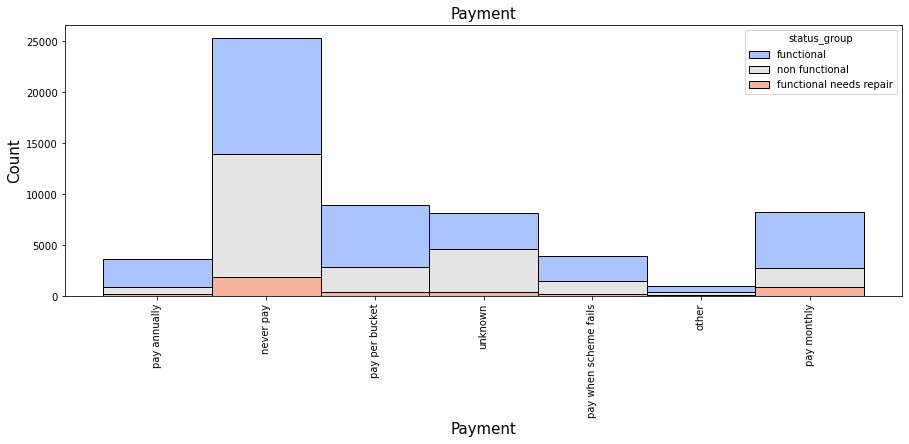

In [3291]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'payment', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Payment', fontsize = 15)
plt.xlabel('Payment', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/payment_histplot')

## **'payment_type'**
What the water costs

In [3292]:
#get value counts
df['payment_type'].value_counts(normalize = True)

never pay     0.426734
per bucket    0.151263
monthly       0.139731
unknown       0.137323
on failure    0.065892
annually      0.061313
other         0.017744
Name: payment_type, dtype: float64

In [3293]:
#this column is redundant since it is similar to 'payment', drop it, drop it
df.drop(columns = 'payment_type', axis = 1, inplace = True)

## **'water_quality'**
The quality of the water

soft                  0.855522
salty                 0.081751
unknown               0.031582
milky                 0.013535
coloured              0.008249
salty abandoned       0.005707
fluoride              0.003367
fluoride abandoned    0.000286
Name: water_quality, dtype: float64


<AxesSubplot:>

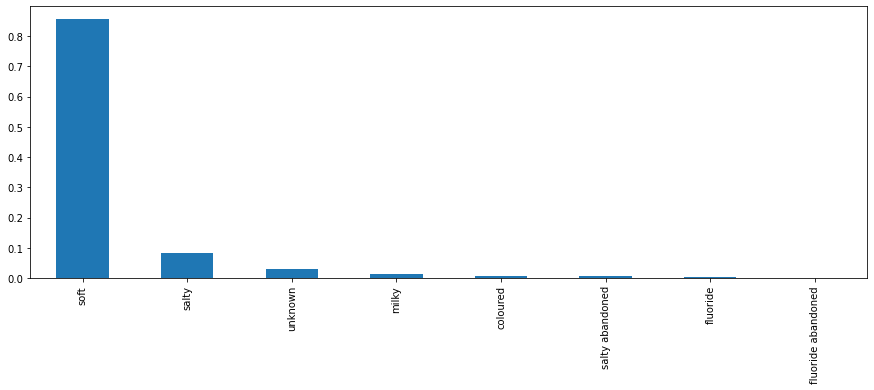

In [3294]:
#get value count
print(df['water_quality'].value_counts(normalize = True))

#visualize
df['water_quality'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [3295]:
#more exploration
pd.DataFrame(df.groupby('status_group')['water_quality'].value_counts(normalize = True))

water_quality
status_group            water_quality                    
functional              soft                     0.891534
                        salty                    0.068818
                        milky                    0.013578
                        unknown                  0.008184
                        coloured                 0.007626
                        salty abandoned          0.005394
                        fluoride                 0.004681
                        fluoride abandoned       0.000186
functional needs repair soft                     0.904332
                        salty                    0.052120
                        salty abandoned          0.016678
                        coloured                 0.012509
                        unknown                  0.008107
                        milky                    0.003243
                        fluoride                 0.003011
non functional          soft                     0.795391
                        salty                    0.105634
                        unknown                  0.069094
                        milky                    0.015422
                        coloured                 0.008325
                        salty abandoned          0.004075
                        fluoride                 0.001577
                        fluoride abandoned       0.000482

In [3296]:
#more exploration
pd.DataFrame(df.groupby('water_quality')['status_group'].value_counts(normalize = True))

status_group
water_quality      status_group                         
coloured           functional                   0.502041
                   non functional               0.387755
                   functional needs repair      0.110204
fluoride           functional                   0.755000
                   non functional               0.180000
                   functional needs repair      0.065000
fluoride abandoned non functional               0.647059
                   functional                   0.352941
milky              functional                   0.544776
                   non functional               0.437811
                   functional needs repair      0.017413
salty              non functional               0.496499
                   functional                   0.457166
                   functional needs repair      0.046334
salty abandoned    functional                   0.513274
                   non functional               0.274336
                   functional needs repair      0.212389
soft               functional                   0.565941
                   non functional               0.357236
                   functional needs repair      0.076823
unknown            non functional               0.840618
                   functional                   0.140725
                   functional needs repair      0.018657

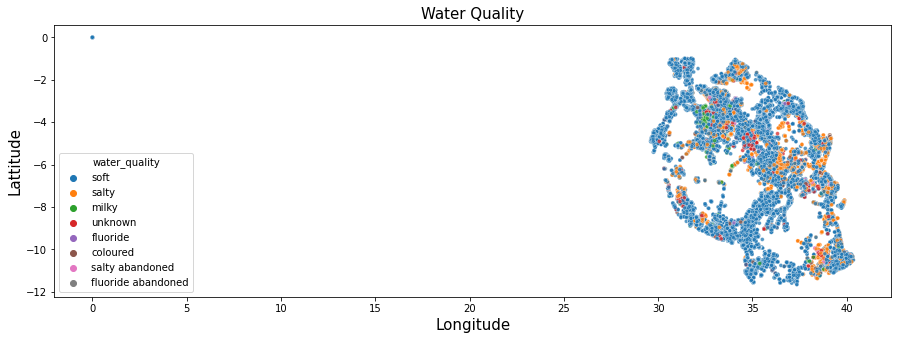

<Figure size 432x288 with 0 Axes>

In [3297]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'water_quality', data = df, alpha = 0.75, s = 15)
plt.title('Water Quality', fontsize = 15)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Lattitude', fontsize = 15)
plt.show()
plt.savefig('./Data/water_quality_scatterplot')

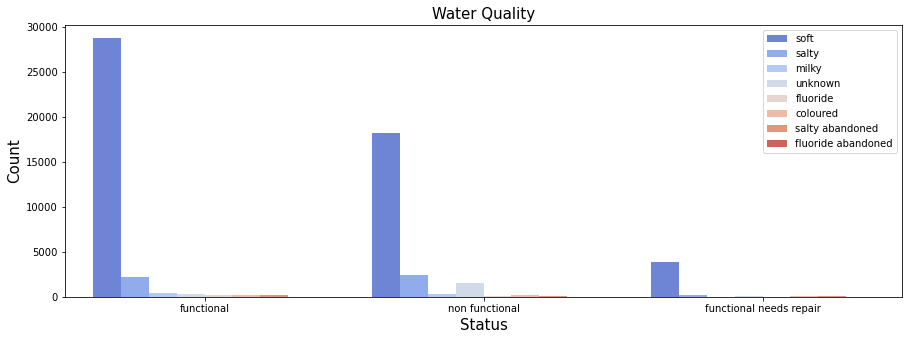

In [3298]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'water_quality', data = df, palette = 'coolwarm')
plt.title('Water Quality', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(loc = 'upper right')
plt.savefig('./Data/water_quality_countplot')

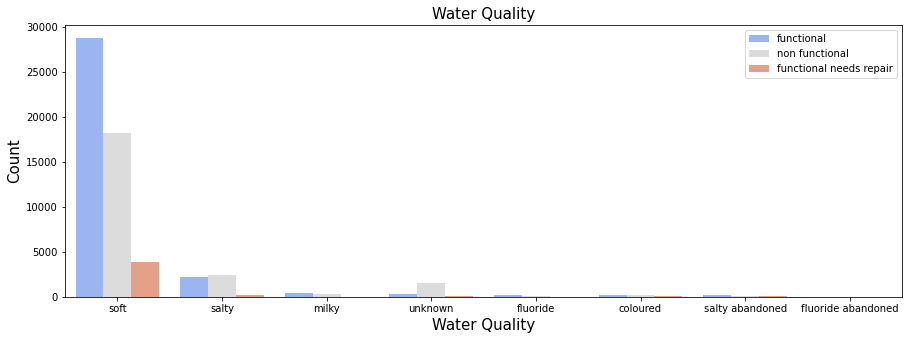

In [3299]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'water_quality', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Water Quality', fontsize = 15)
plt.xlabel('Water Quality', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(loc = 'upper right')
plt.savefig('./Data/water_quality_countplot')

No handles with labels found to put in legend.


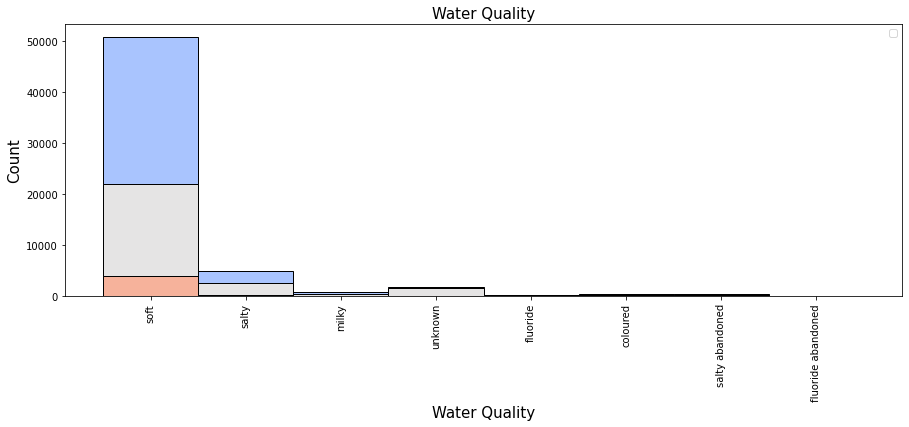

In [3300]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'water_quality', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Water Quality', fontsize = 15)
plt.xlabel('Water Quality', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(loc = 'upper right')
plt.xticks(rotation = 90)
plt.savefig('./Data/water_quality_histplot')

## **'quality_group'**
The quality of the water

In [3301]:
#get value count
print(df['quality_group'].value_counts(normalize = True))

#this column is redundant since it is similar to 'water_quality', drop it
df.drop(columns = 'quality_group', axis = 1, inplace = True)

good        0.855522
salty       0.087458
unknown     0.031582
milky       0.013535
colored     0.008249
fluoride    0.003653
Name: quality_group, dtype: float64


## **'quantity'**
The quantity of water

enough          0.558687
insufficient    0.254697
dry             0.105152
seasonal        0.068182
unknown         0.013283
Name: quantity, dtype: float64


<AxesSubplot:>

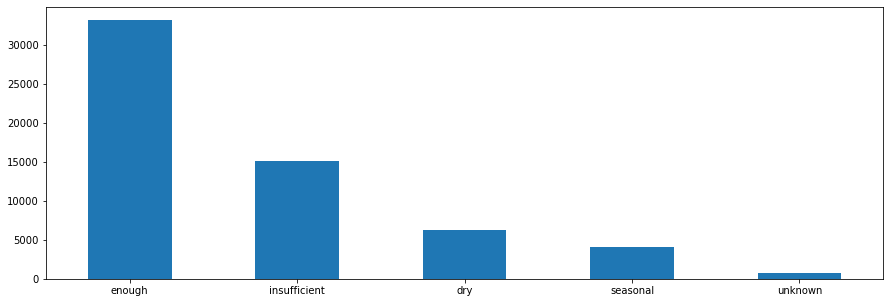

In [3302]:
#get value count
print(df['quantity'].value_counts(normalize = True))

#visualize
df['quantity'].value_counts().plot.bar(figsize = (15, 5), rot = 0)

In [3303]:
#more exploration
pd.DataFrame(df.groupby('status_group')['quantity'].value_counts(normalize = True))

quantity
status_group            quantity              
functional              enough        0.671069
                        insufficient  0.245389
                        seasonal      0.072073
                        unknown       0.006603
                        dry           0.004867
functional needs repair enough        0.555942
                        insufficient  0.335881
                        seasonal      0.096363
                        dry           0.008571
                        unknown       0.003243
non functional          enough        0.400368
                        dry           0.265159
                        insufficient  0.252497
                        seasonal      0.057352
                        unknown       0.024623

In [3304]:
#more exploration
pd.DataFrame(df.groupby('quantity')['status_group'].value_counts(normalize = True))

status_group
quantity     status_group                         
dry          non functional               0.968940
             functional                   0.025136
             functional needs repair      0.005924
enough       functional                   0.652323
             non functional               0.275357
             functional needs repair      0.072320
insufficient functional                   0.523234
             non functional               0.380924
             functional needs repair      0.095842
seasonal     functional                   0.574074
             non functional               0.323210
             functional needs repair      0.102716
unknown      non functional               0.712294
             functional                   0.269962
             functional needs repair      0.017744

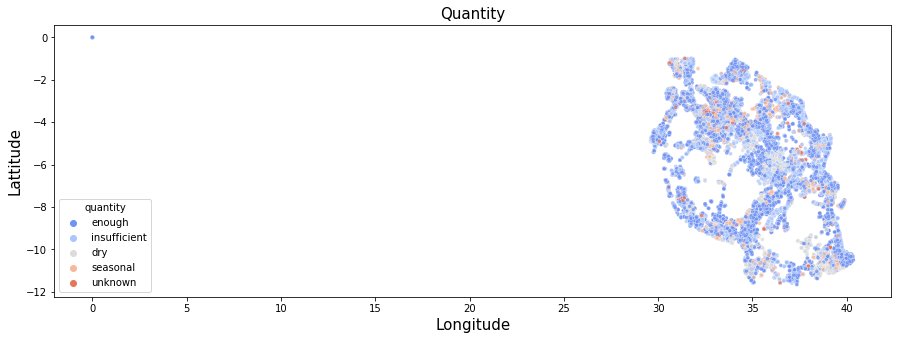

<Figure size 432x288 with 0 Axes>

In [3305]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'quantity', data = df, alpha = 0.75, s = 15, palette = 'coolwarm')
plt.title('Quantity', fontsize = 15)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Lattitude', fontsize = 15)
plt.show()
plt.savefig('./Data/quantity_scatterplot')

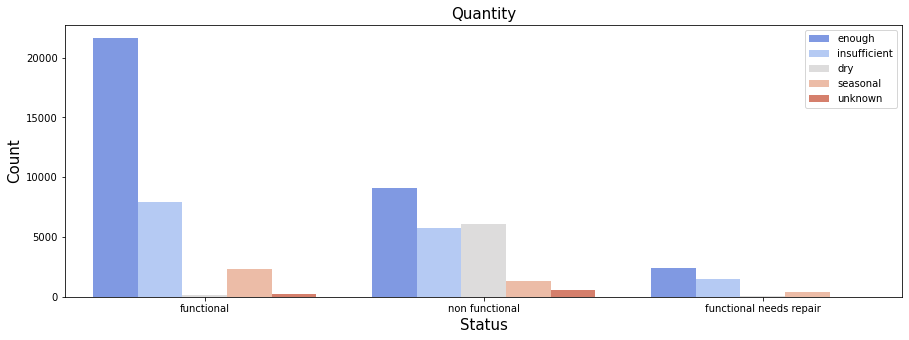

In [3306]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'quantity', data = df, palette = 'coolwarm')
plt.title('Quantity', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(loc = 'upper right')
plt.savefig('./Data/quantity_countplot')

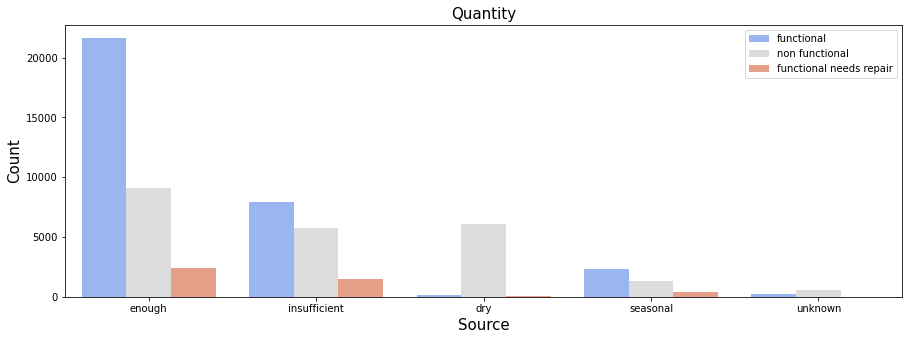

In [3307]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'quantity', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Quantity', fontsize = 15)
plt.xlabel('Source', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(loc = 'upper right')
plt.savefig('./Data/quantity_countplot')

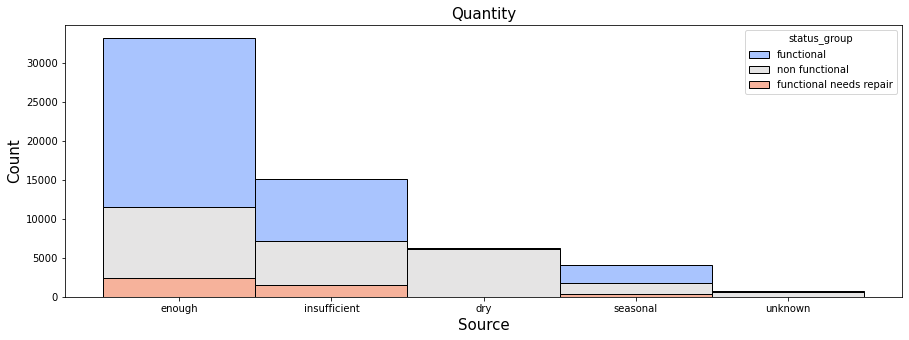

In [3308]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'quantity', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Quantity', fontsize = 15)
plt.xlabel('Source', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.savefig('./Data/quantity_histplot')

## **'quantity_group'**
The quantity of water

In [3309]:
#get value count
print(df['quantity_group'].value_counts(normalize = True))

#this column is redundant since it is similar to 'quantity', drop it
df.drop(columns = 'quantity_group', axis = 1, inplace = True)

enough          0.558687
insufficient    0.254697
dry             0.105152
seasonal        0.068182
unknown         0.013283
Name: quantity_group, dtype: float64


## **'source'**
The source of the water

spring                  0.286549
shallow well            0.283232
machine dbh             0.186448
river                   0.161818
rainwater harvesting    0.038636
hand dtw                0.014714
lake                    0.012879
dam                     0.011044
other                   0.003569
unknown                 0.001111
Name: source, dtype: float64


<AxesSubplot:>

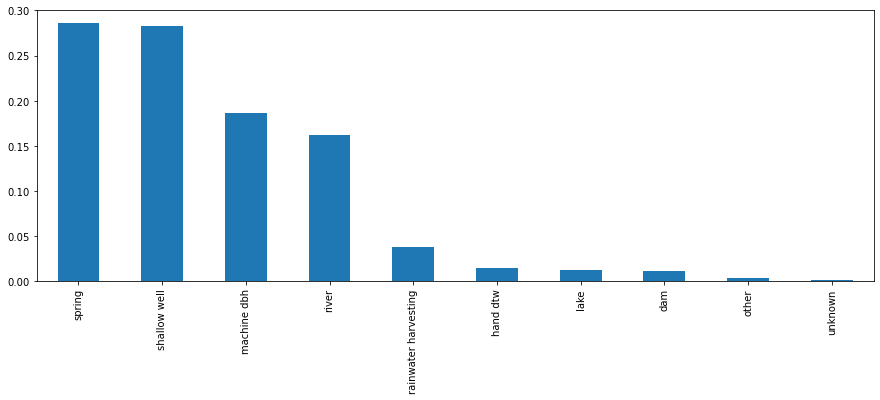

In [3310]:
#get value count
print(df['source'].value_counts(normalize = True))

#visualize
df['source'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [3311]:
#more exploration
pd.DataFrame(df.groupby('status_group')['source'].value_counts(normalize = True))

source
status_group            source                        
functional              spring                0.328342
                        shallow well          0.258037
                        river                 0.169410
                        machine dbh           0.168077
                        rainwater harvesting  0.042965
                        hand dtw              0.015407
                        dam                   0.007843
                        lake                  0.005022
                        other                 0.003906
                        unknown               0.000992
functional needs repair spring                0.295576
                        river                 0.282835
                        shallow well          0.221682
                        machine dbh           0.113736
                        rainwater harvesting  0.072736
                        dam                   0.005559
                        hand dtw              0.003938
                        lake                  0.002780
                        unknown               0.000927
                        other                 0.000232
non functional          shallow well          0.330485
                        machine dbh           0.226165
                        spring                0.225771
                        river                 0.128198
                        rainwater harvesting  0.026069
                        lake                  0.025894
                        dam                   0.016605
                        hand dtw              0.015773
                        other                 0.003724
                        unknown               0.001314

In [3312]:
#more exploration
pd.DataFrame(df.groupby('source')['status_group'].value_counts(normalize = True))

status_group
source               status_group                         
dam                  non functional               0.577744
                     functional                   0.385671
                     functional needs repair      0.036585
hand dtw             functional                   0.568650
                     non functional               0.411899
                     functional needs repair      0.019451
lake                 non functional               0.772549
                     functional                   0.211765
                     functional needs repair      0.015686
machine dbh          functional                   0.489571
                     non functional               0.466095
                     functional needs repair      0.044334
other                functional                   0.594340
                     non functional               0.400943
                     functional needs repair      0.004717
rainwater harvesting functional                   0.603922
                     non functional               0.259259
                     functional needs repair      0.136819
river                functional                   0.568560
                     non functional               0.304411
                     functional needs repair      0.127029
shallow well         functional                   0.494769
                     non functional               0.448348
                     functional needs repair      0.056883
spring               functional                   0.622290
                     non functional               0.302744
                     functional needs repair      0.074966
unknown              functional                   0.484848
                     non functional               0.454545
                     functional needs repair      0.060606

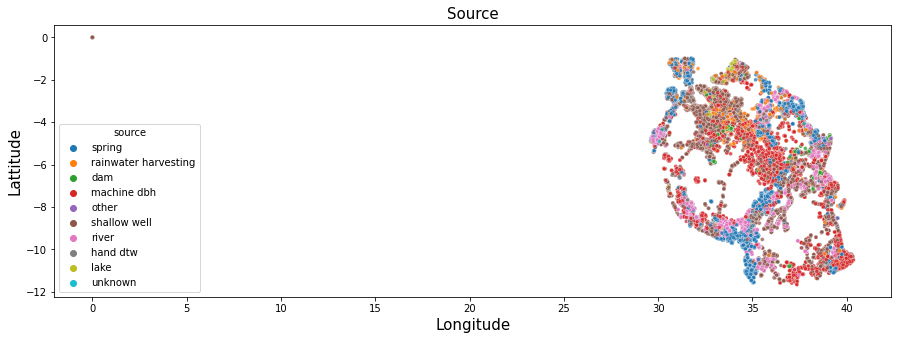

<Figure size 432x288 with 0 Axes>

In [3313]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'source', data = df, alpha = 0.75, s = 15)
plt.title('Source', fontsize = 15)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Lattitude', fontsize = 15)
plt.show()
plt.savefig('./Data/source_scatterplot')

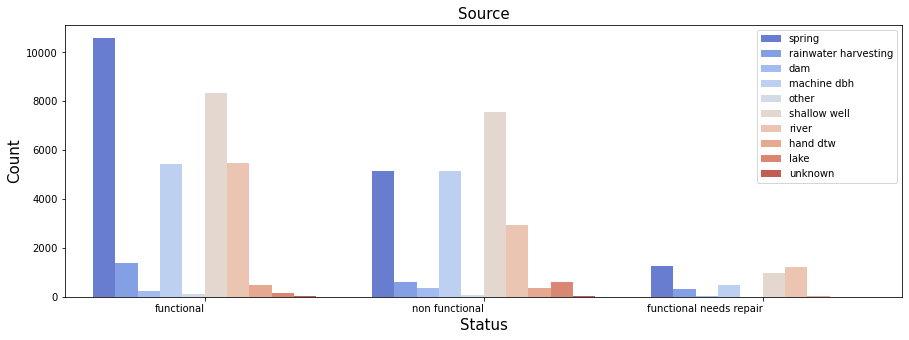

In [3314]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'source', data = df, palette = 'coolwarm')
plt.title('Source', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(loc = 'upper right')
plt.savefig('./Data/source_countplot')

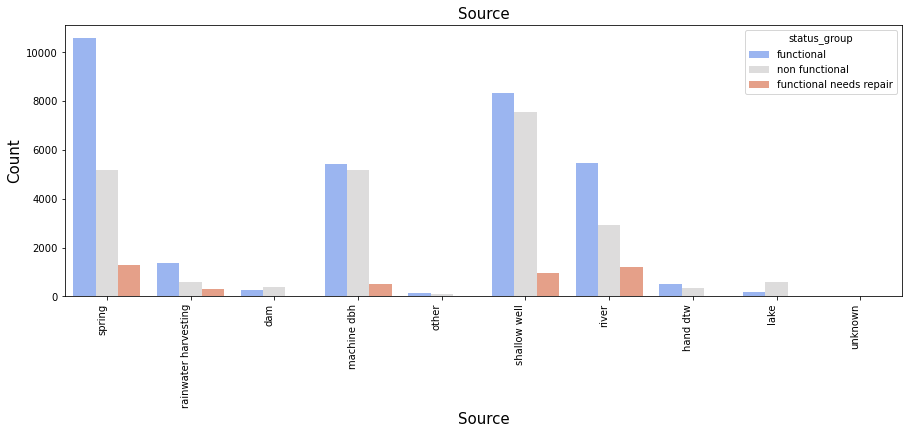

In [3315]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'source', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Source', fontsize = 15)
plt.xlabel('Source', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.savefig('./Data/source_countplot')

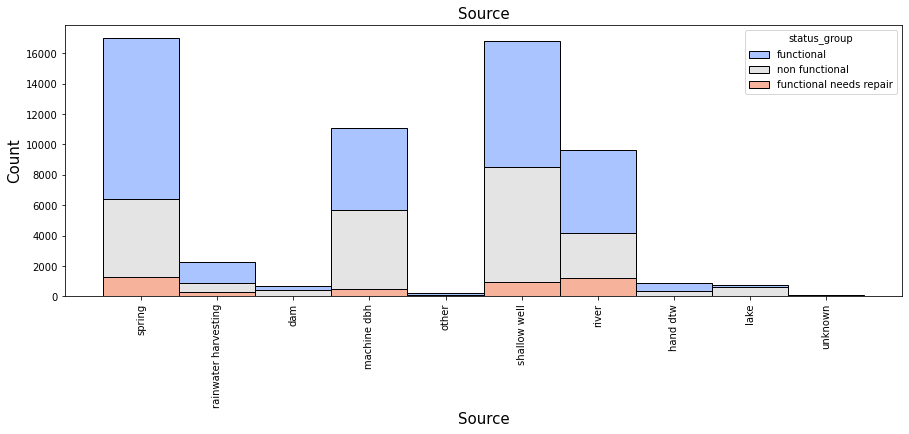

In [3316]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'source', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Source', fontsize = 15)
plt.xlabel('Source', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/source_histplot')

## **'source_type'**
The source of the water

In [3317]:
#get value count
print(df['source_type'].value_counts(normalize = True))

#this column is redundant since it is similar to 'source', drop it
df.drop(columns = 'source_type', axis = 1, inplace = True)

spring                  0.286549
shallow well            0.283232
borehole                0.201162
river/lake              0.174697
rainwater harvesting    0.038636
dam                     0.011044
other                   0.004680
Name: source_type, dtype: float64


## **'source_class'**
The source of the water

groundwater    0.770943
surface        0.224377
unknown        0.004680
Name: source_class, dtype: float64


<AxesSubplot:>

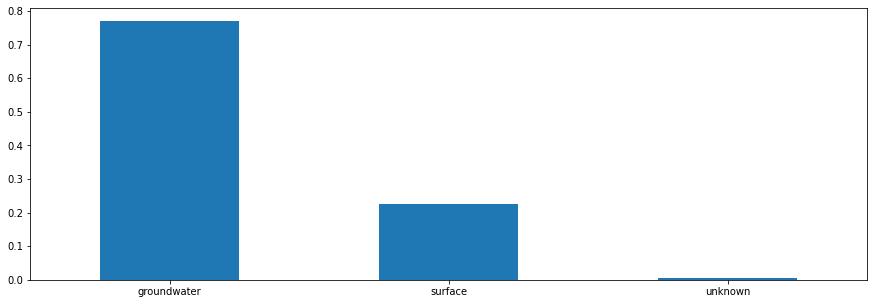

In [3318]:
#get value count
print(df['source_class'].value_counts(normalize = True))

#visualize
df['source_class'].value_counts(normalize = True).plot.bar(figsize = (15, 5), rot = 0)

In [3319]:
#more exploration
pd.DataFrame(df.groupby('status_group')['source_class'].value_counts(normalize = True))

source_class
status_group            source_class              
functional              groundwater       0.769863
                        surface           0.225239
                        unknown           0.004898
functional needs repair groundwater       0.634932
                        surface           0.363910
                        unknown           0.001158
non functional          groundwater       0.798195
                        surface           0.196767
                        unknown           0.005039

In [3320]:
#more exploration
pd.DataFrame(df.groupby('source_class')['status_group'].value_counts(normalize = True))

status_group
source_class status_group                         
groundwater  functional                   0.542320
             non functional               0.397825
             functional needs repair      0.059855
surface      functional                   0.545168
             non functional               0.336960
             functional needs repair      0.117872
unknown      functional                   0.568345
             non functional               0.413669
             functional needs repair      0.017986

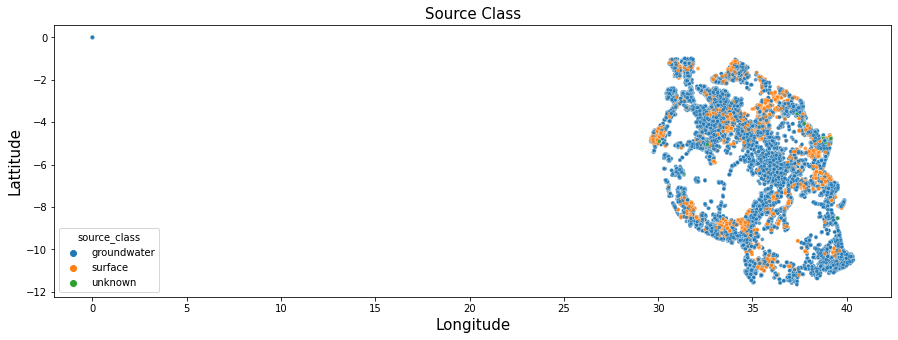

<Figure size 432x288 with 0 Axes>

In [3321]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'source_class', data = df, alpha = 0.75, s = 15)
plt.title('Source Class', fontsize = 15)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Lattitude', fontsize = 15)
plt.show()
plt.savefig('./Data/source_class_scatterplot')

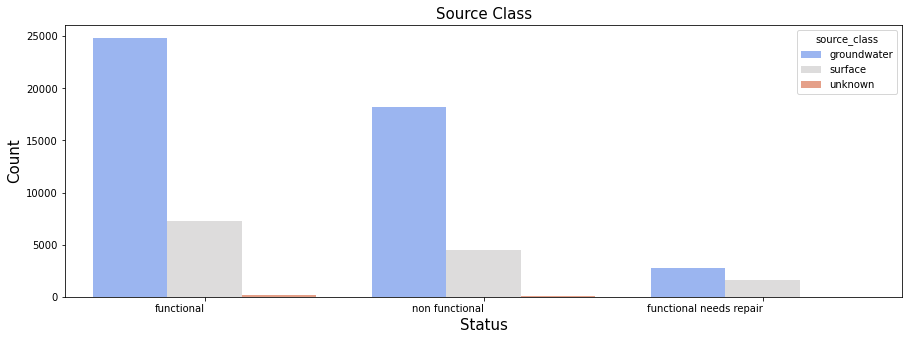

In [3322]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'source_class', data = df, palette = 'coolwarm')
plt.title('Source Class', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.savefig('./Data/waterpoint_type_countplot')

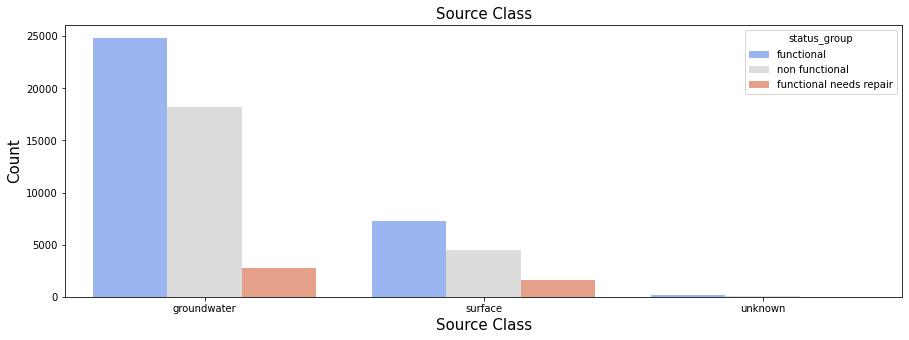

In [3323]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'source_class', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Source Class', fontsize = 15)
plt.xlabel('Source Class', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.savefig('./Data/source_class_countplot')

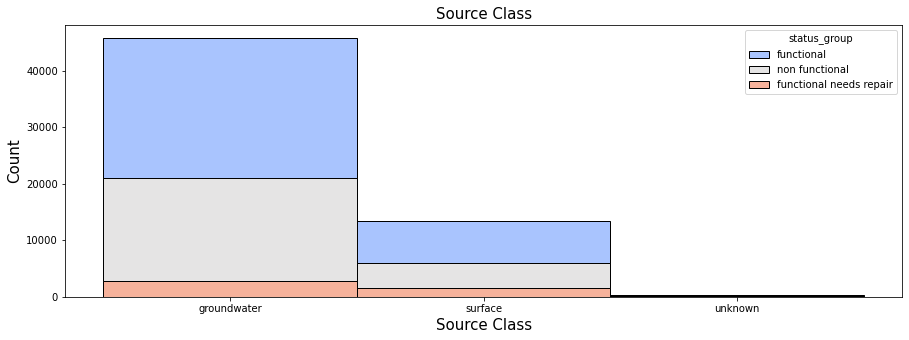

In [3324]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'source_class', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Source Class', fontsize = 15)
plt.xlabel('Source Class', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.savefig('./Data/source_class_histplot')

## **'waterpoint_type'**
The kind of waterpoint

communal standpipe             0.480168
hand pump                      0.294411
other                          0.107407
communal standpipe multiple    0.102744
improved spring                0.013199
cattle trough                  0.001953
dam                            0.000118
Name: waterpoint_type, dtype: float64


<AxesSubplot:>

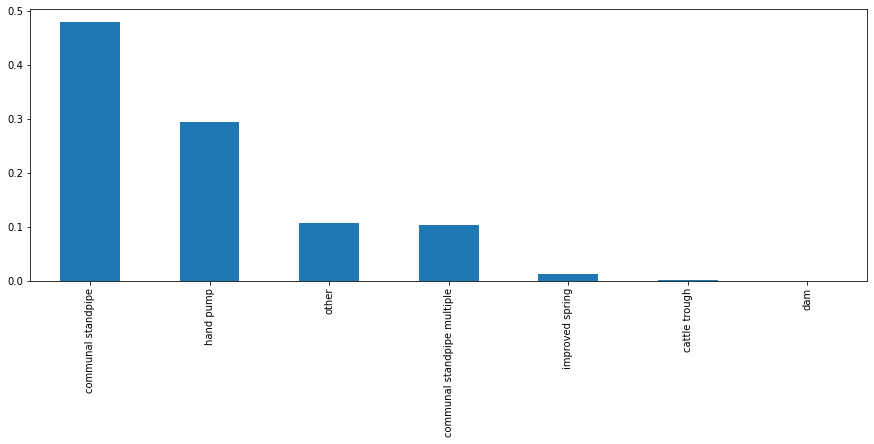

In [3325]:
#get value count
print(df['waterpoint_type'].value_counts(normalize = True))

#visualize
df['waterpoint_type'].value_counts(normalize = True).plot.bar(figsize = (15, 5))

In [3326]:
#more exploration
pd.DataFrame(df.groupby('source_class')['waterpoint_type'].value_counts(normalize = True))

waterpoint_type
source_class waterpoint_type                             
groundwater  communal standpipe                  0.389745
             hand pump                           0.376862
             other                               0.126348
             communal standpipe multiple         0.088745
             improved spring                     0.016945
             cattle trough                       0.001332
             dam                                 0.000022
surface      communal standpipe                  0.791717
             communal standpipe multiple         0.151035
             other                               0.038640
             hand pump                           0.013956
             cattle trough                       0.003827
             dam                                 0.000450
             improved spring                     0.000375
unknown      communal standpipe                  0.438849
             other                               0.284173
             hand pump                           0.158273
             communal standpipe multiple         0.093525
             cattle trough                       0.014388
             improved spring                     0.010791

In [3327]:
#more exploration
pd.DataFrame(df.groupby('waterpoint_type')['source_class'].value_counts(normalize = True))

source_class
waterpoint_type             source_class              
cattle trough               groundwater       0.525862
                            surface           0.439655
                            unknown           0.034483
communal standpipe          groundwater       0.625763
                            surface           0.369960
                            unknown           0.004277
communal standpipe multiple groundwater       0.665902
                            surface           0.329838
                            unknown           0.004260
dam                         surface           0.857143
                            groundwater       0.142857
hand pump                   groundwater       0.986848
                            surface           0.010636
                            unknown           0.002516
improved spring             groundwater       0.989796
                            surface           0.006378
                            unknown           0.003827
other                       groundwater       0.906897
                            surface           0.080721
                            unknown           0.012382

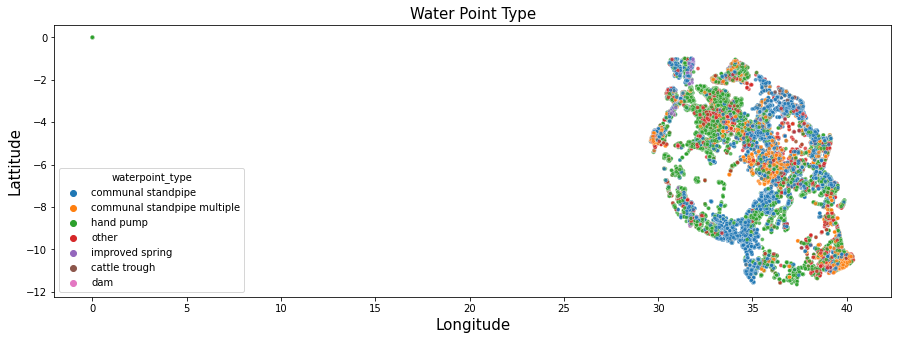

<Figure size 432x288 with 0 Axes>

In [3328]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'waterpoint_type', data = df, alpha = 0.75, s = 15)
plt.title('Water Point Type', fontsize = 15)
plt.xlabel('Longitude', fontsize = 15)
plt.ylabel('Lattitude', fontsize = 15)
plt.show()
plt.savefig('./Data/waterpoint_type_scatterplot')

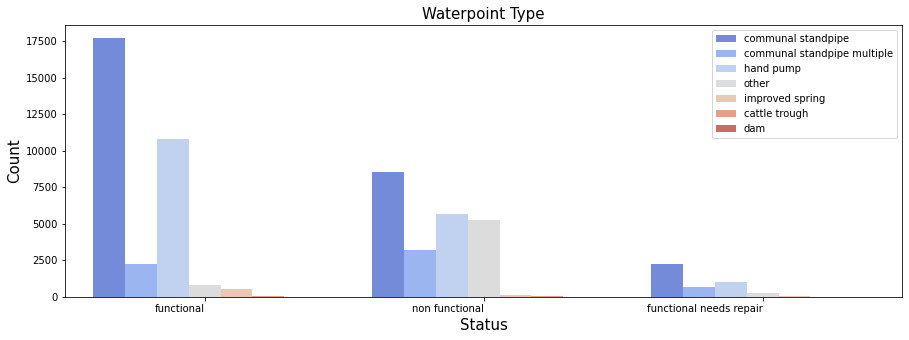

In [3329]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', hue = 'waterpoint_type', data = df, palette = 'coolwarm')
plt.title('Waterpoint Type', fontsize = 15)
plt.xlabel('Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right')
plt.legend(loc = 'upper right')
plt.savefig('./Data/waterpoint_type_countplot')

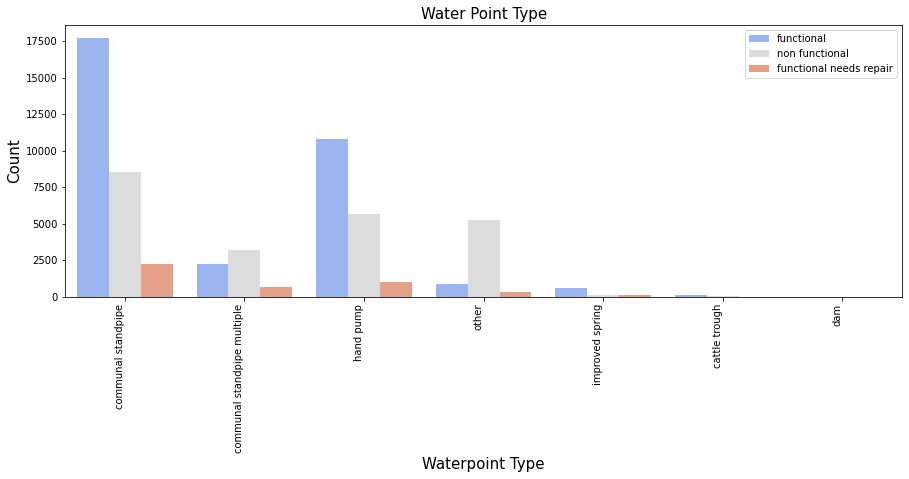

In [3344]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'waterpoint_type', hue = 'status_group', data = df, palette = 'coolwarm')
plt.title('Water Point Type', fontsize = 15)
plt.xlabel('Waterpoint Type', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ha = 'right', rotation = 90)
plt.legend(loc = 'upper right')
plt.savefig('./Data/waterpoint_type_countplot')

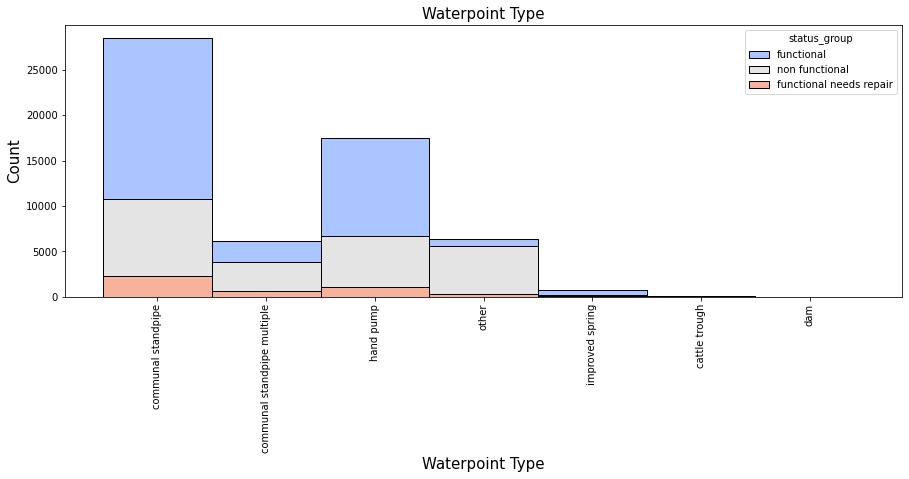

In [3341]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'waterpoint_type', hue = 'status_group', multiple = 'stack', palette = 'coolwarm')
plt.title('Waterpoint Type', fontsize = 15)
plt.xlabel('Waterpoint Type', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig('./Data/waterpoint_type_histplot')

## **'waterpoint_type_group'**
The kind of waterpoint

In [3332]:
#get value count
print(df['waterpoint_type_group'].value_counts(normalize = True))

#this column is redundant since it is similar to 'waterpoint_type', drop it
df.drop(columns = 'waterpoint_type_group', axis = 1, inplace = True)

communal standpipe    0.582912
hand pump             0.294411
other                 0.107407
improved spring       0.013199
cattle trough         0.001953
dam                   0.000118
Name: waterpoint_type_group, dtype: float64


# Rechecking

In [3333]:
#check remaining columns
df.columns

Index(['id', 'status_group', 'amount_tsh', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'extraction_type', 'management_group', 'payment', 'water_quality',
       'quantity', 'source', 'source_class', 'waterpoint_type',
       'year_recorded', 'funder_group', 'installer_group', 'wpt_name_group',
       'subvillage_group', 'lga_group', 'ward_group', 'scheme_name_group',
       'age'],
      dtype='object')

In [3334]:
#check shape
df.shape

(59400, 38)

In [3335]:
#check missing value
df.isnull().sum()

id                   0
status_group         0
amount_tsh           0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
wpt_name             0
basin                0
subvillage           0
region               0
region_code          0
district_code        0
lga                  0
ward                 0
population           0
public_meeting       0
scheme_management    0
scheme_name          0
permit               0
extraction_type      0
management_group     0
payment              0
water_quality        0
quantity             0
source               0
source_class         0
waterpoint_type      0
year_recorded        0
funder_group         0
installer_group      0
wpt_name_group       0
subvillage_group     0
lga_group            0
ward_group           0
scheme_name_group    0
age                  0
dtype: int64

# Preprocessing Data

## Continuous Features

## Categorical Features